---
# Telecom Churn Case Study
---

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

### Objective:

The main goal of the case study is to build ML models to predict churn.

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
- Recommend strategies to manage customer churn based on your observations.

---
---

## Table of Content

* [Import the needed libraries](#import)
* [1. Reading and Understanding the Data](#dataread)
* [2. Data manipulation and cleaning](#datamanipulate)
    * [2.1 Unique Values](#datamanipulate_unique)
    * [2.2 Handle empty data](#datamanipulate_empty)
    * [2.3 Derived data](#datamanipulate_deriveddata)
    * [2.4 Handle Outliers](#datamanipulate_outliers)
* [3. Visualising the Data](#visual)
* [4. Data Preparation](#prepare)
    * [4.1 Data split into train and test](#prepare_split)
    * [4.2 Standard Scaler](#prepare_scaler)
    * [4.3 Data Imbalance](#prepare_imbalance)
* [5. Feature Engineering](#feature_engineering)
* [6. Building model](#build)
    * [6.1 Logistic Regression](#datamodel_log_reg)
    * [6.2 Random Forest](#datamodel_ranf)
    * [6.3 XG Boost](#datamodel_xgb)
* [Conclusion](#conclusion)
    * [1. Choosing the best model](#conclusion_best_model)
    * [2. Prediction on unseen test data](#conclusion_predict)
    * [3. Strong predictors of churn](#conclusion_strong_predict)
    * [4. Strategies to manage customer churn](#conclusion_strategies)
---
---

<a id='import'></a>
## Import the needed libraries

In [1]:
# Import the necessary librarires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import sensitivity_specificity_support
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Setting pandas display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---
---
<a id='dataread'></a>
## Step 1: Reading and Understanding the Data

In [3]:
# Load the train and unseen test dataset
raw_churn_data = pd.read_csv('train.csv')
unseen_test_data = pd.read_csv('test.csv')

# Sample the dataset
raw_churn_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0   0        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   31.277   87.009    7.527        48.58       124.38         1.29         32.24         96.68          2.33           0.00            0.0            0.0           0.00            0.0           0.00              2.23              0.00              0.28              5.29             16.04              2.33              0.00              0.00              0.00              0.00              0.00              0.00          7.53         16.04          2.61             46.34            124.38              1.01             18.75             80.61               0.0              0.00               0.0               0.0               0.0               0.0               0.0         65.09        204.99          1.01           0.0           0.0           0.0          8.20          0.63          0.00         0.38          0.0          0.0           81.21          221.68   
1   1        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014    0.000  122.787   42.953         0.00         0.00         0.00          0.00         25.99         30.89           0.00            0.0            0.0           0.00            0.0           0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00              0.00             22.01             29.79          0.00          0.00          0.00              0.00              0.00              0.00              0.00              0.00               0.0              0.00               0.0               0.0               0.0               0.0               0.0          0.00          0.00          0.00           0.0           0.0           0.0          0.00         30.73         31.66         0.00          0.0          0.0            0.00           30.73   
2   2        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014   60.806  103.176    0.000         0.53        15.93         0.00         53.99         82.05          0.00           0.00            0.0            0.0           0.00            0.0           0.00              0.53             12.98              0.00             24.11              0.00              0.00              0.00              0.00              0.00              2.14              0.00              0.00         24.64         12.98          0.00              0.00              2.94              0.00             28.94             82.05               0.0              0.00               0.0               0.0               0.0               0.0               0.0         28.94         84.99          0.00           0.0           0.0           0.0          2.89          1.38          0.00         0.00          0.0          0.0           56.49           99.36   
3  

In [4]:
# Understanding the data dimensions
print("Train Shape : ",raw_churn_data.shape)
print("Unseen Test Shape : ",unseen_test_data.shape)

Train Shape :  (69999, 172)
Unseen Test Shape :  (30000, 171)


In [5]:
# Understanding the distribution of data in each column
raw_churn_data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8   og_others_6   og_others_7   og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
count  69999.000000    69999.0         69297.0         69297.0         69297.0  69999.000000  69999.000000  69999.000000  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   67231.000000   67312.000000   66296.000000   67231.000000   67312.000000   66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000  67231.000000  67312.000000  66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000      67231.000000      67312.000000      66296.000000           67231.0           67312.0           66296.0  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000    69999.000000    69999.000000    69999.000000   
mean   34999.000000      109.0             0.0             0.0             0.0    283.134365    278.185912    278.858826    133.153275    133.894438    132.978257    198.874771    197.153383    196.543577       9.765435       7.014568       7.004892      14.186457       9.842191       9.771783         46.904854         46.166503         45.686109         93.238231         90.799240         91.121447          3.743179          3.777031          3.661652          1.126025          1.361052          1.420840    143.893585    140.750120    140.476486         80.619382         83.775851         83.471486         88.152110         91.538615         90.586999          1.126377          1.084062          1.057739               0.0               0.0               0.0    169.900601    176.401217    175.118852      0.845763      0.811100      0.841648      3.958619      4.976783      5.045027      0.462581      0.024425      0.033059      306.451436      310.572674      304.513065   
std    20207.115084        0.0             0.0             0.0             0.0    334.213918    344.366927    351.924315    299.963093    311.277193    311.896596    316.818355    322.482226    324.089234      57.374429      55.960985      53.408135      73.469261      58.511894      64.618388        150.971758        154.739002        153.716880        162.046699        153.852597        152.997805         13.319542         13.568110         13.009193          5.741811          7.914113          6.542202    252.034597    246.313148    245.342359        255.098355        266.693254        267.021929        255.771554        267.532089        270.032002          8.136645          8.325206          7.696853               0.0               0.0               0.0    392.046600    409.299501    410.697098     29.747486     29.220073     29.563367     15.854529     22.229842     17.708507      4.768437      1.716430      2.232547      465.502866      479.131770      477.936832   
min        0.000000      109.0             0.0             0.0   

> We will understand more about outliers while visualizing the data.

In [6]:
raw_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [7]:
# Understanding the meaning of each feature
data_dict=pd.read_csv('data_dictionary.csv')
data_dict

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [8]:
# Global variable which holds numeric and categoric columns information
num_cols = []
cat_cols = []

# Function to classify the column based on types.
# df -> input dataframe
def classify_cols(df):
    num_cols.clear()
    cat_cols.clear()
    cols = list(filter(lambda x:x!='churn_probability',df.columns))
    for col in cols:
        if df[col].dtype in ['float64', 'int64']:
            num_cols.append(col)
        else:
            cat_cols.append(col)

    print("Numeric columns: ", num_cols, "\n")
    print("Categoric columns: ", cat_cols)

classify_cols(raw_churn_data)

Numeric columns:  ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_

- Let's drop all the date columns as it will not help for analysis

In [9]:
raw_churn_data = raw_churn_data.drop(cat_cols, axis=1)
unseen_test_data = unseen_test_data.drop(cat_cols, axis=1)

- We saw that **vbc** KPI's are named as _jun, jul, aug_. Let's rename with proper postfix _6,_7,_8 accordingly

In [10]:
raw_churn_data = raw_churn_data.rename(columns= {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8'})
unseen_test_data  = unseen_test_data.rename(columns= {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8'})

In [11]:
classify_cols(raw_churn_data)

Numeric columns:  ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_

---
---
<a id='datamanipulate'></a>
## Step 2: Data manipulation and cleaning

<a id='datamanipulate_unique'></a>
### 2.1 Unique values

- Let's check columns which has 1 or 100% unique values

In [12]:
# Extract the count of unique values in each column
churn_data = raw_churn_data.copy()
churn_data_unique_count = churn_data.nunique().sort_values(ascending=False)
print(churn_data_unique_count)

id                    69999
arpu_6                61615
arpu_7                61425
arpu_8                60194
total_og_mou_7        33195
total_og_mou_6        33135
total_og_mou_8        32897
total_ic_mou_6        27432
total_ic_mou_7        27418
total_ic_mou_8        27318
offnet_mou_6          26254
offnet_mou_7          26139
offnet_mou_8          25995
loc_ic_mou_6          24442
loc_ic_mou_7          24258
loc_ic_mou_8          24182
loc_og_mou_6          22309
std_og_mou_7          22088
loc_og_mou_7          22012
loc_og_mou_8          21950
std_og_mou_6          21837
std_og_mou_8          21745
onnet_mou_7           20076
onnet_mou_6           20057
onnet_mou_8           19725
loc_ic_t2m_mou_6      19034
loc_ic_t2m_mou_8      19022
loc_ic_t2m_mou_7      18945
loc_og_t2m_mou_6      17848
loc_og_t2m_mou_7      17641
loc_og_t2m_mou_8      17616
std_og_t2m_mou_7      16234
std_og_t2m_mou_6      16059
std_og_t2m_mou_8      15968
std_og_t2t_mou_7      14745
std_og_t2t_mou_6    

In [13]:
# Extract columns with only 1 unique value
one_unique_cols = churn_data_unique_count[churn_data_unique_count == 1]
one_unique_cols

std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_7    1
circle_id           1
std_ic_t2o_mou_6    1
loc_ic_t2o_mou      1
std_og_t2o_mou      1
loc_og_t2o_mou      1
std_ic_t2o_mou_8    1
dtype: int64

In [14]:
# Extract columns with all unique value
full_unique_cols = churn_data_unique_count[churn_data_unique_count == churn_data.shape[0]]
full_unique_cols

id    69999
dtype: int64

Let's drop the 1 and 100% unique value columns

In [15]:
# Drop one unique value columns as it does not have any information
churn_data = churn_data.drop(one_unique_cols.index, axis = 1)
# Drop all unique value columns as it does not help in analysis
churn_data = churn_data.drop(full_unique_cols.index, axis = 1)

In [16]:
# Update the column classification based on types
classify_cols(churn_data)

Numeric columns:  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_

- Let's convert **2** unique values columns as categorical

In [17]:
# Extract columns with 2 unique values
binary_cols = churn_data_unique_count[churn_data_unique_count == 2].index.to_list()
binary_cols = list(filter(lambda x:x!='churn_probability',binary_cols))
binary_cols

['fb_user_8',
 'fb_user_7',
 'fb_user_6',
 'night_pck_user_8',
 'night_pck_user_7',
 'night_pck_user_6']

In [18]:
# Convert the 2 unique value columns as category columns
churn_data[binary_cols] = churn_data[binary_cols].astype('category')

In [19]:
# Update the column classification based on types
classify_cols(churn_data)

Numeric columns:  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_

In [20]:
# Pick the same columns from unseen test data
req_cols = list(filter(lambda x:x!='churn_probability',churn_data.columns))
unseen_test_data = unseen_test_data[req_cols]

In [21]:
# Print the dimension of data
print("Raw data shape: ",raw_churn_data.shape)
print("Unseen data shape: ",unseen_test_data.shape)
print("Cleaned data shape: ",churn_data.shape)

Raw data shape:  (69999, 163)
Unseen data shape:  (30000, 151)
Cleaned data shape:  (69999, 152)


---
<a id='datamanipulate_empty'></a>
### 2.2 Handle empty data

In [22]:
# A function which prints number of columns having 1 or more NaN values in df in percentage of max_value
def print_na_perc_nozero(df):
    ret = round(100*(df.isnull().sum()/len(df.index)), 2)
    print(ret)
    return ret

In [23]:
# Print the missing value summary in percentage
na_summary = print_na_perc_nozero(churn_data)

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            3.95
onnet_mou_7            3.84
onnet_mou_8            5.29
offnet_mou_6           3.95
offnet_mou_7           3.84
offnet_mou_8           5.29
roam_ic_mou_6          3.95
roam_ic_mou_7          3.84
roam_ic_mou_8          5.29
roam_og_mou_6          3.95
roam_og_mou_7          3.84
roam_og_mou_8          5.29
loc_og_t2t_mou_6       3.95
loc_og_t2t_mou_7       3.84
loc_og_t2t_mou_8       5.29
loc_og_t2m_mou_6       3.95
loc_og_t2m_mou_7       3.84
loc_og_t2m_mou_8       5.29
loc_og_t2f_mou_6       3.95
loc_og_t2f_mou_7       3.84
loc_og_t2f_mou_8       5.29
loc_og_t2c_mou_6       3.95
loc_og_t2c_mou_7       3.84
loc_og_t2c_mou_8       5.29
loc_og_mou_6           3.95
loc_og_mou_7           3.84
loc_og_mou_8           5.29
std_og_t2t_mou_6       3.95
std_og_t2t_mou_7       3.84
std_og_t2t_mou_8       5.29
std_og_t2m_mou_6       3.95
std_og_t2m_mou_7       3.84
std_og_t2m_mou_8    

> Let us focus on columns which have more than **70%** of missing data.

In [24]:
req_na_cols = na_summary[na_summary >= 70]
req_na_cols

total_rech_data_6     74.90
total_rech_data_7     74.48
total_rech_data_8     73.69
max_rech_data_6       74.90
max_rech_data_7       74.48
max_rech_data_8       73.69
count_rech_2g_6       74.90
count_rech_2g_7       74.48
count_rech_2g_8       73.69
count_rech_3g_6       74.90
count_rech_3g_7       74.48
count_rech_3g_8       73.69
av_rech_amt_data_6    74.90
av_rech_amt_data_7    74.48
av_rech_amt_data_8    73.69
arpu_3g_6             74.90
arpu_3g_7             74.48
arpu_3g_8             73.69
arpu_2g_6             74.90
arpu_2g_7             74.48
arpu_2g_8             73.69
night_pck_user_6      74.90
night_pck_user_7      74.48
night_pck_user_8      73.69
fb_user_6             74.90
fb_user_7             74.48
fb_user_8             73.69
dtype: float64

We have the below set of information with more than 70% data missing:
- date of last recharge
- total recharge data
- maximum recharge data
- number of recharges for 2G/3G network
- average recharge amount of data
- average revenue per user
- night pack user
- facebook service user

> We can remove all the above columns since it has more than 70% of empty data and imputing this level of data will not help in analysis.

In [25]:
# Drop the above columns from the train dataframe
churn_data = churn_data.drop(req_na_cols.index, axis=1)
# Drop the above columns from the unseen test dataframe
unseen_test_data = unseen_test_data.drop(req_na_cols.index, axis=1)

> Let's impute other missing values with **0**

In [26]:
# Summarize the columns with count of empty data
missing_rows = churn_data.isnull().any()
# Filter the columns which do not have any empty data
impute_cols = list(missing_rows[missing_rows.gt(0)].index)

# Create simple imputer object to fill with 0
zero_imp = SimpleImputer(strategy='constant', fill_value=0)
# Impute train and unseen test dataframe
churn_data.loc[:, impute_cols] = zero_imp.fit_transform(churn_data[impute_cols])
unseen_test_data.loc[:,impute_cols] = zero_imp.transform(unseen_test_data[impute_cols])

# Print missing value percentage
print_na_perc_nozero(churn_data)

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_m

In [27]:
# Print the dimensions of data
print("Train data shape Before : ", raw_churn_data.shape)
print("Train data shape After  : ", churn_data.shape)
print("Unseen data shape   : ", unseen_test_data.shape)
print("\nBy handling missing values, we removed", raw_churn_data.shape[1] - churn_data.shape[1] ,"columns")

Train data shape Before :  (69999, 163)
Train data shape After  :  (69999, 125)
Unseen data shape   :  (30000, 124)

By handling missing values, we removed 38 columns


---
<a id='datamanipulate_deriveddata'></a>
### 2.3 Derived data

In churn prediction,  there are three phases of customer lifecycle as given :
- 'good' phase -> Month 6 and 7
- 'action' phase -> Month 8
- 'churn' phase -> Month 9 (but we need not worry about this phase as we do not have data about this)

##### Let's create new features:

- Delta between good and action phase

In [28]:
# Helper method to find the difference between action and average of good phase
def delta_good_action_phase(data):
    data['arpu_diff'] = data.arpu_8 - ((data.arpu_6 + data.arpu_7)/2)
    data['onnet_mou_diff'] = data.onnet_mou_8 - ((data.onnet_mou_6 + data.onnet_mou_7)/2)
    data['offnet_mou_diff'] = data.offnet_mou_8 - ((data.offnet_mou_6 + data.offnet_mou_7)/2)
    data['roam_ic_mou_diff'] = data.roam_ic_mou_8 - ((data.roam_ic_mou_6 + data.roam_ic_mou_7)/2)
    data['roam_og_mou_diff'] = data.roam_og_mou_8 - ((data.roam_og_mou_6 + data.roam_og_mou_7)/2)
    data['loc_og_mou_diff'] = data.loc_og_mou_8 - ((data.loc_og_mou_6 + data.loc_og_mou_7)/2)
    data['std_og_mou_diff'] = data.std_og_mou_8 - ((data.std_og_mou_6 + data.std_og_mou_7)/2)
    data['isd_og_mou_diff'] = data.isd_og_mou_8 - ((data.isd_og_mou_6 + data.isd_og_mou_7)/2)
    data['spl_og_mou_diff'] = data.spl_og_mou_8 - ((data.spl_og_mou_6 + data.spl_og_mou_7)/2)
    data['total_og_mou_diff'] = data.total_og_mou_8 - ((data.total_og_mou_6 + data.total_og_mou_7)/2)
    data['loc_ic_mou_diff'] = data.loc_ic_mou_8 - ((data.loc_ic_mou_6 + data.loc_ic_mou_7)/2)
    data['std_ic_mou_diff'] = data.std_ic_mou_8 - ((data.std_ic_mou_6 + data.std_ic_mou_7)/2)
    data['isd_ic_mou_diff'] = data.isd_ic_mou_8 - ((data.isd_ic_mou_6 + data.isd_ic_mou_7)/2)
    data['spl_ic_mou_diff'] = data.spl_ic_mou_8 - ((data.spl_ic_mou_6 + data.spl_ic_mou_7)/2)
    data['total_ic_mou_diff'] = data.total_ic_mou_8 - ((data.total_ic_mou_6 + data.total_ic_mou_7)/2)
    data['total_rech_num_diff'] = data.total_rech_num_8 - ((data.total_rech_num_6 + data.total_rech_num_7)/2)
    data['total_rech_amt_diff'] = data.total_rech_amt_8 - ((data.total_rech_amt_6 + data.total_rech_amt_7)/2)
    data['max_rech_amt_diff'] = data.max_rech_amt_8 - ((data.max_rech_amt_6 + data.max_rech_amt_7)/2)
    data['vol_2g_mb_diff'] = data.vol_2g_mb_8 - ((data.vol_2g_mb_6 + data.vol_2g_mb_7)/2)
    data['vol_3g_mb_diff'] = data.vol_3g_mb_8 - ((data.vol_3g_mb_6 + data.vol_3g_mb_7)/2)  
    return data

In [29]:
# Find the delta between good and action phase for train and unseen test dataframe
churn_data = delta_good_action_phase(churn_data)
unseen_test_data = delta_good_action_phase(unseen_test_data)

In [30]:
# List of columns to be dropped since the delta is considered
drop_cols_list = ['arpu_8','arpu_6','arpu_7',\
'onnet_mou_8','onnet_mou_6','onnet_mou_7',\
'offnet_mou_8','offnet_mou_6','offnet_mou_7',\
'roam_ic_mou_8','roam_ic_mou_6','roam_ic_mou_7',\
'roam_og_mou_8','roam_og_mou_6','roam_og_mou_7',\
'loc_og_mou_8','loc_og_mou_6','loc_og_mou_7',\
'std_og_mou_8','std_og_mou_6','std_og_mou_7',\
'isd_og_mou_8','isd_og_mou_6','isd_og_mou_7',\
'spl_og_mou_8','spl_og_mou_6','spl_og_mou_7',\
'total_og_mou_8','total_og_mou_6','total_og_mou_7',\
'loc_ic_mou_8','loc_ic_mou_6','loc_ic_mou_7',\
'std_ic_mou_8','std_ic_mou_6','std_ic_mou_7',\
'isd_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7',\
'spl_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7',\
'total_ic_mou_8','total_ic_mou_6','total_ic_mou_7',\
'total_rech_num_8','total_rech_num_6','total_rech_num_7',\
'total_rech_amt_8','total_rech_amt_6','total_rech_amt_7',\
'max_rech_amt_8','max_rech_amt_6','max_rech_amt_7',\
'vol_2g_mb_8','vol_2g_mb_6','vol_2g_mb_7',\
'vol_3g_mb_8','vol_3g_mb_6','vol_3g_mb_7']

In [31]:
# Drop the above delta columns from train and unseen test dataframe
churn_data = churn_data.drop(drop_cols_list, axis = 1)
unseen_test_data = unseen_test_data.drop(drop_cols_list, axis = 1)

In [32]:
# Update the column classification based on types
classify_cols(churn_data)

Numeric columns:  ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8

---
<a id='datamanipulate_outliers'></a>
### 2.4 Handle Outliers

Univariate analysis on the numeric columns will help to understand outliers

In [33]:
# Checking outliers at 25%,50%,75%,90%,95% and 99% 
churn_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8   og_others_6   og_others_7   og_others_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8   ic_others_6   ic_others_7   ic_others_8  last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  monthly_2g_6  monthly_2g_7  monthly_2g_8   sachet_2g_6   sachet_2g_7   sachet_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8   sachet_3g_6  \
count      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000  69999.000000  69999.000000  69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000      69999.000000  69999.000000  69999.000000  69999.000000        69999.000000        69999.000000        69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000  69999.000000   
mean          45.050076         44.394344         43.269280         89.551272         87.313796         86.301054          3.595161          3.632045          3.467948          1.081499          1.308807          1.345676         77.431415         80.560009         79.055781         84.666274         88.024790         85.794878          1.081836          1.042449          1.001784      0.444289      0.023487      0.031310         46.143461         46.044697         44.756489        102.915265        102.402108        102.433264         11.574147         12.081392         11.096938          9.102206          9.494462          9.385959         19.914931         20.852939         19.973415          2.061402          2.114968          1.965401      0.820291      0.980539      0.912259           63.426949           59.294218           62.489478      0.079287      0.083401      0.080930      0.388863      0.441406      0.449492      0.075815      0.077730      0.081958      0.075344   
std          148.238746        151.998993        149.944829        159.846546        151.875981        150.286404         13.073900         13.324919         12.686917          5.631416          7.765132          6.374743        250.496889        262.019256        260.533850        251.251454        262.935831        263.573506          7.977166          8.166510          7.494240      4.674074      1.683170      2.172704        138.011740        145.189084        137.868828        166.407161        163.530718        163.568440         38.700206         42.720438         37.663262         50.666333         55.082479         52.840367         78.794332         85.723556         79.488686         16.197661         15.863738         15.447035     11.907671     12.970528     11.386111           97.954876           95.429492          101.996729      0.294719      0.304802      0.299254      1.494206      1.651012      1.632450      0.358905      0.383189      0.381821      0.573003   
min            0.000000    

**Inference:**
> - From the description, we could see there are **small level of outliers**.
> - We will cap the outliers with the below method.

In [34]:
# Function which caps outliers
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [35]:
# Cap churn and the unseen test dataframe
churn_data = churn_data.apply(cap_outliers, axis=0)
unseen_test_data = unseen_test_data.apply(cap_outliers, axis=0)

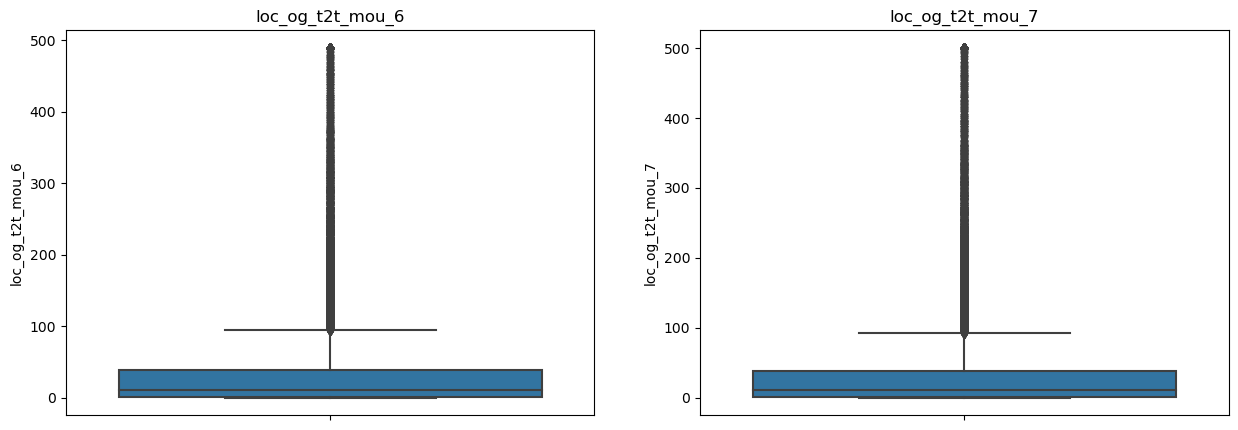

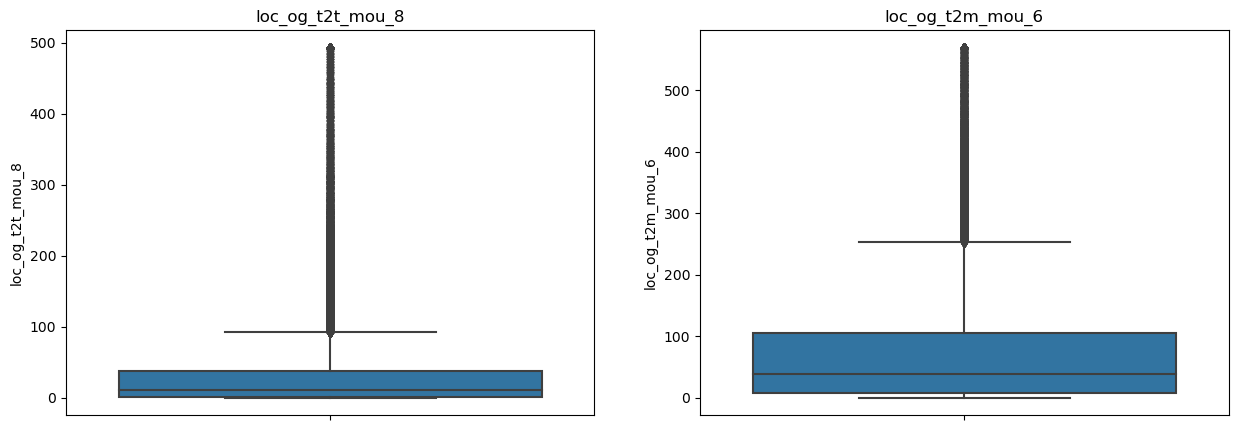

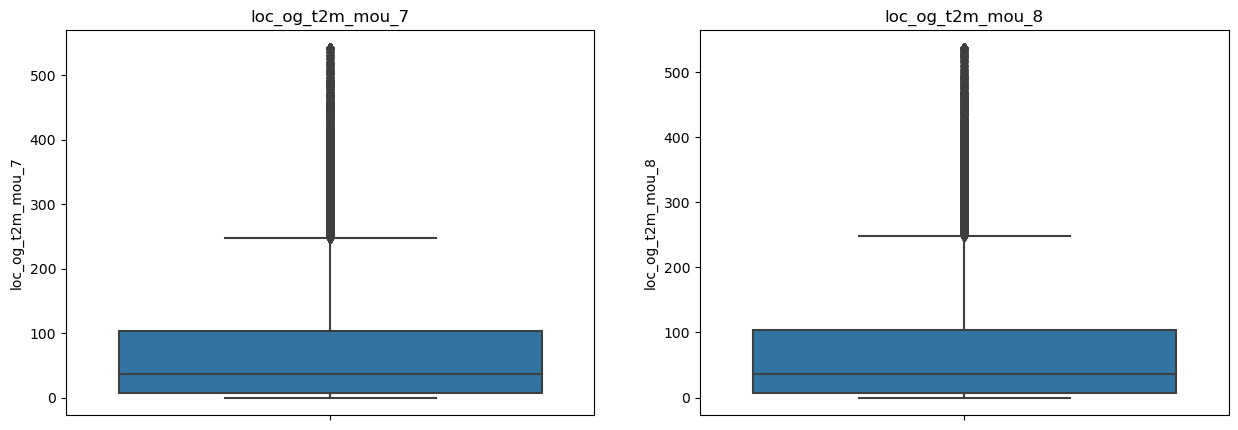

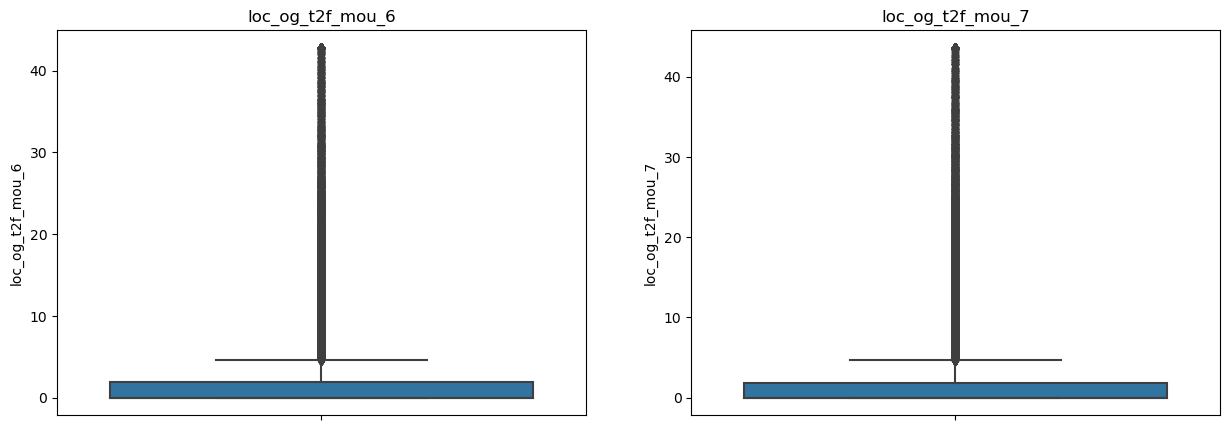

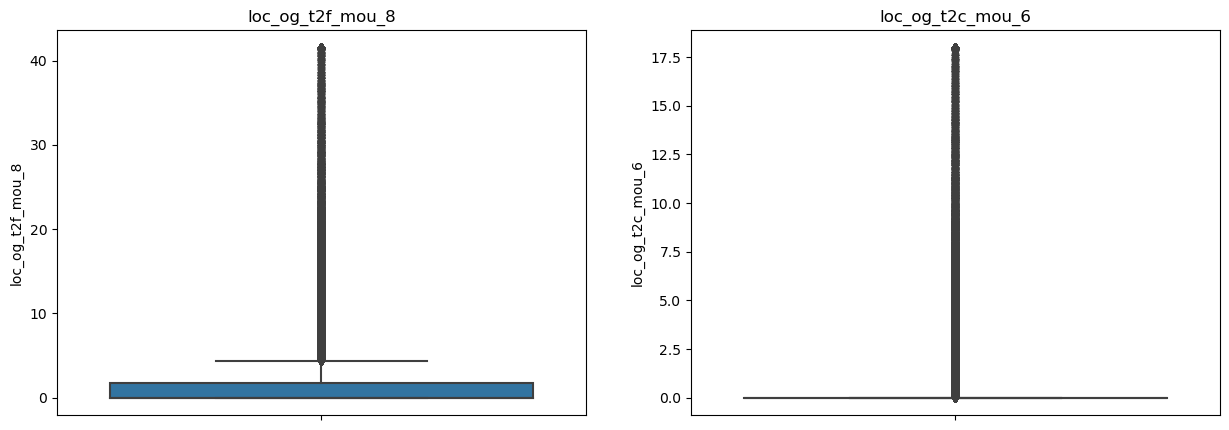

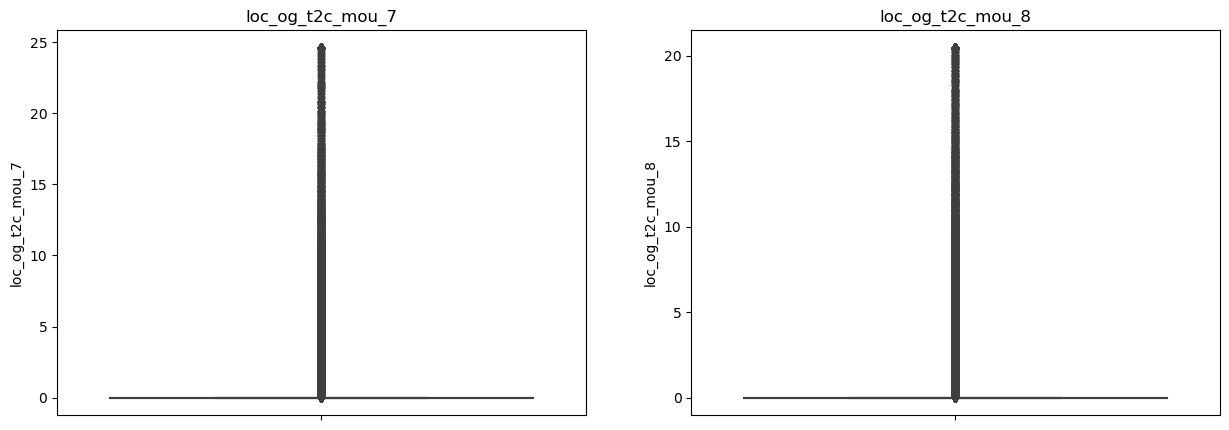

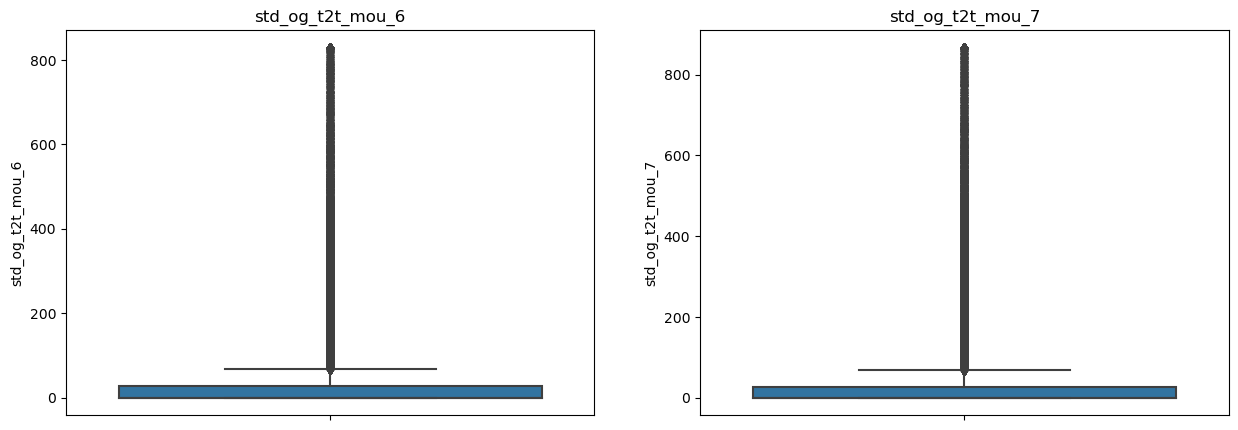

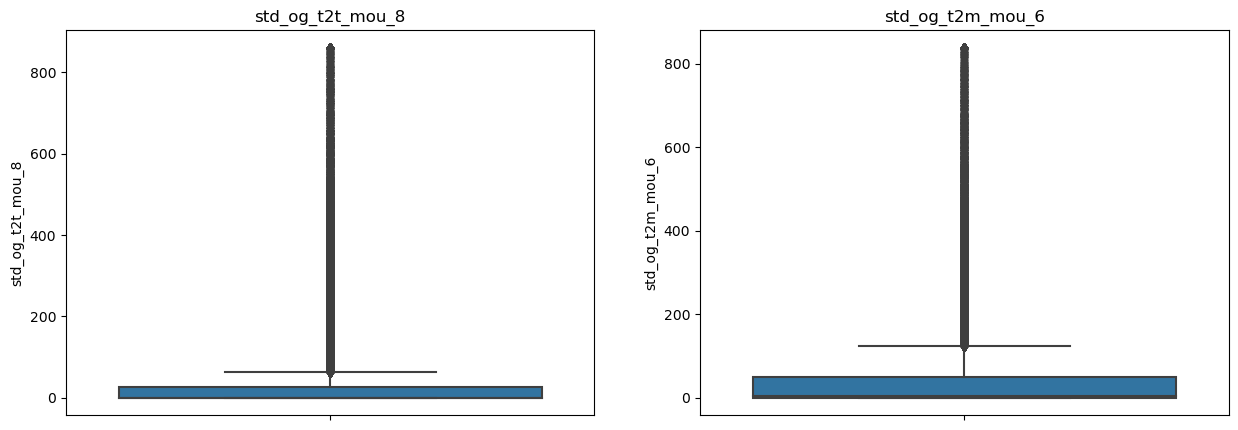

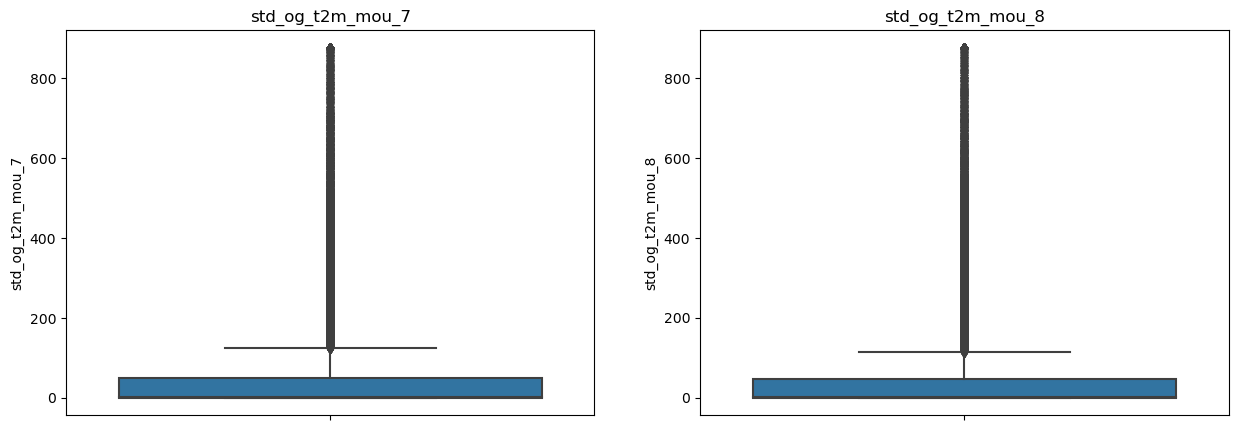

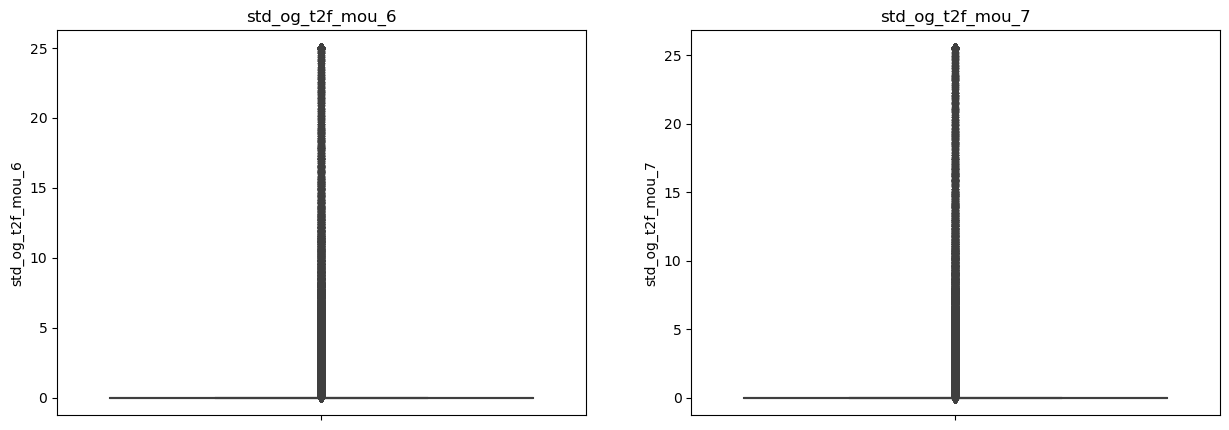

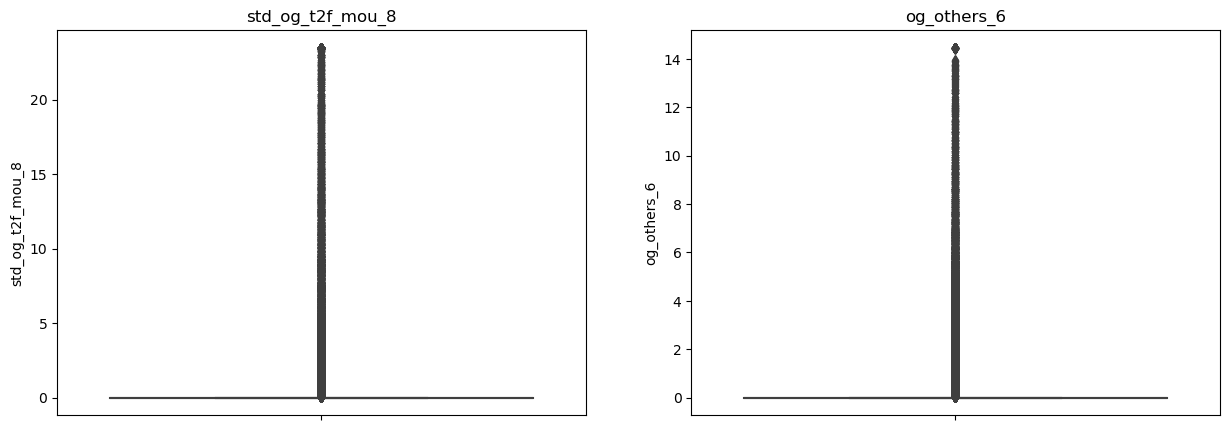

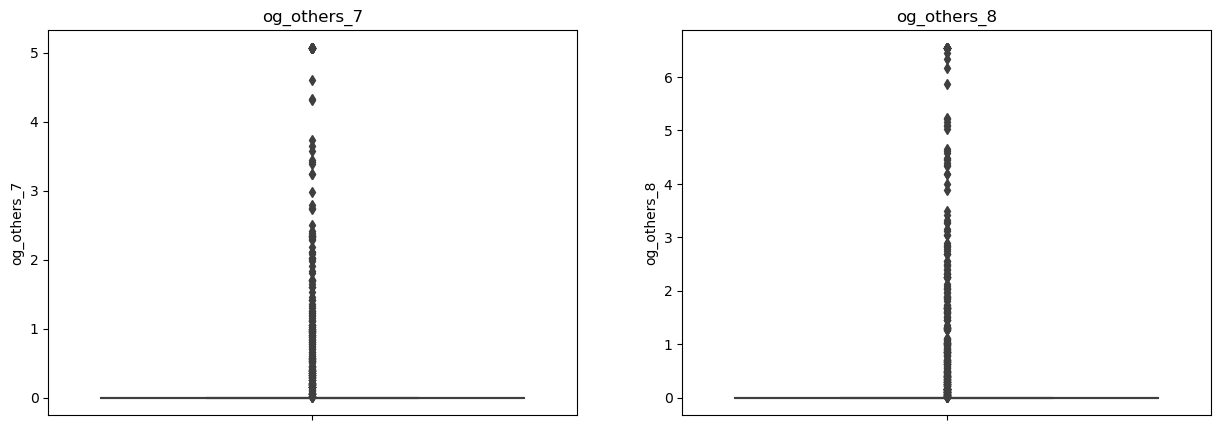

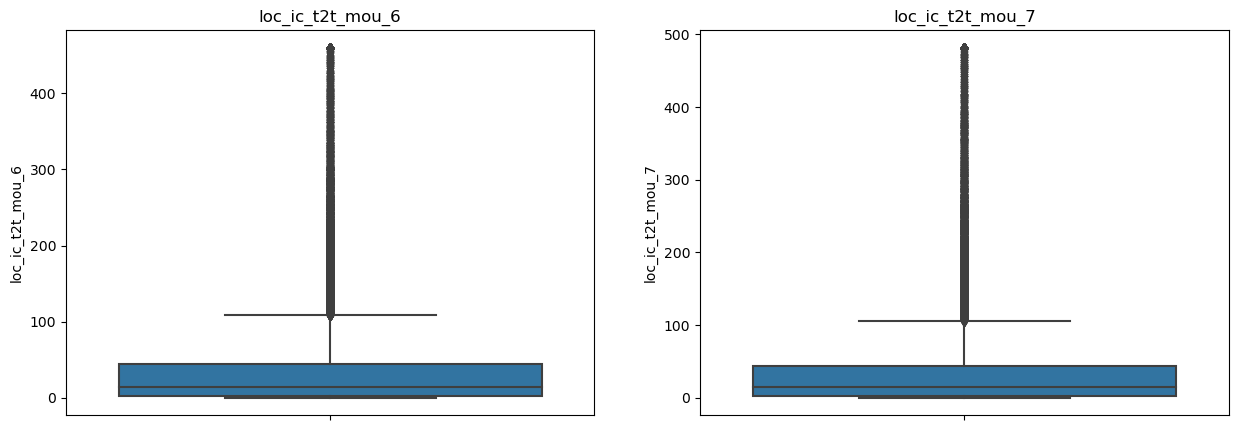

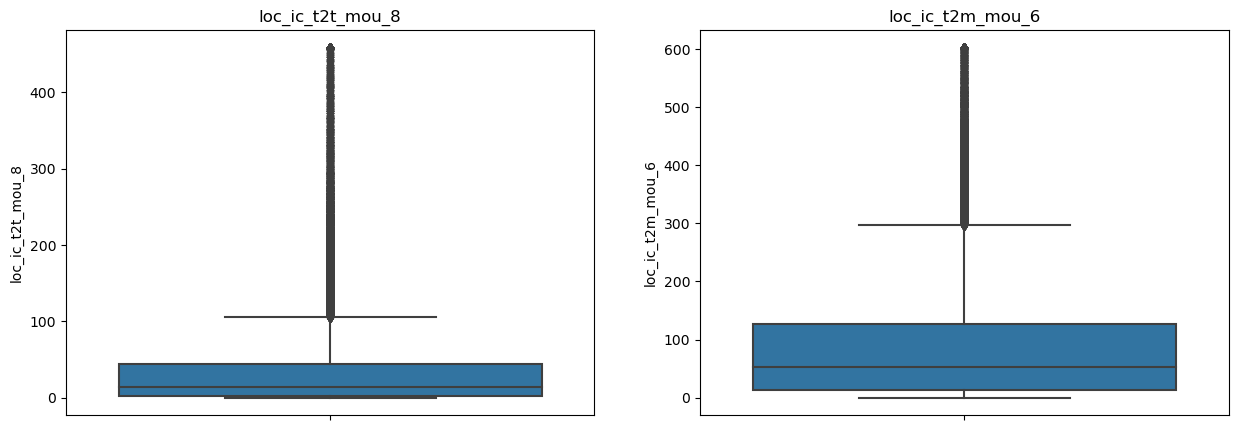

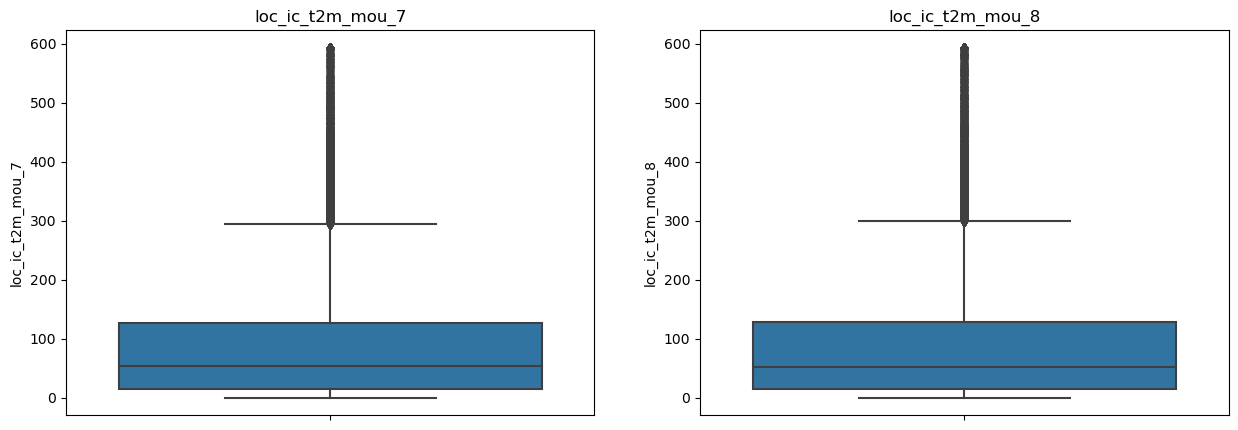

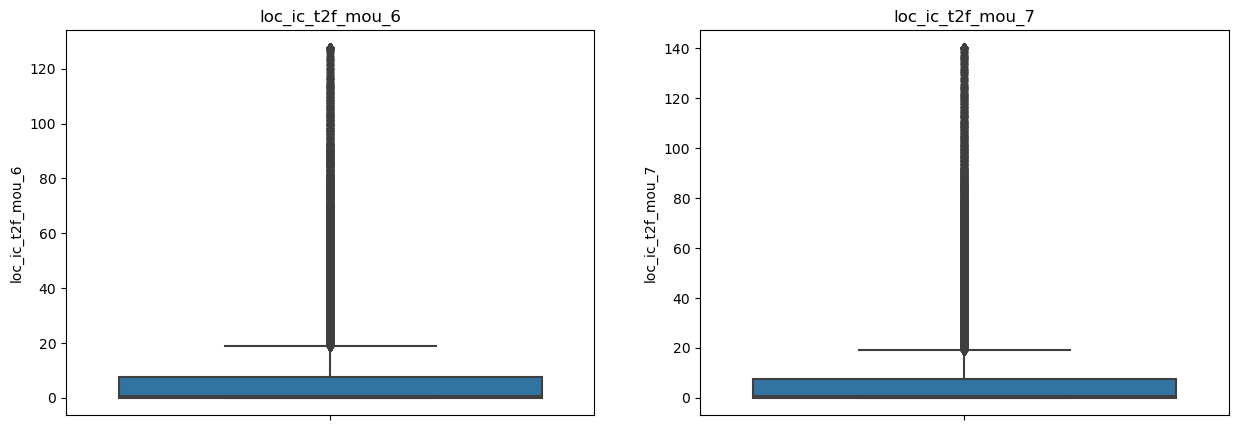

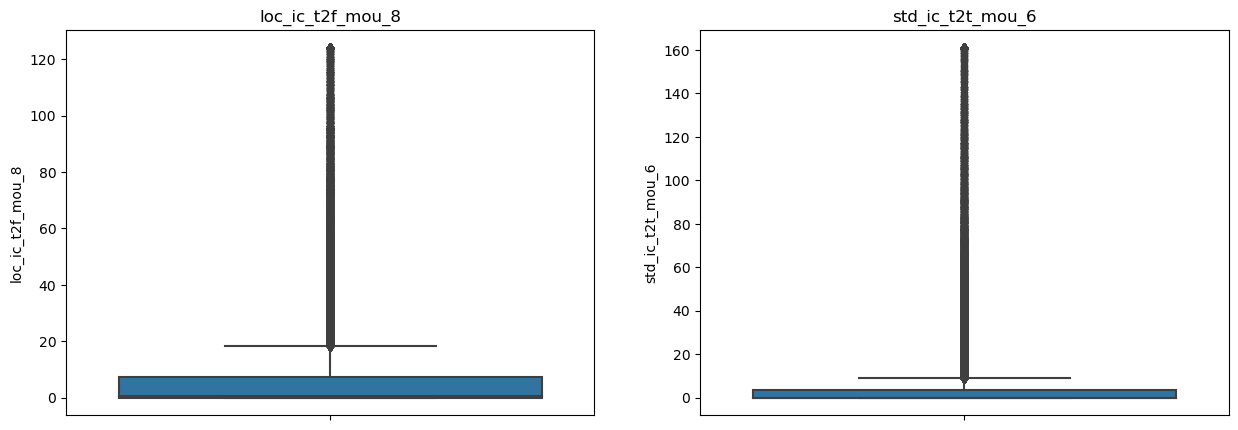

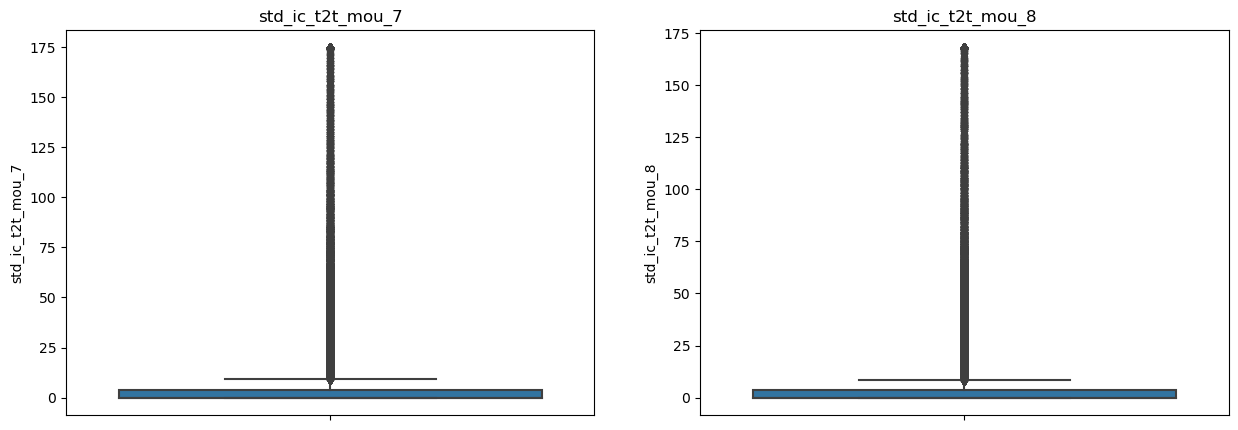

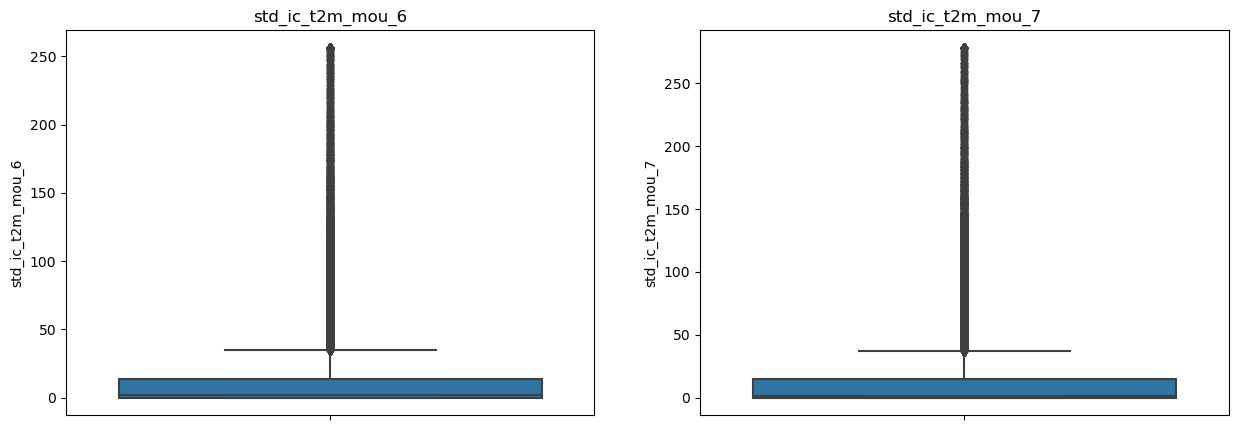

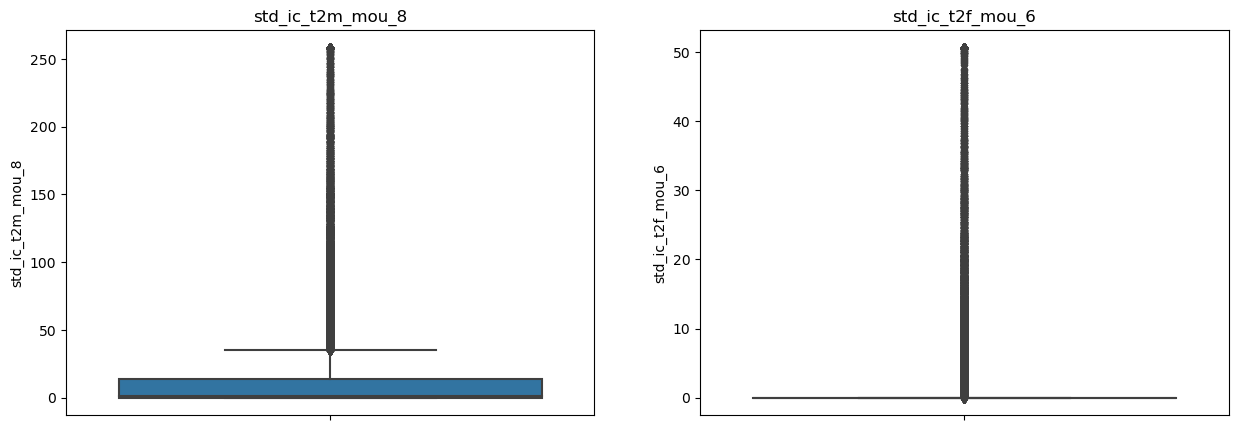

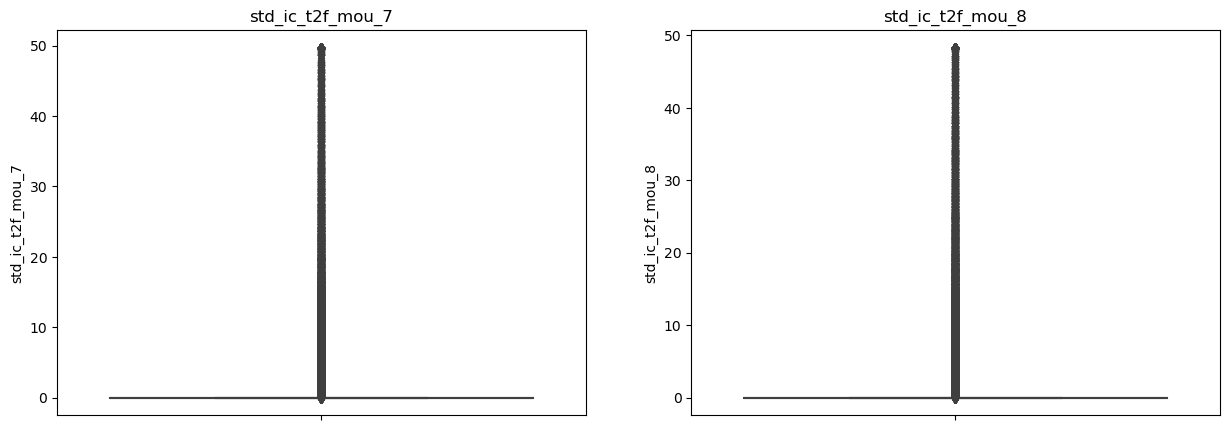

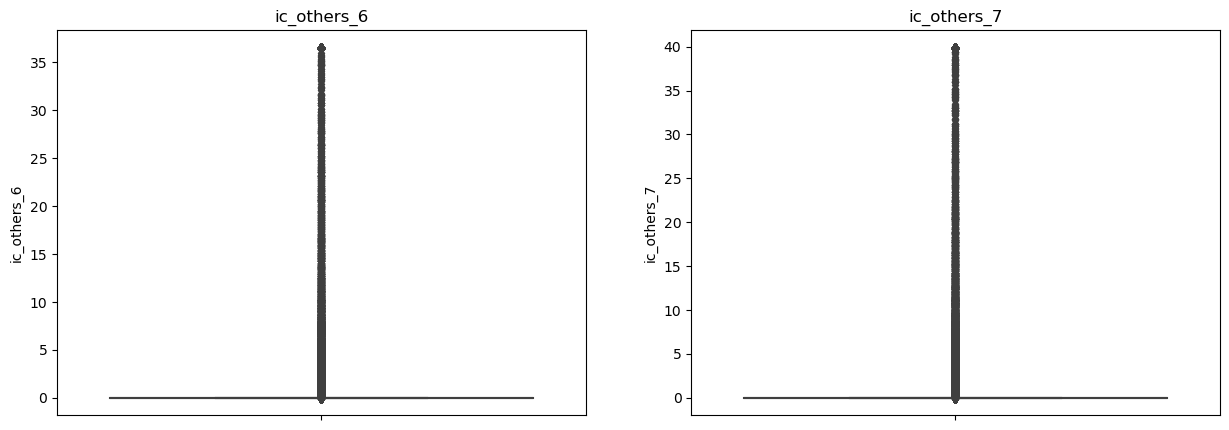

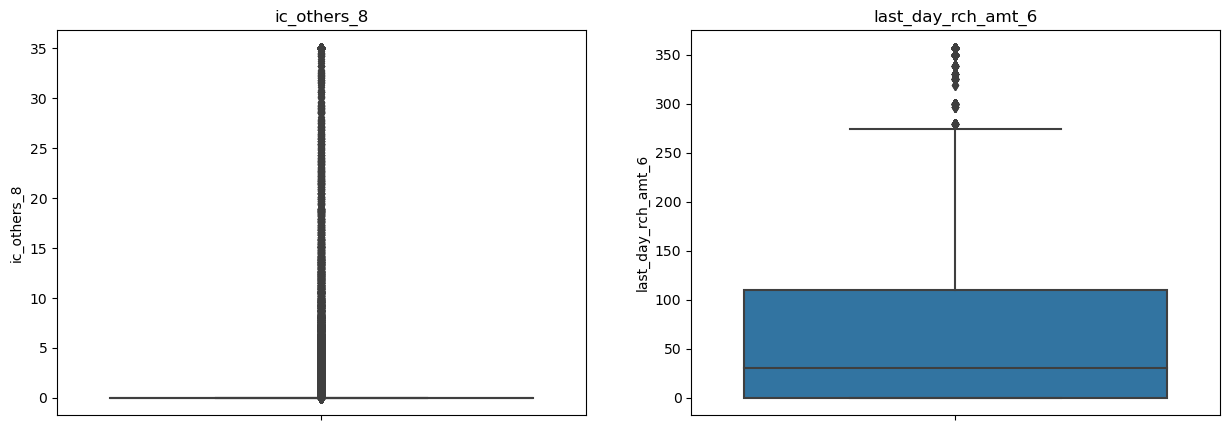

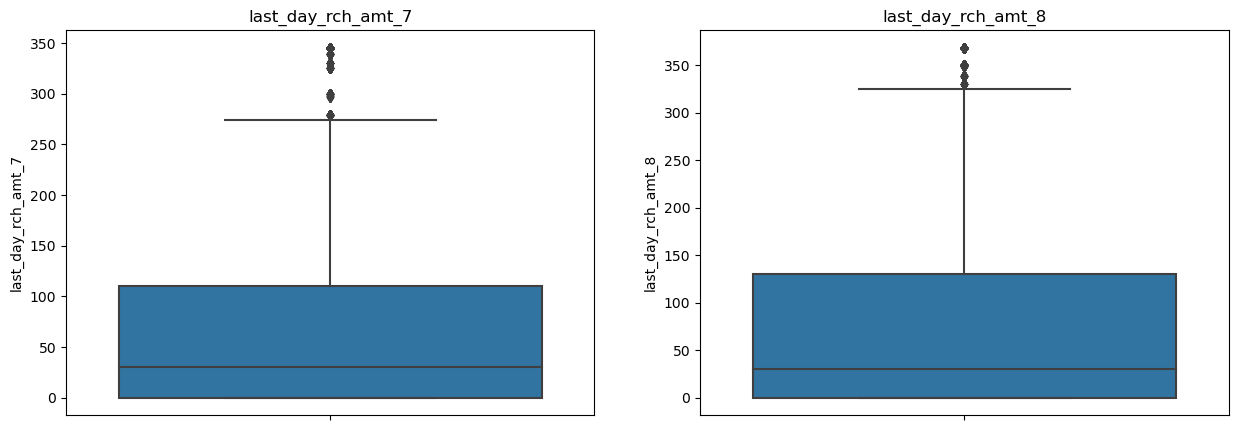

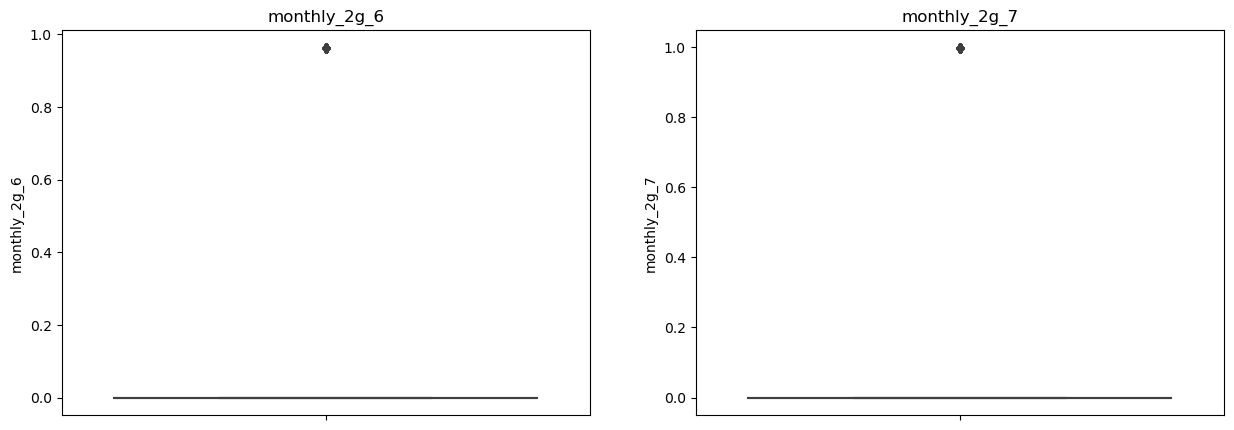

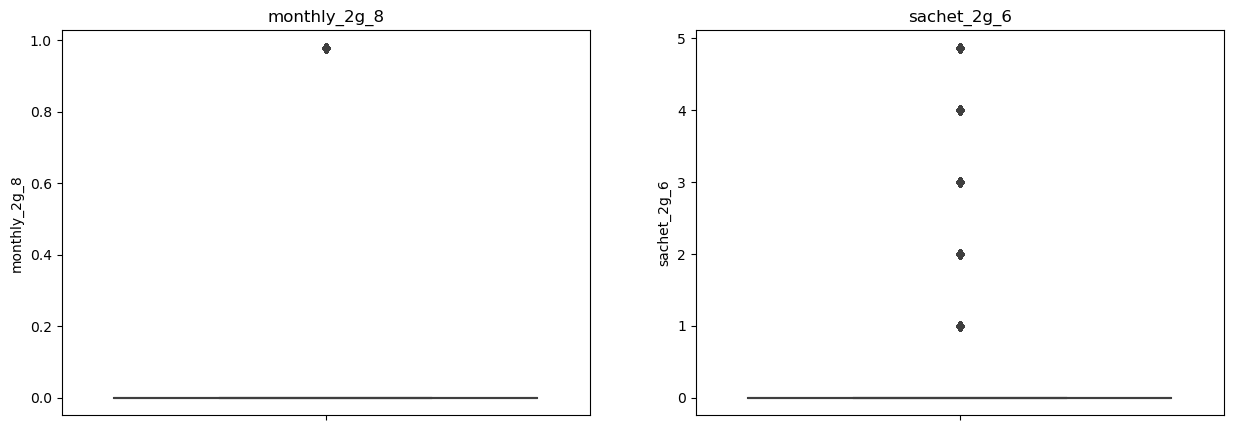

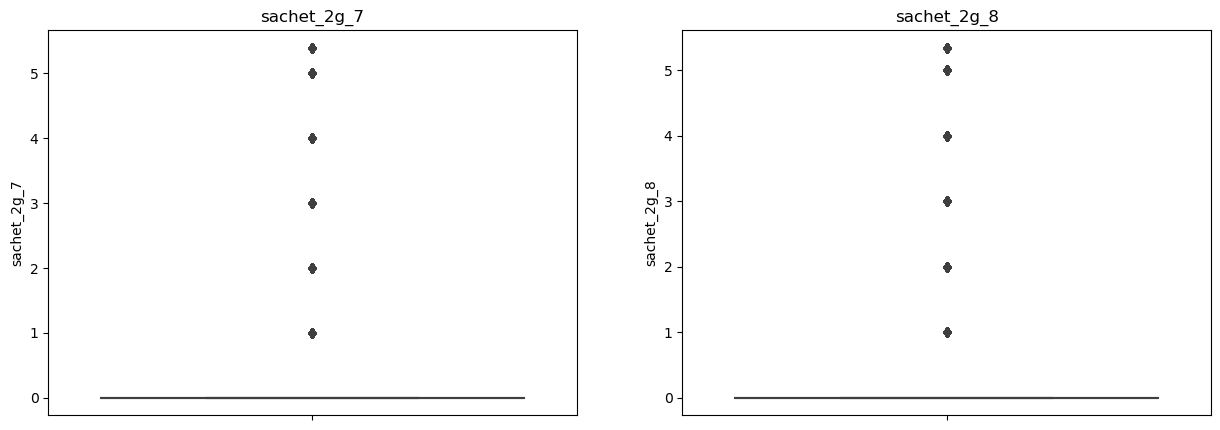

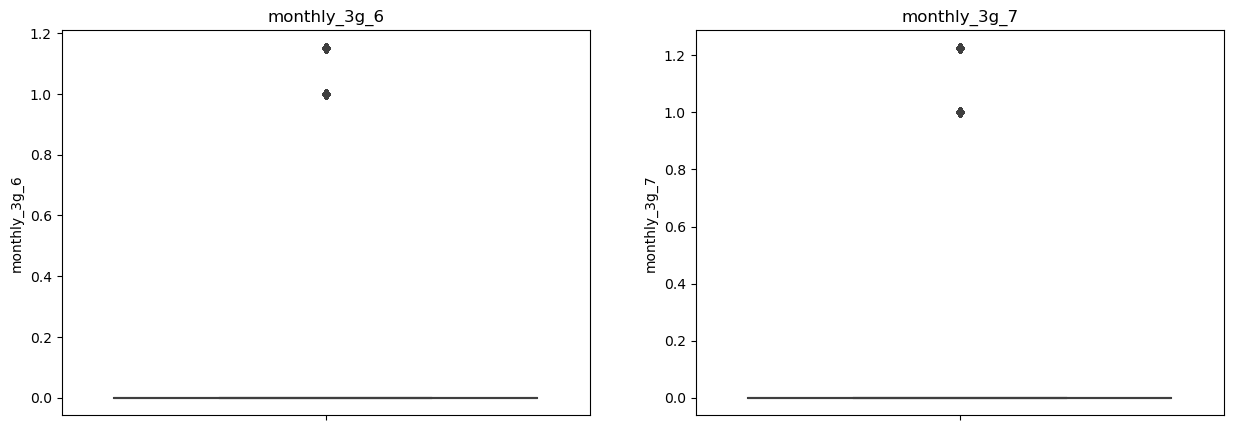

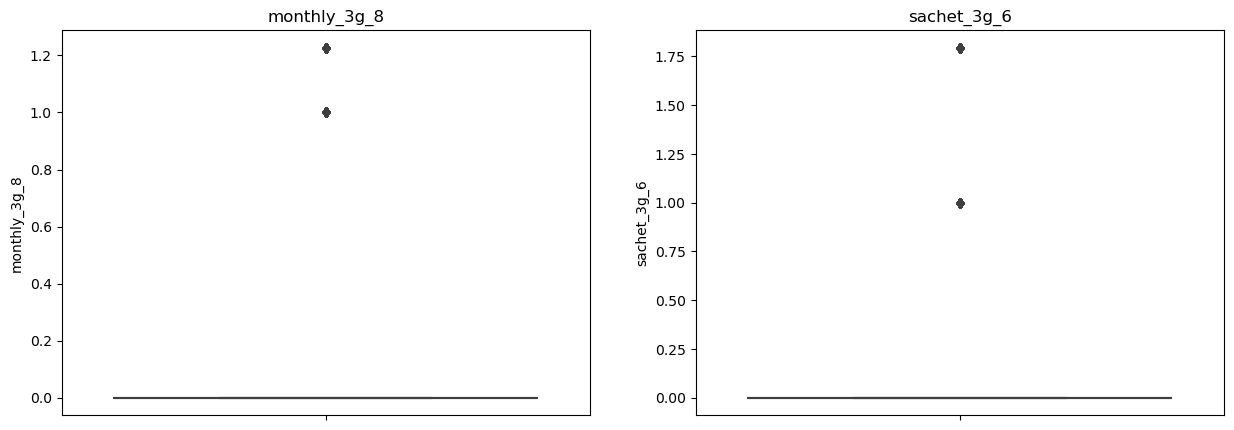

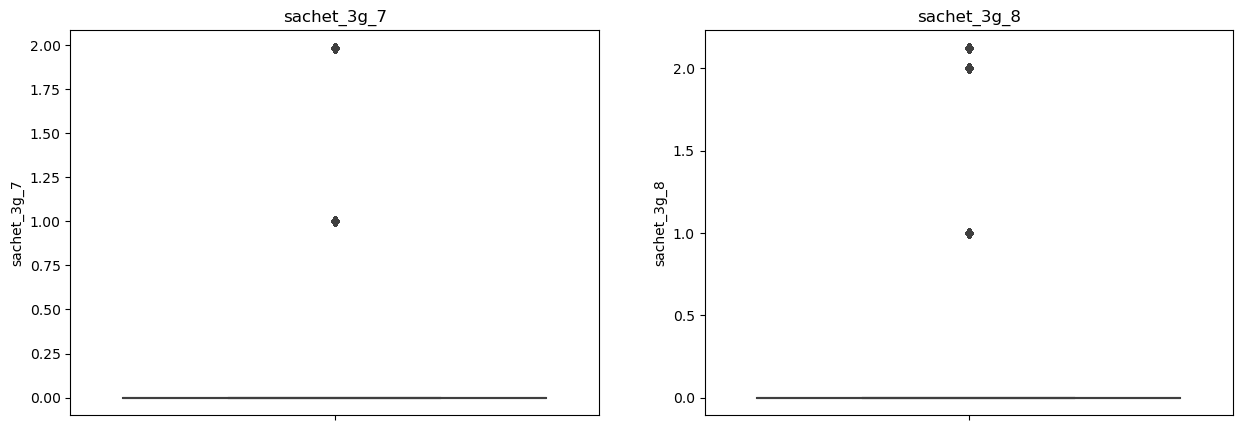

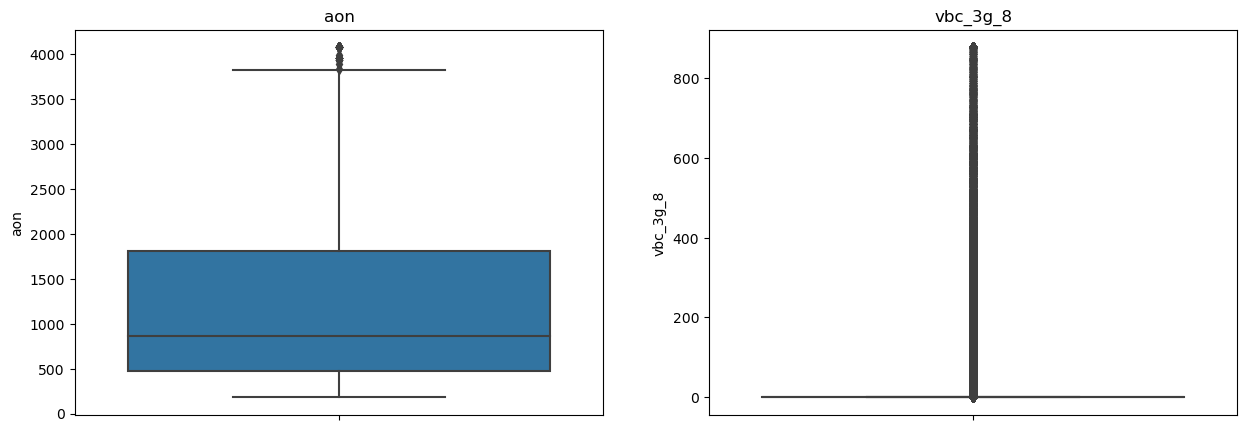

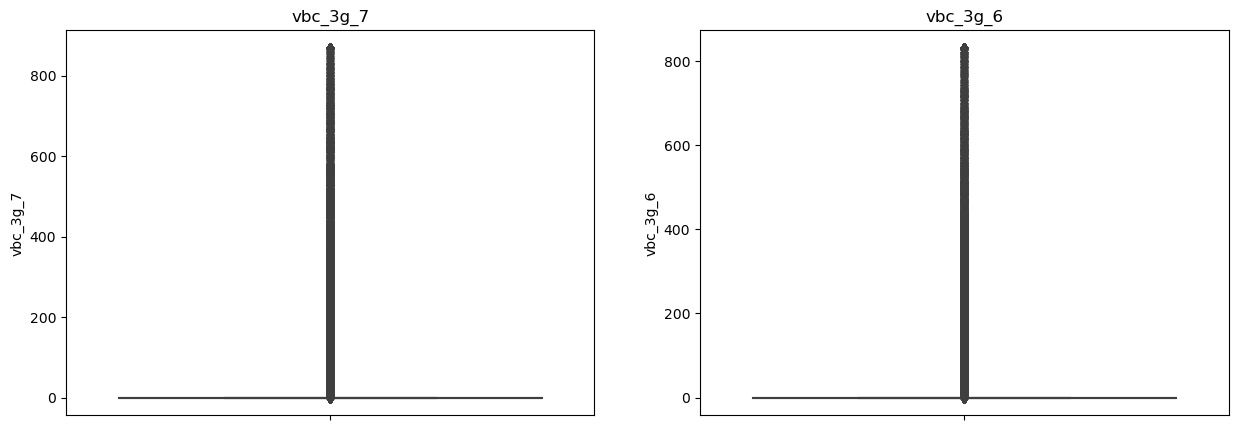

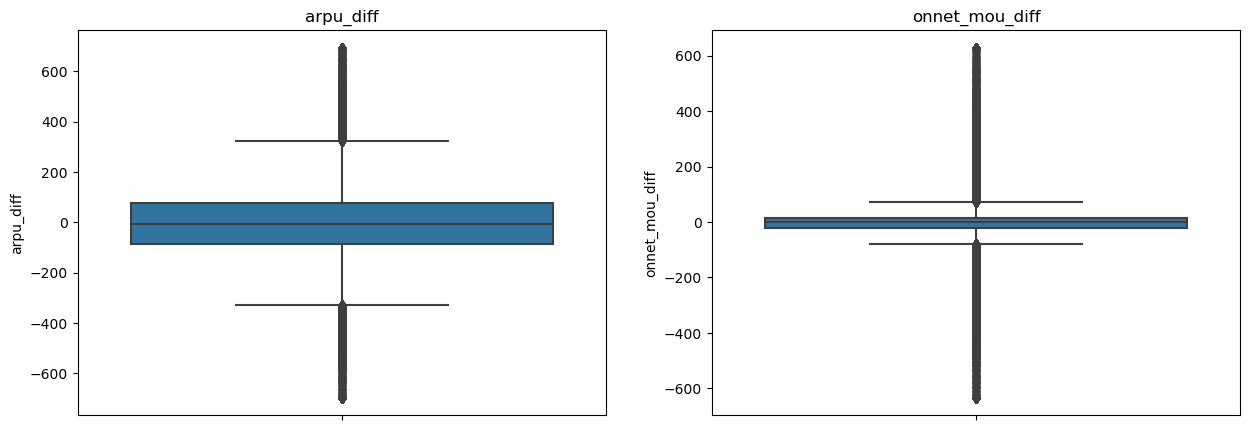

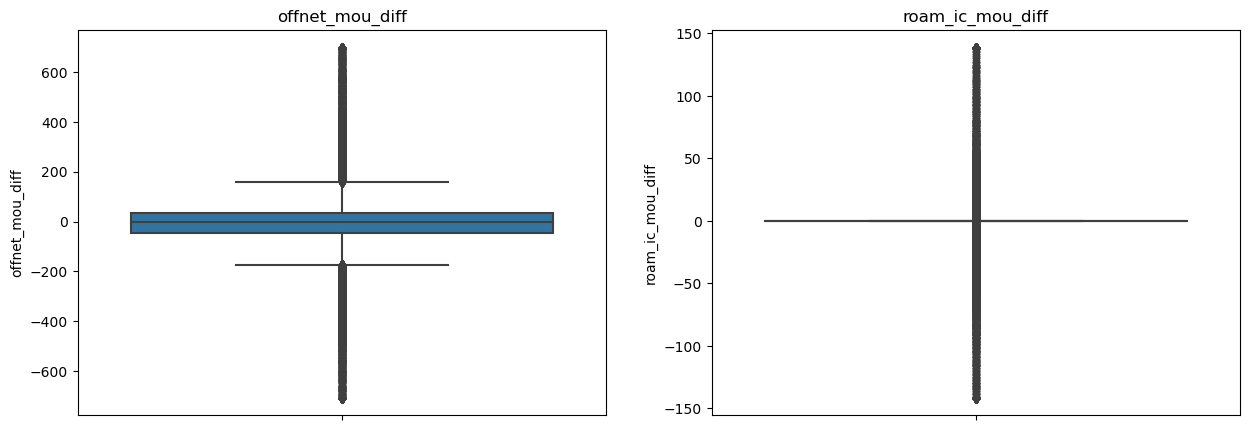

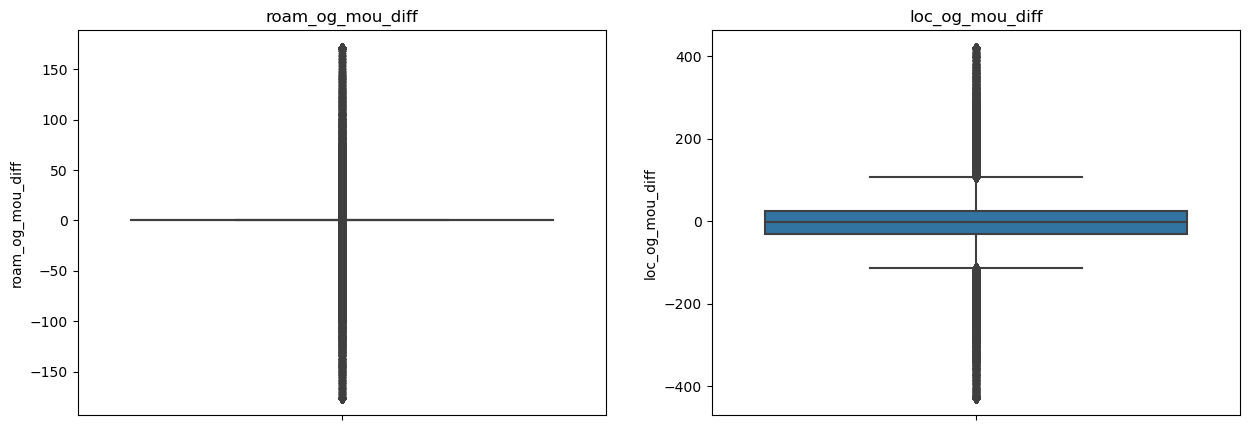

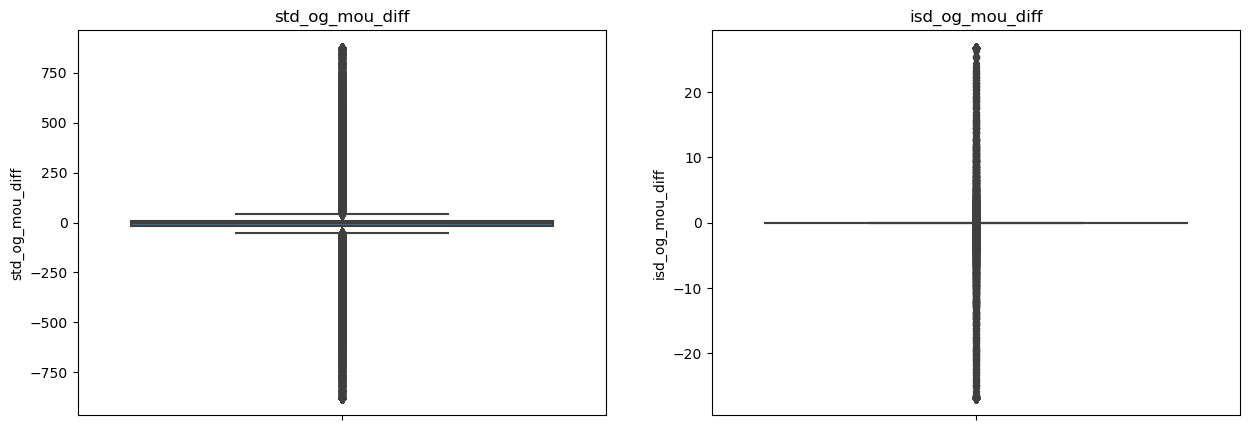

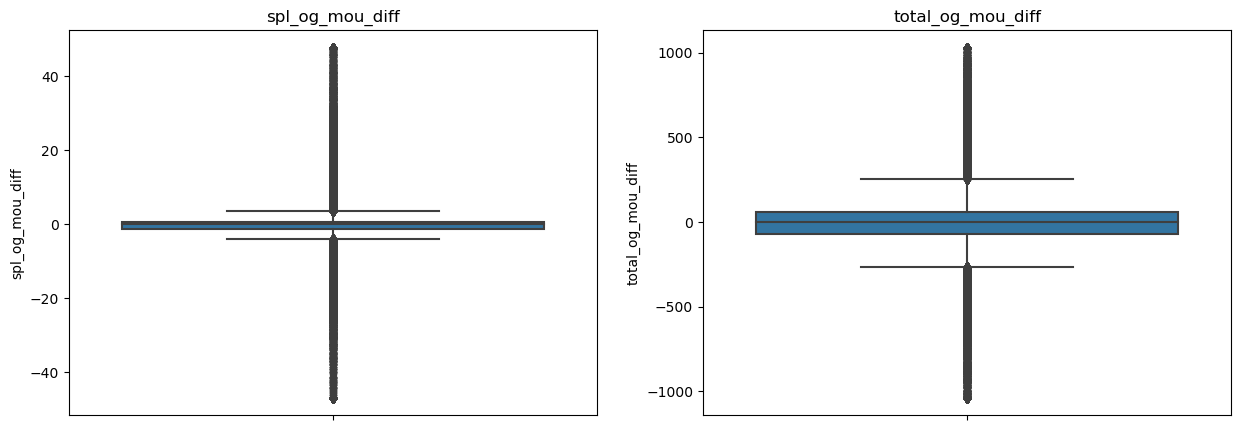

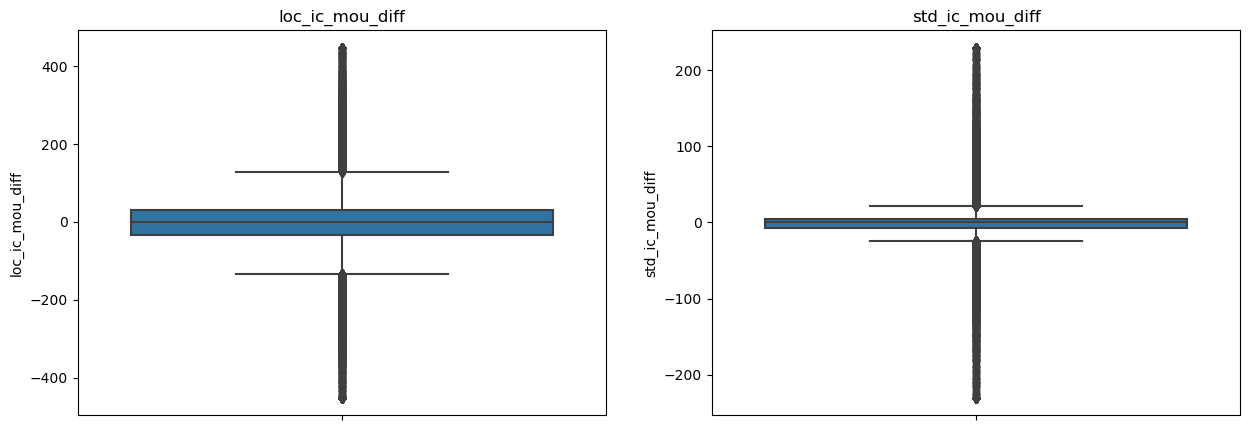

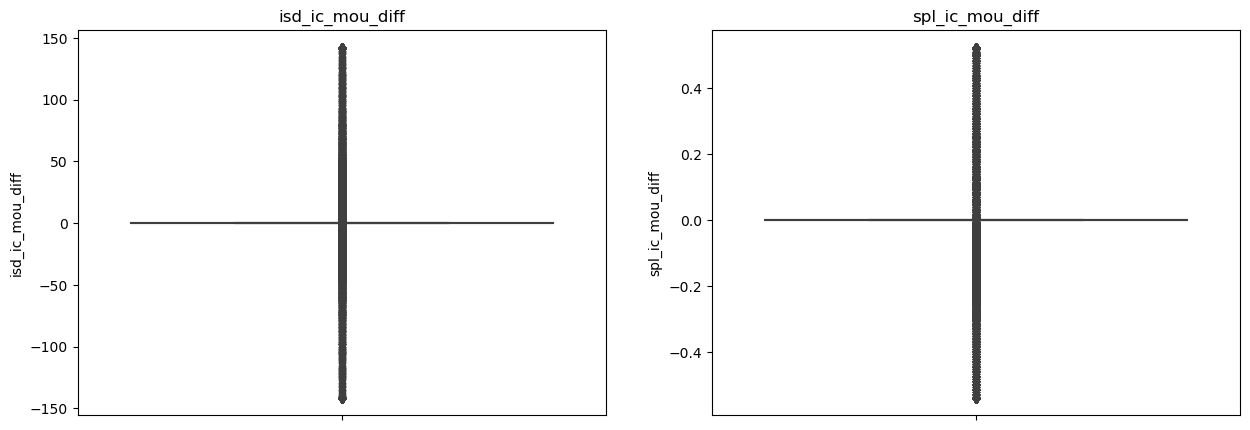

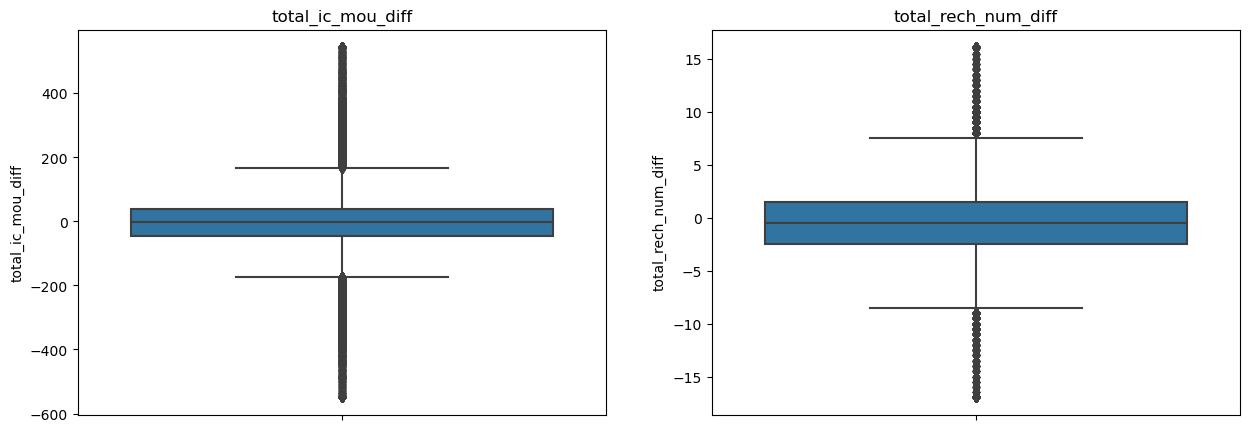

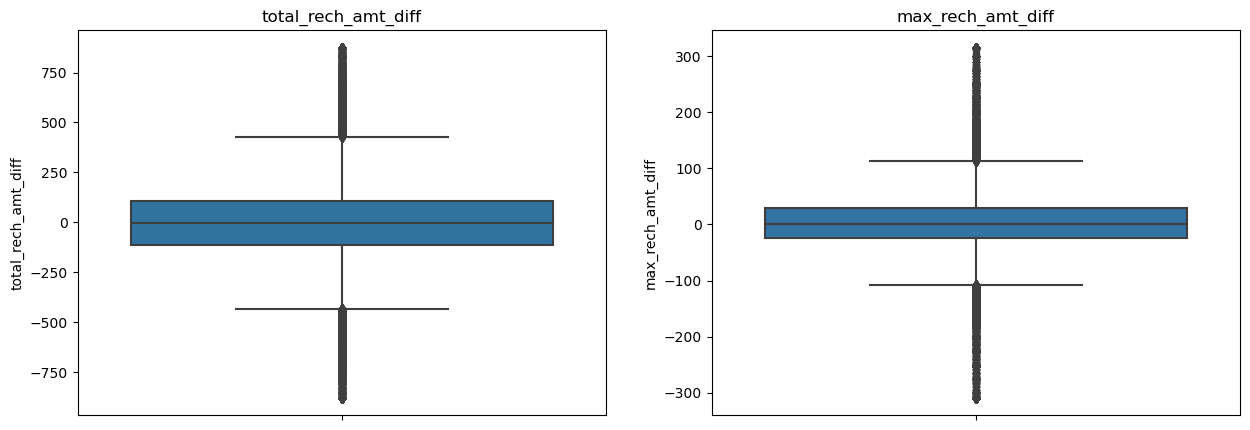

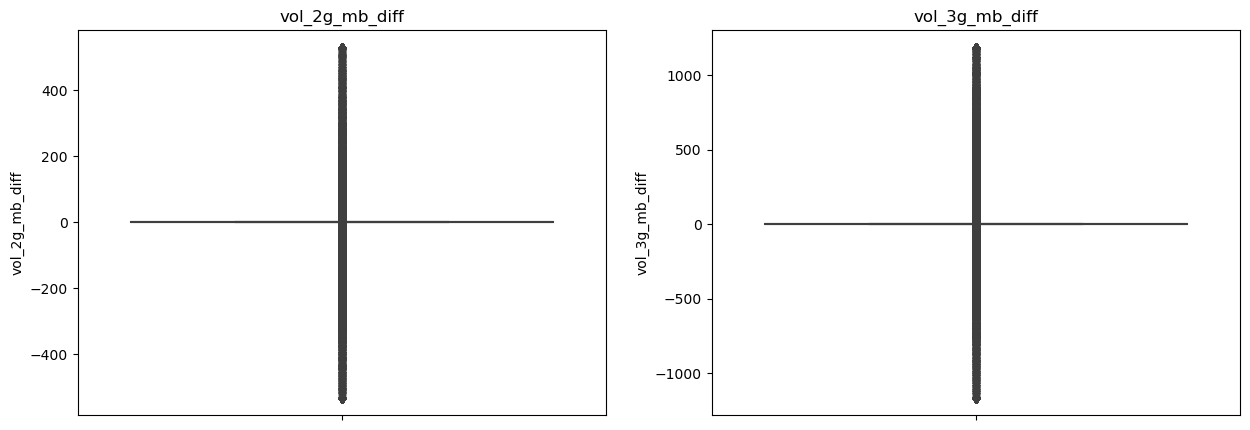

In [36]:
# Draw box plot for all the numeric columns in the dataframe
len_num_cols = len(num_cols)
for i in range(0, len_num_cols, 2):
    # Set the figure size to a standard so that it will be easy for viewing
    plt.figure(figsize=(15,5))
    # Set the subplot index
    plt.subplot(1,2,1)
    # Calling box plot
    sns.boxplot(data=churn_data, y=num_cols[i])
    # Set the title of subplot
    plt.title(num_cols[i])
    # Set the subplot index
    plt.subplot(1,2,2)
    # Calling box plot
    sns.boxplot(data=churn_data, y=num_cols[i+1])
    # Set the title of subplot
    plt.title(num_cols[i+1])
    plt.show()

> **Inference :**  Most of the column is **skewed**.

---
---

<a id='visual'></a>
## Step 3: Visualising the Data

In [37]:
# Let's format the target variable as object
churn_data['churn_probability'] = churn_data.churn_probability.astype('object')

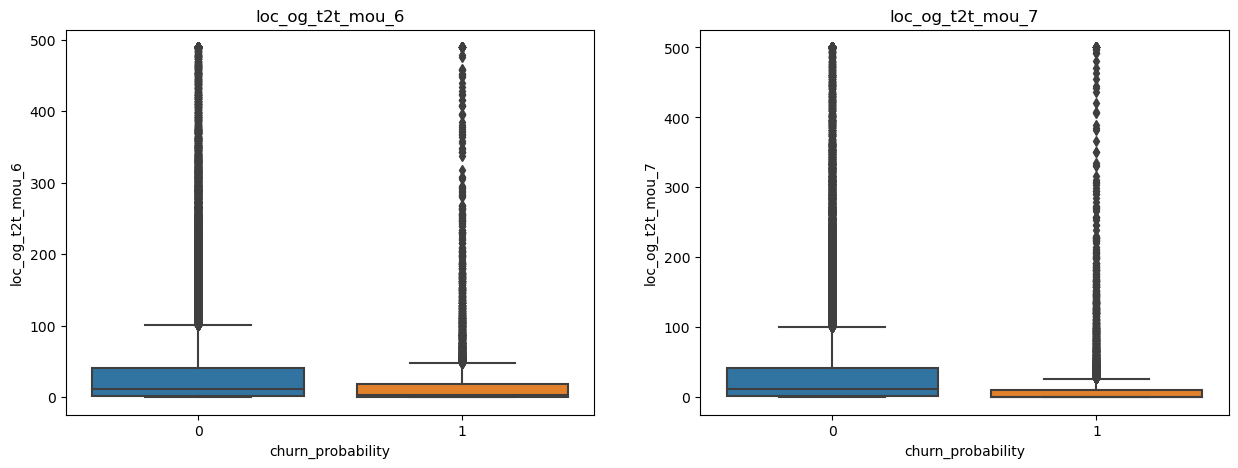

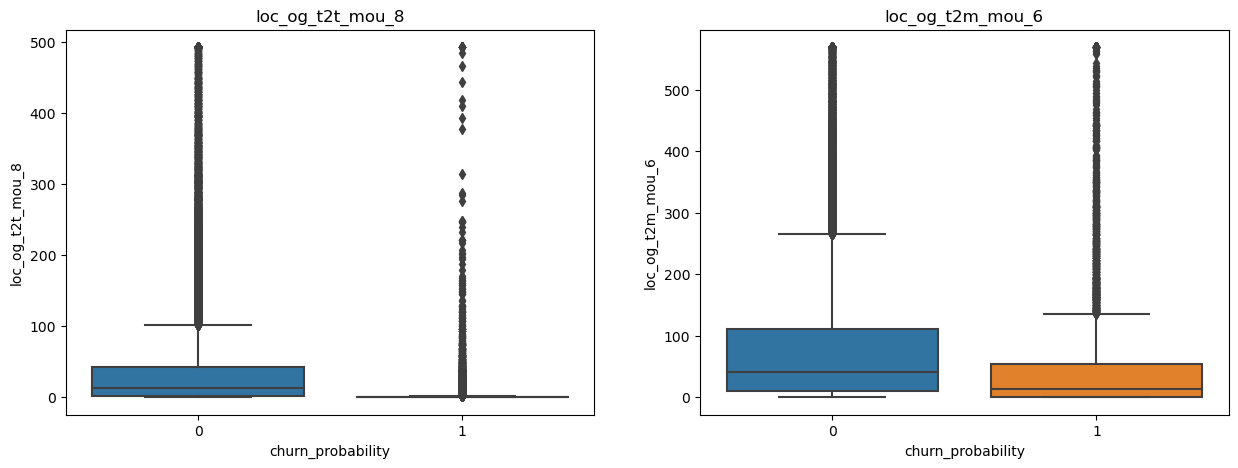

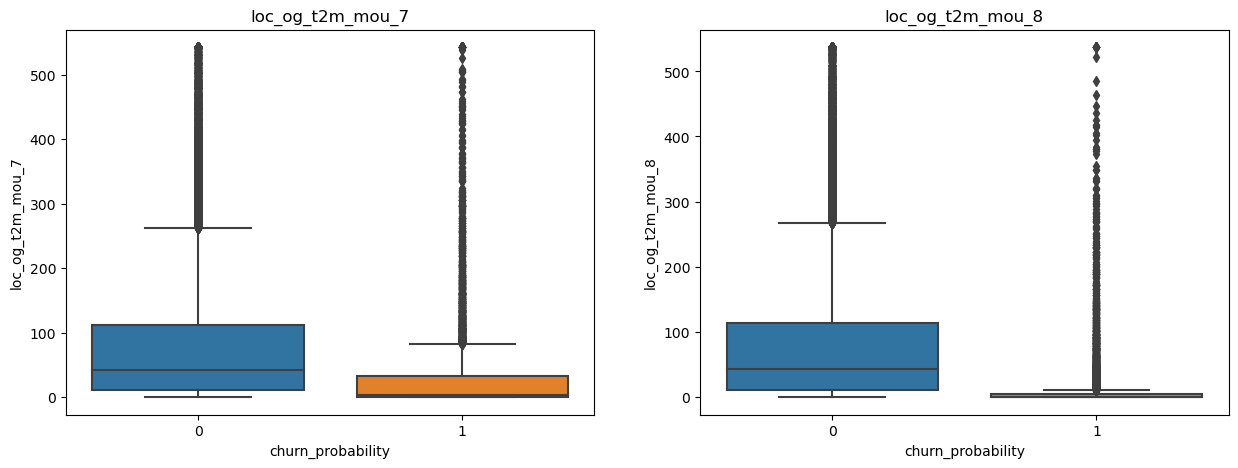

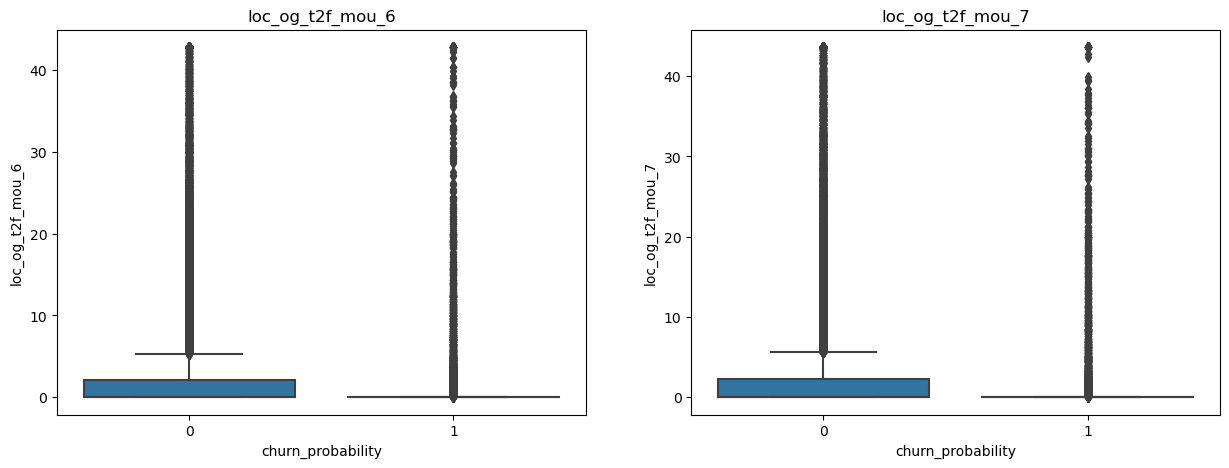

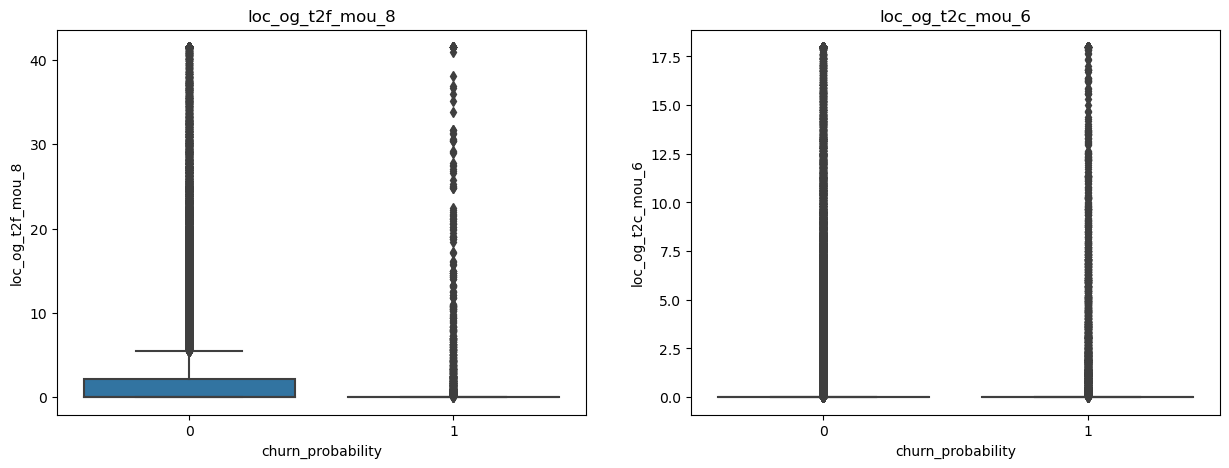

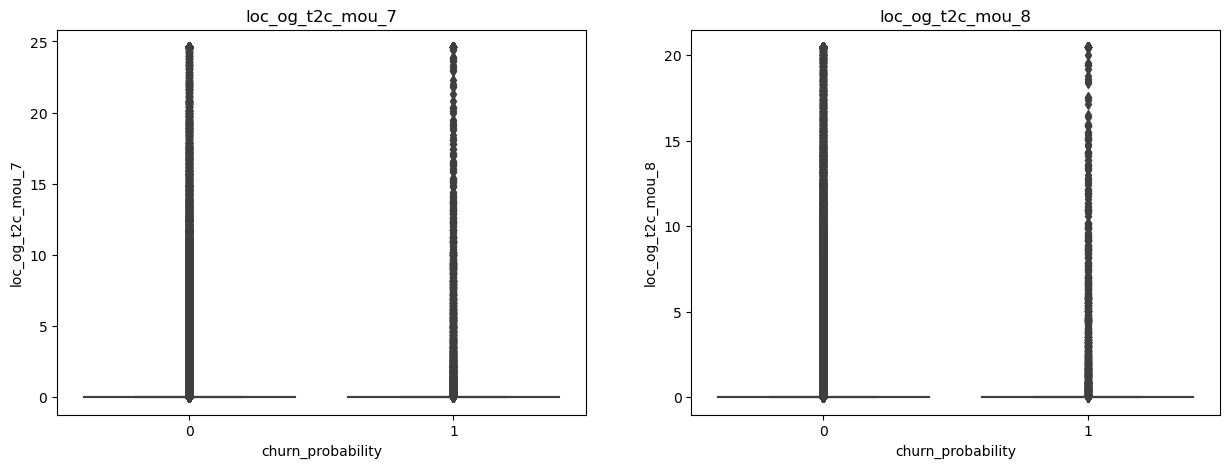

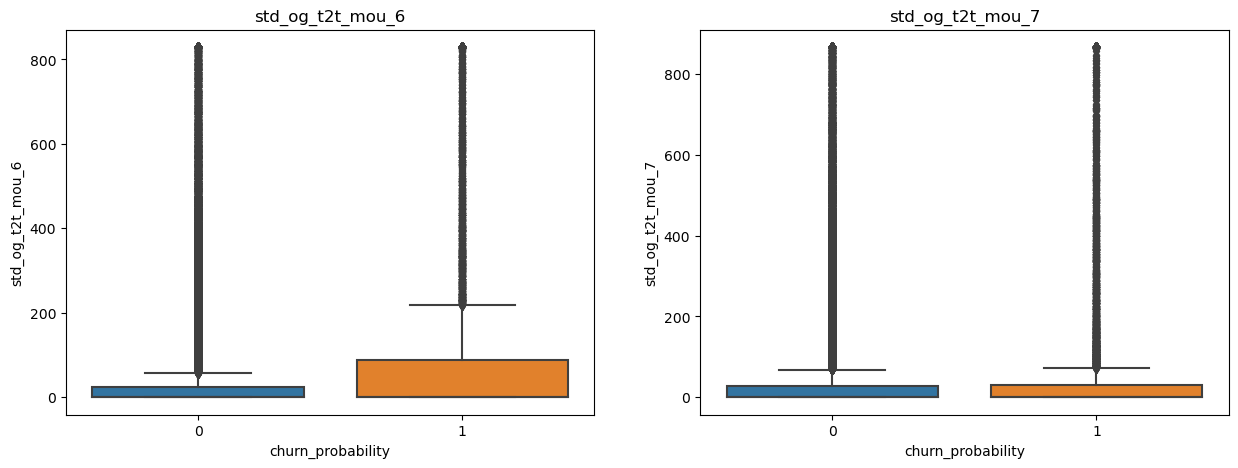

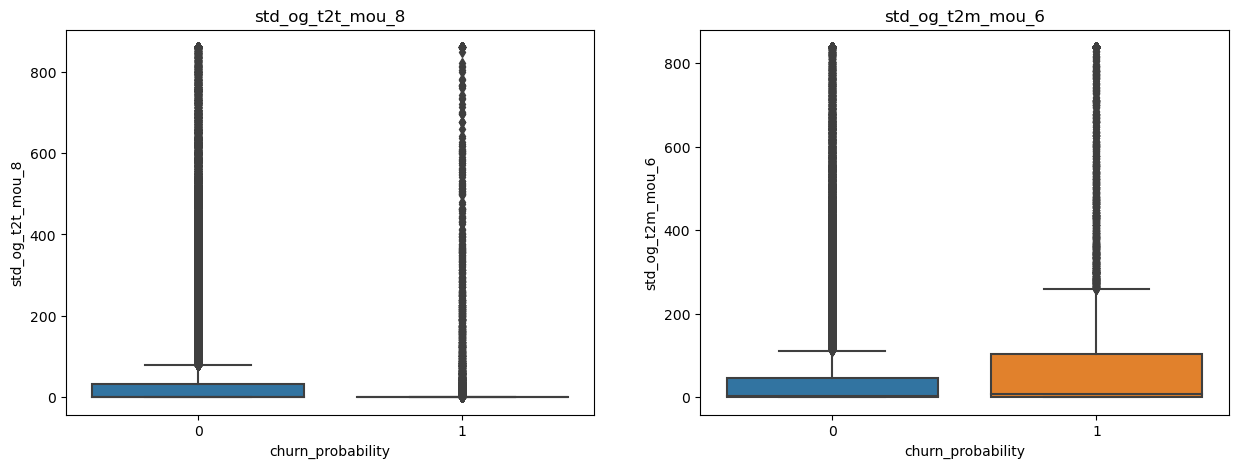

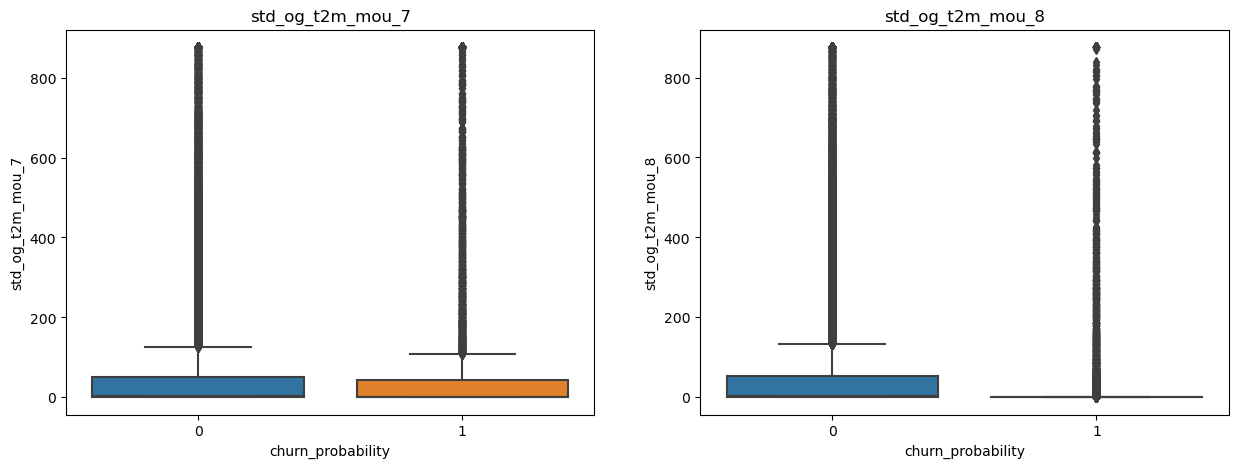

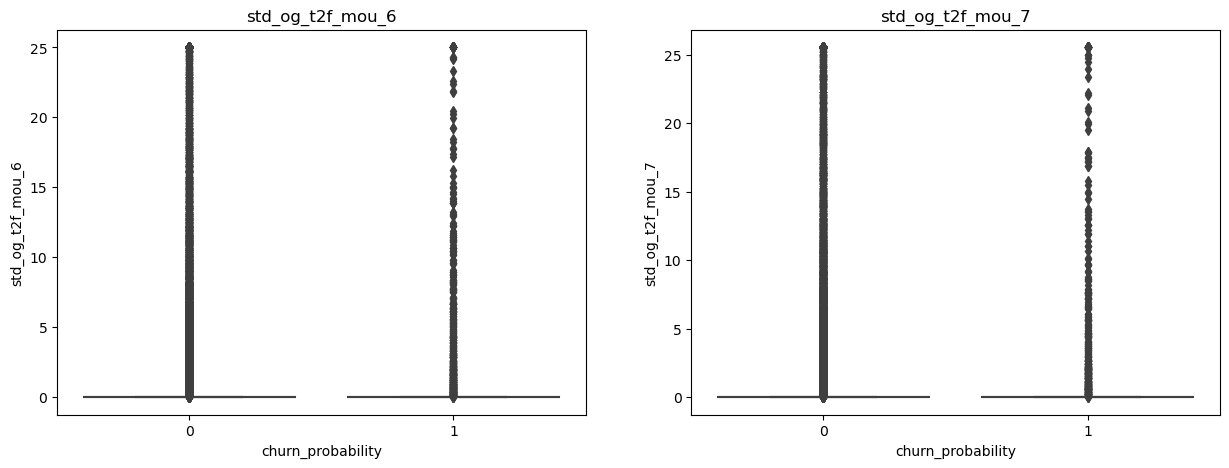

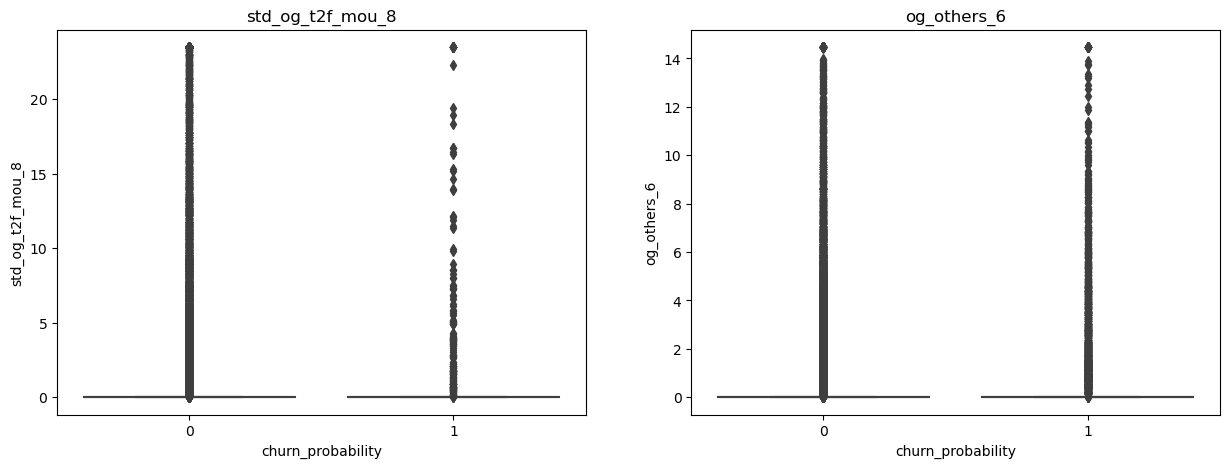

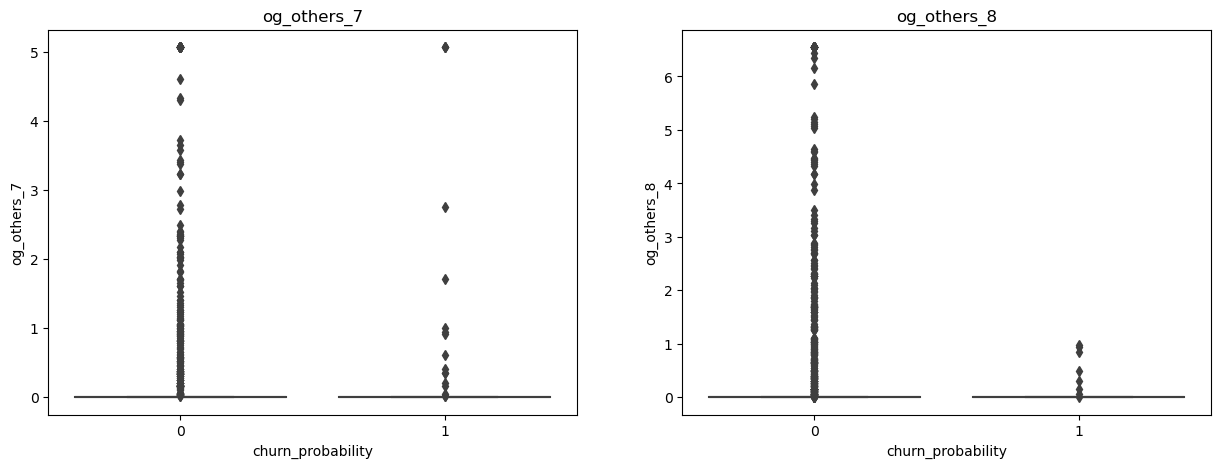

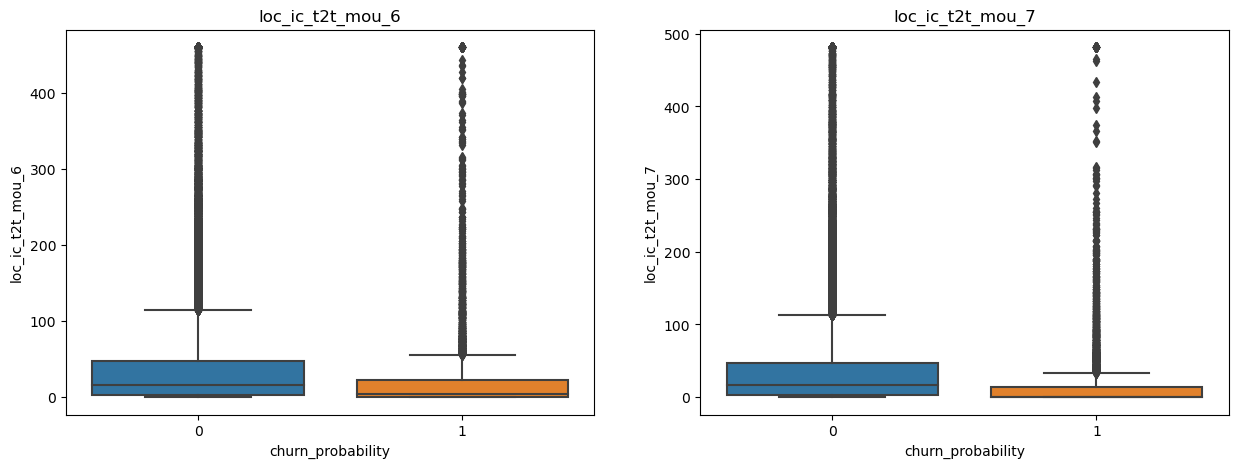

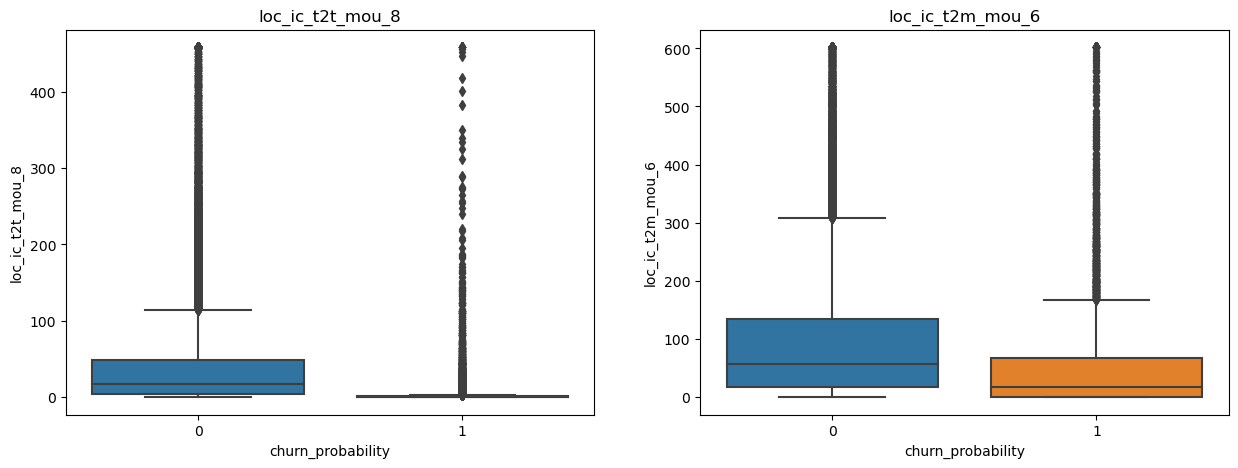

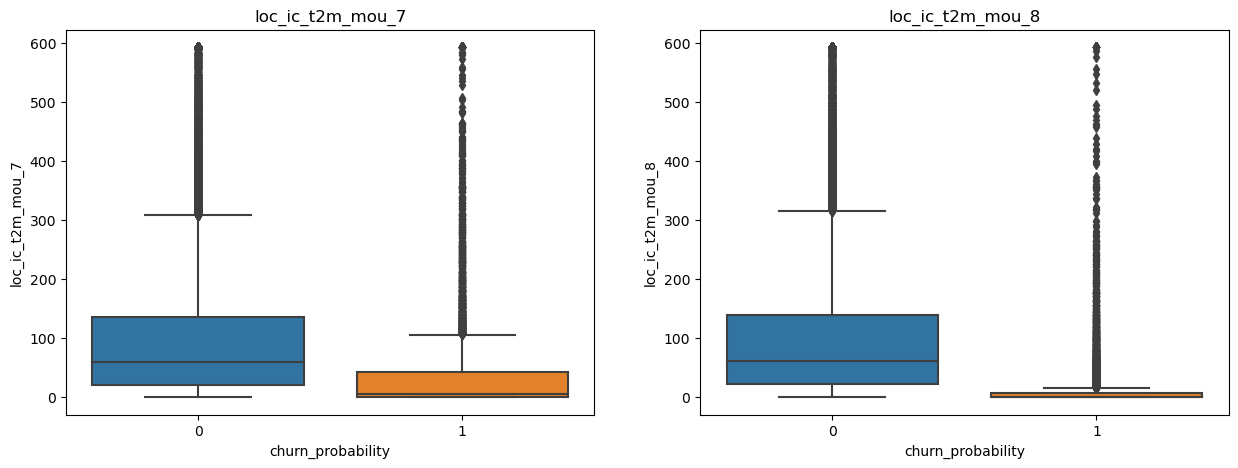

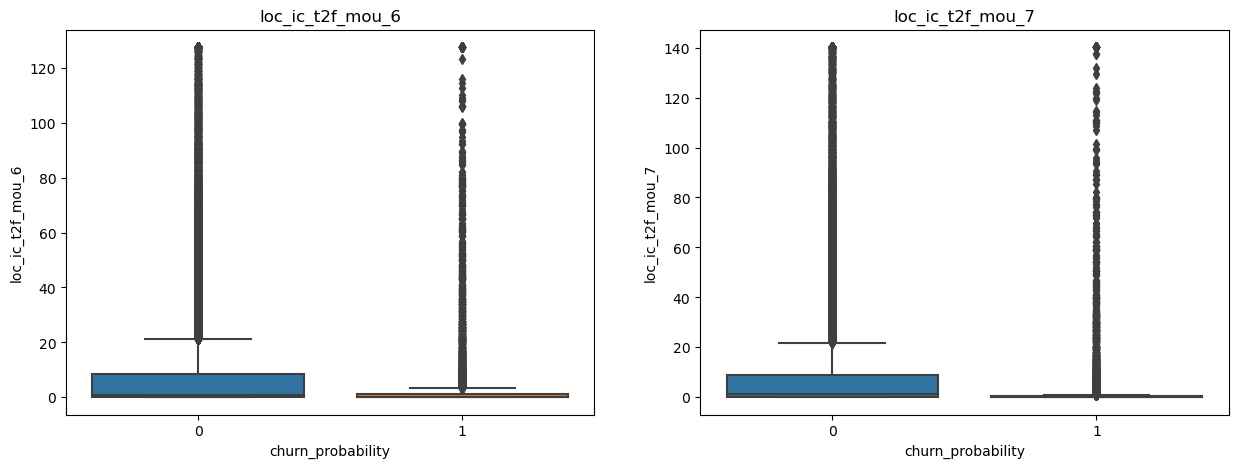

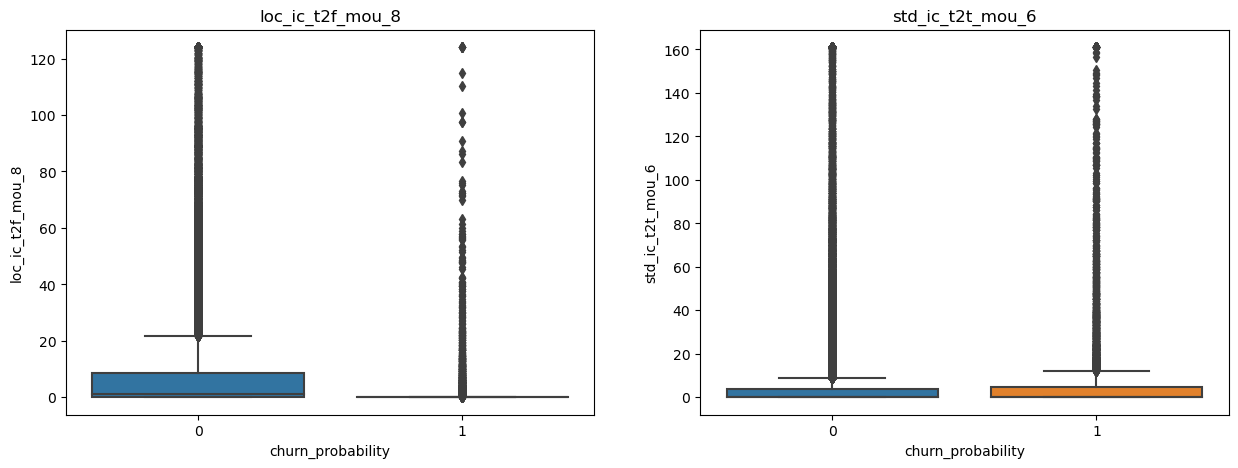

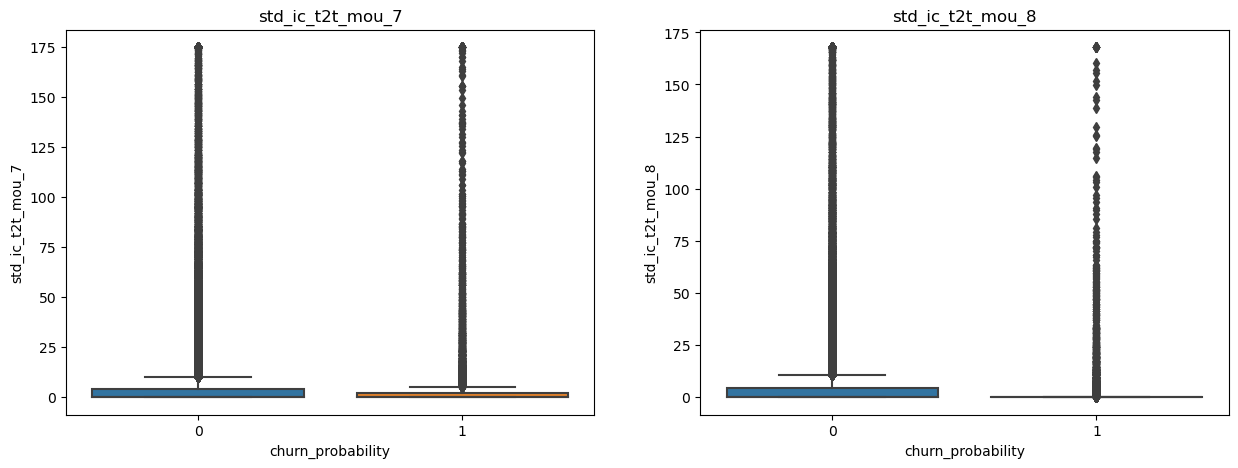

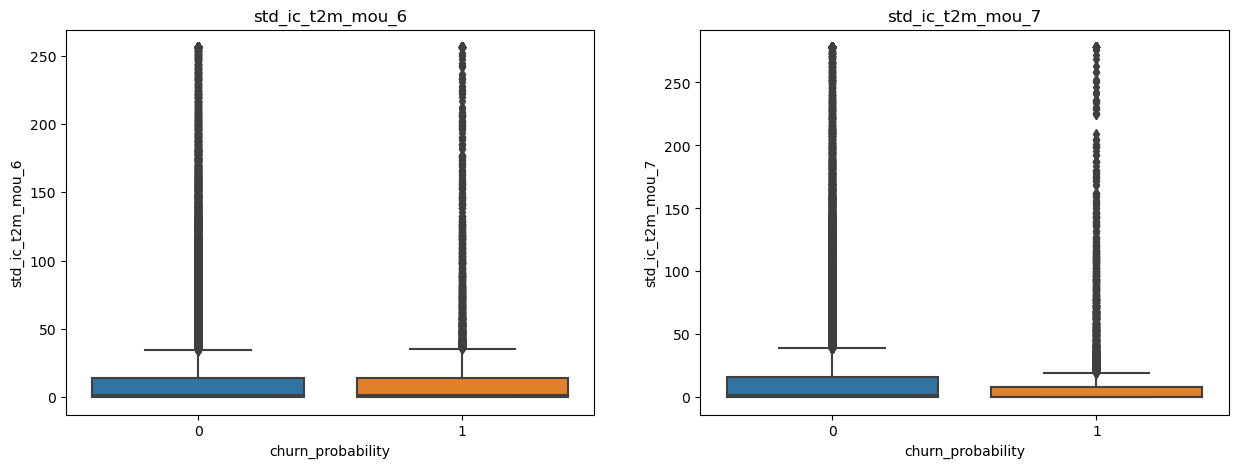

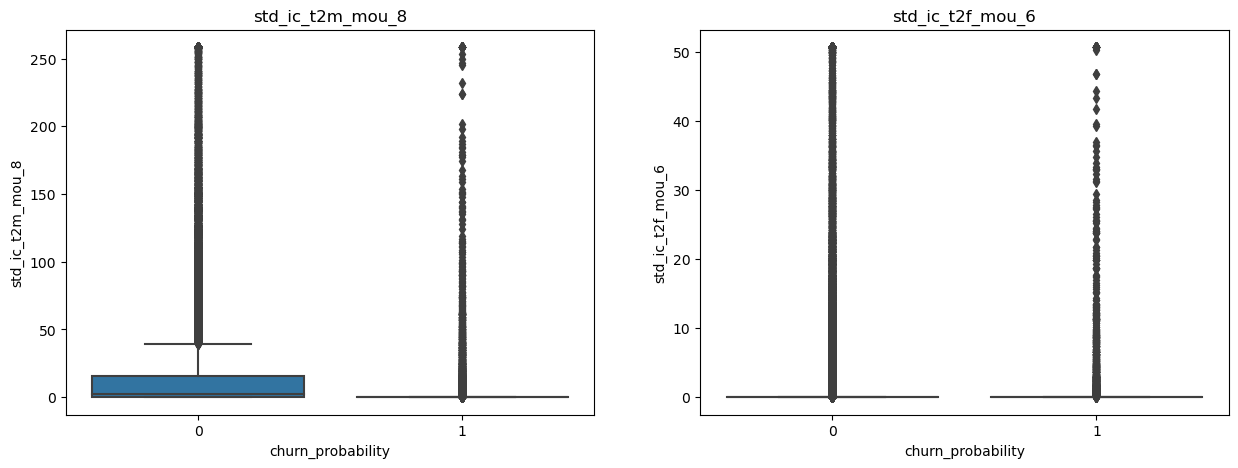

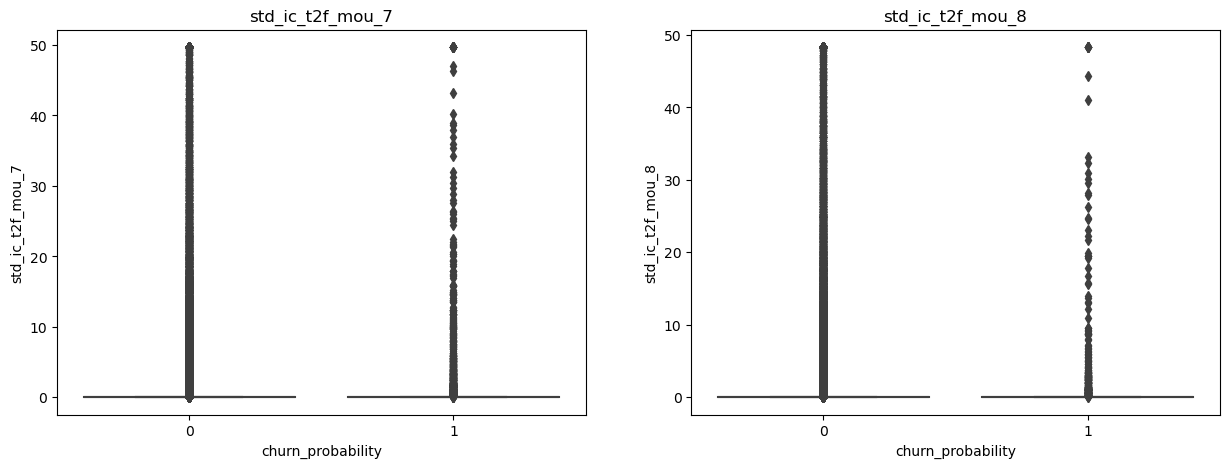

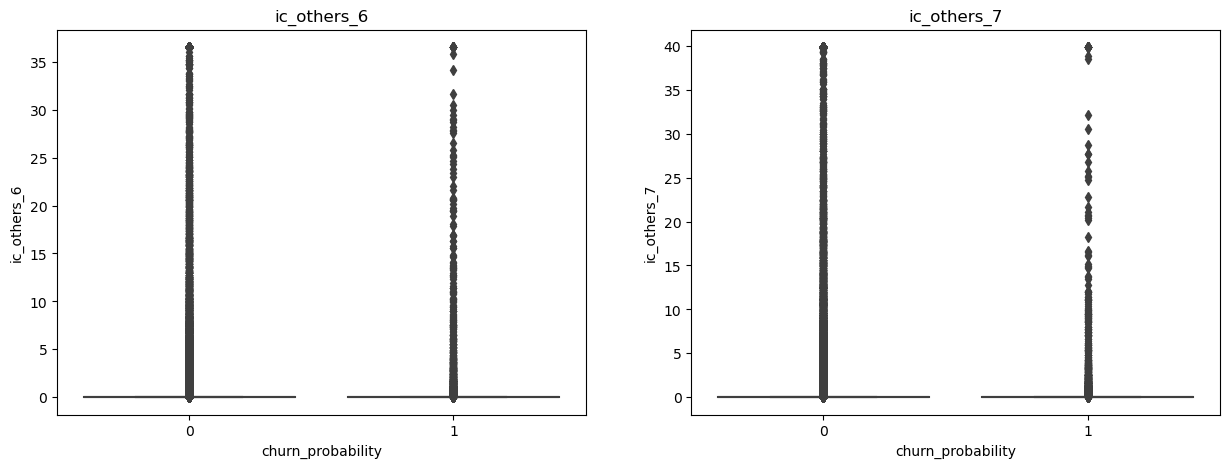

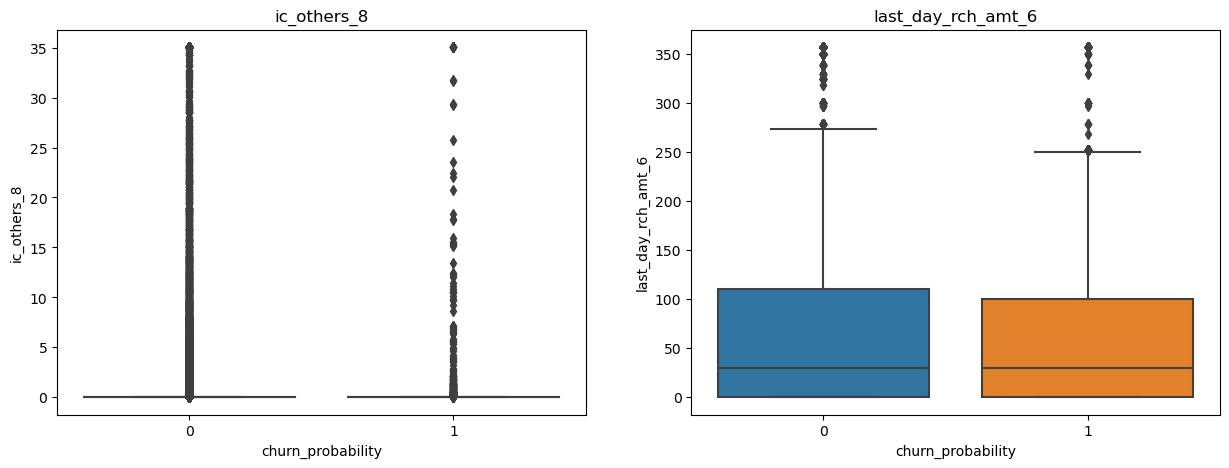

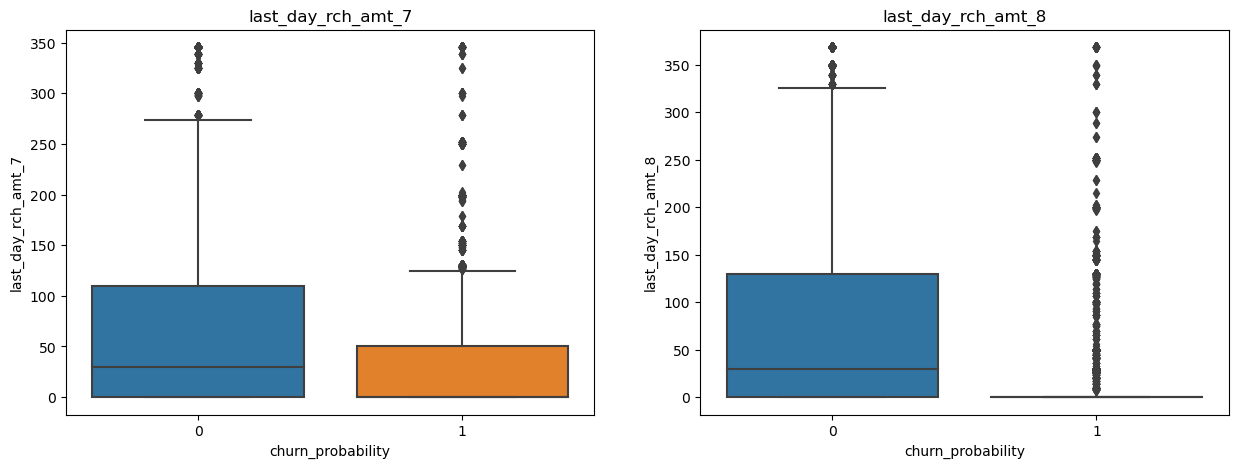

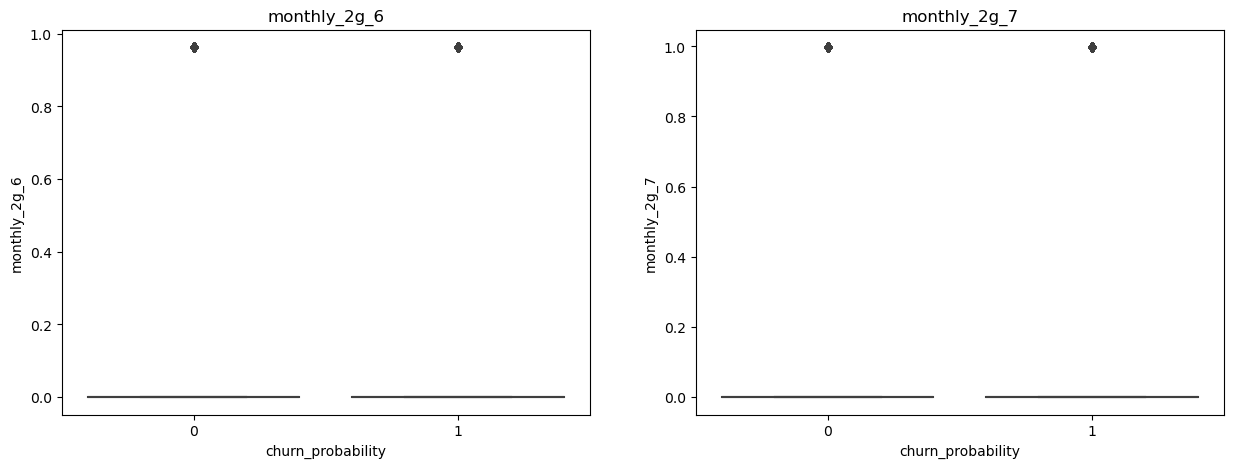

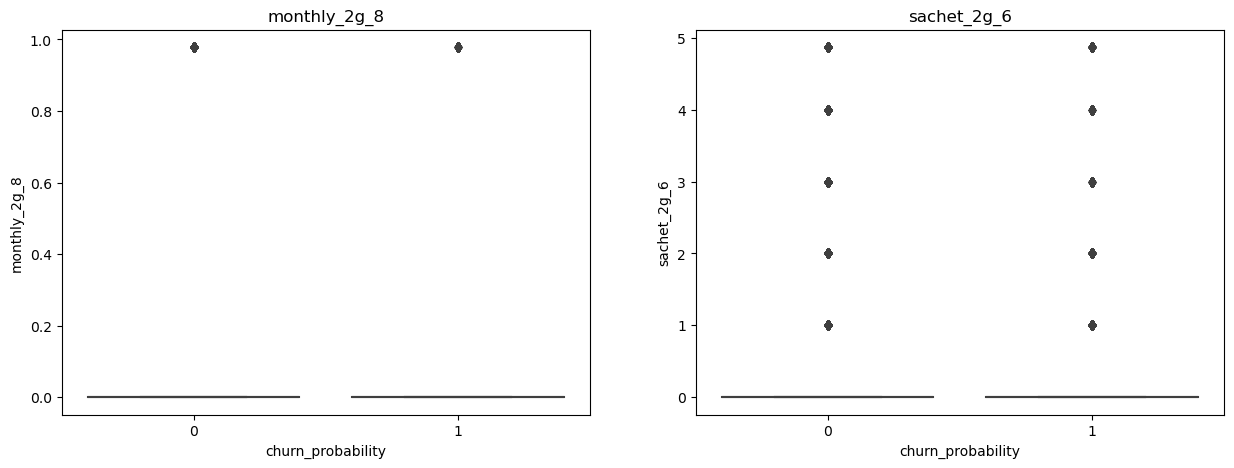

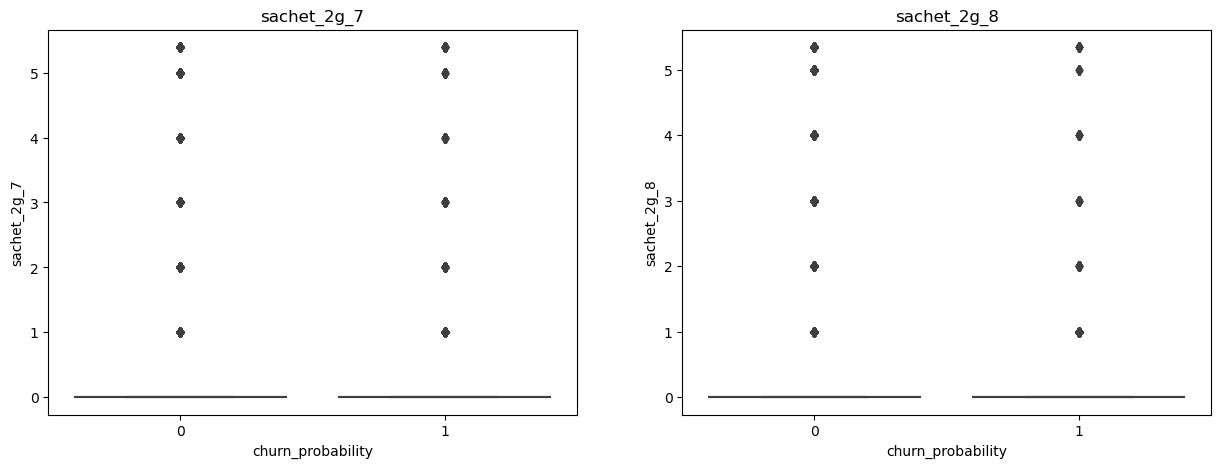

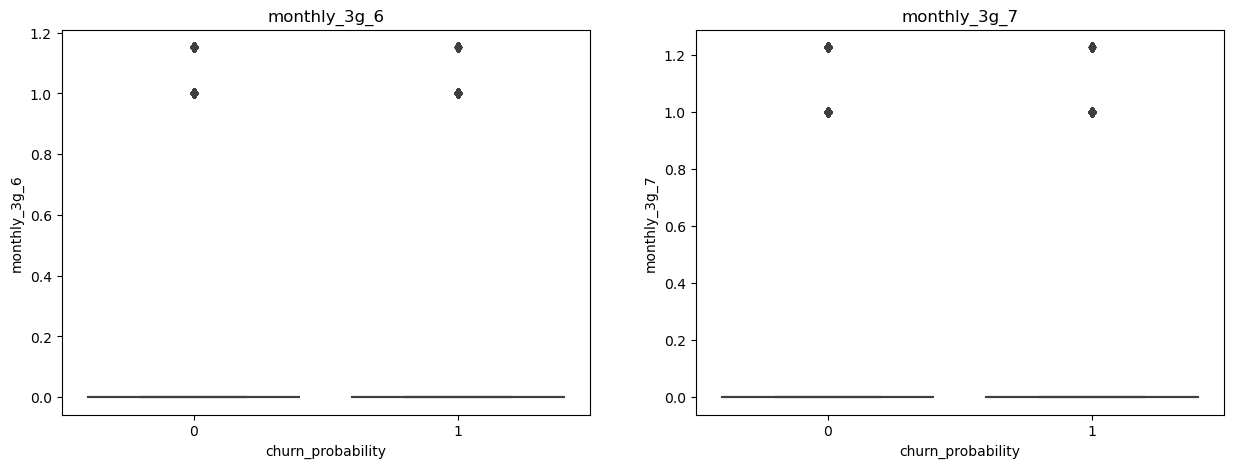

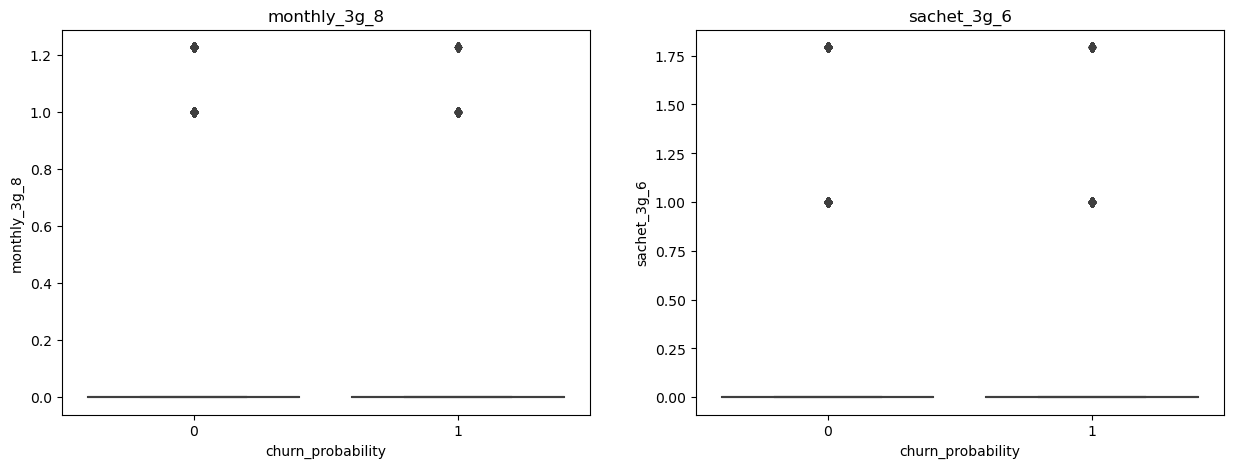

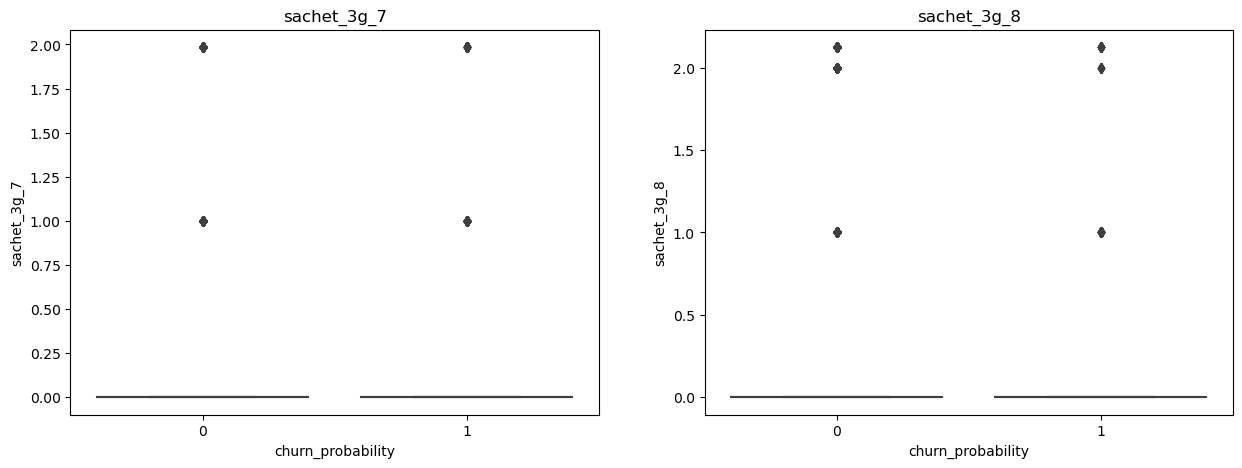

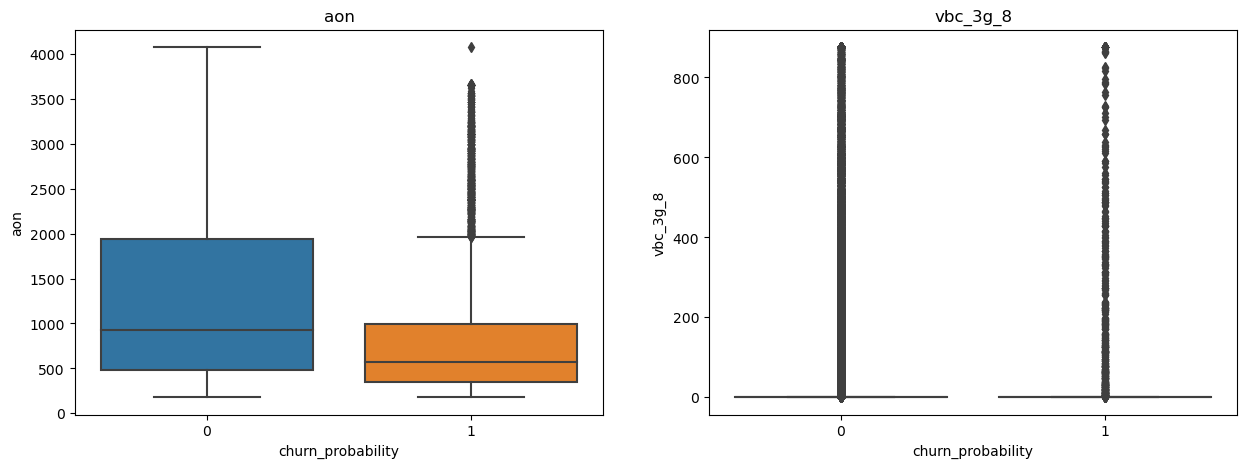

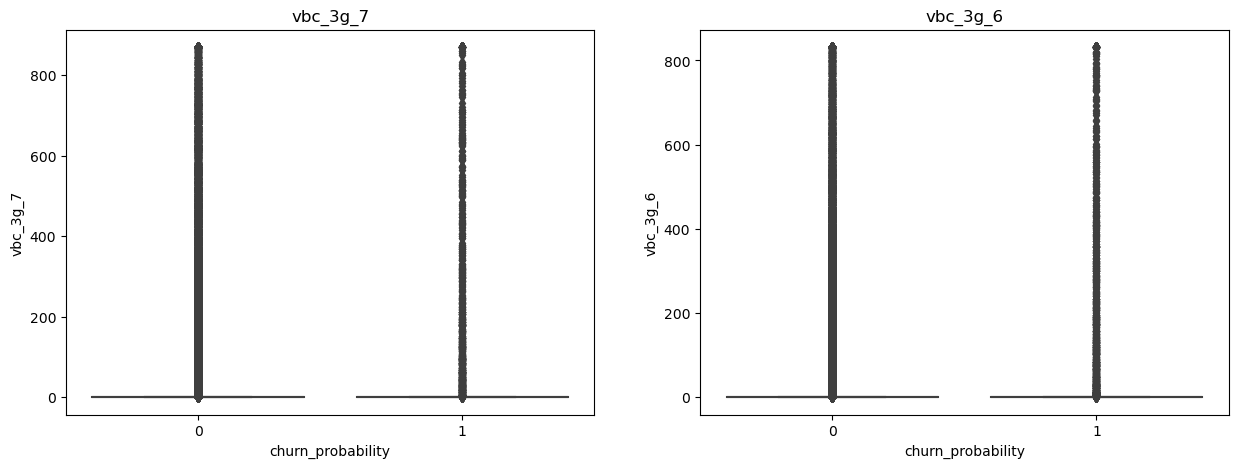

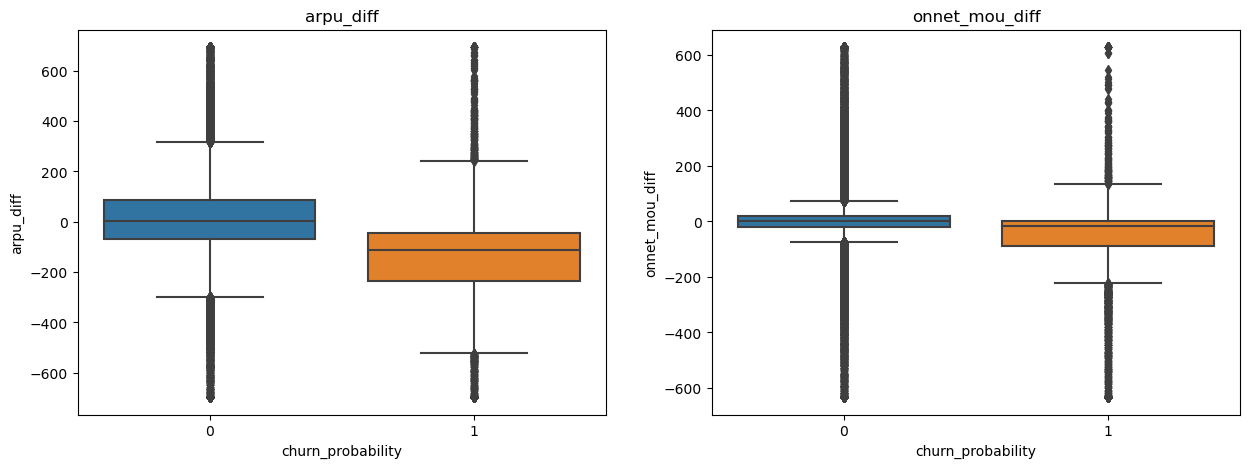

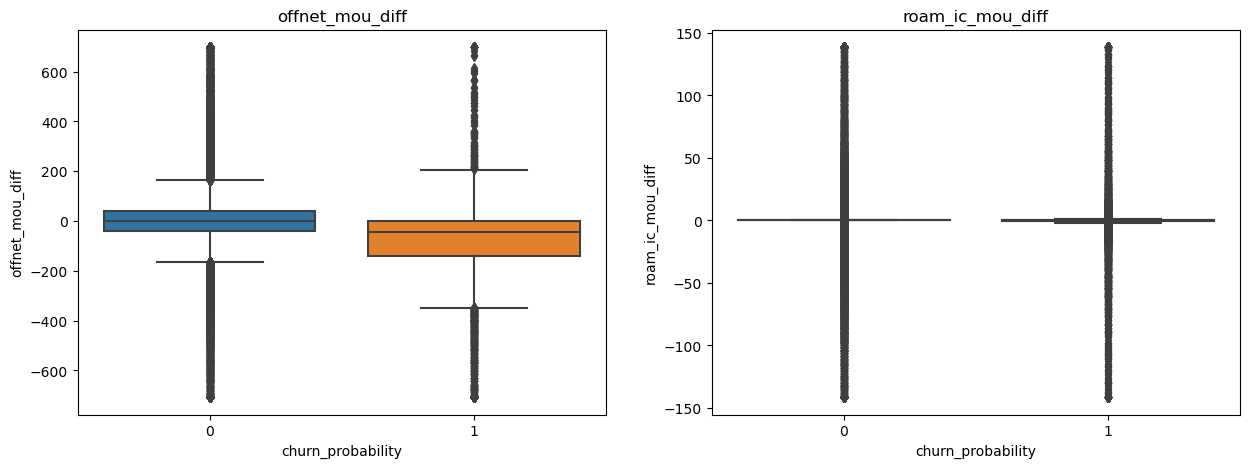

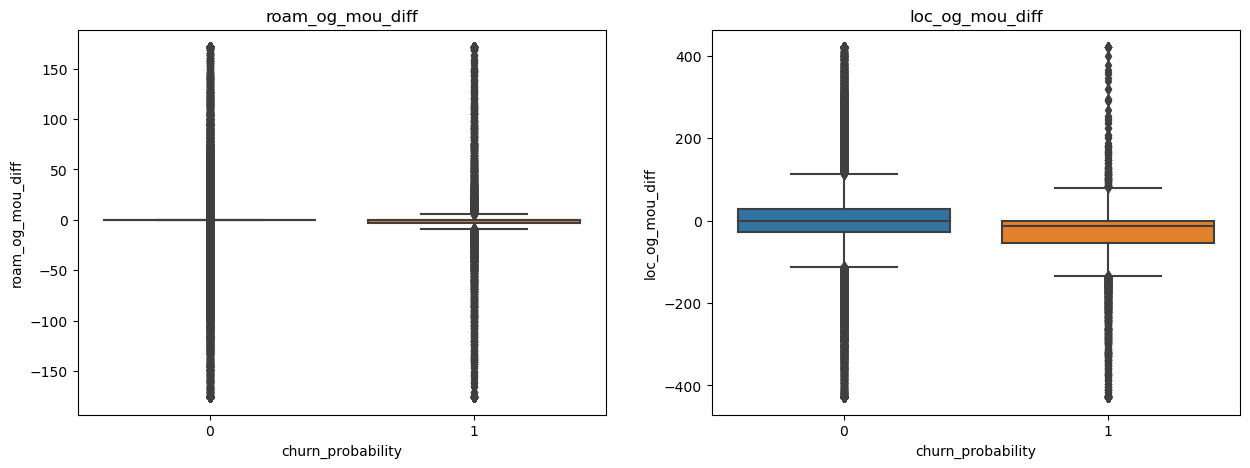

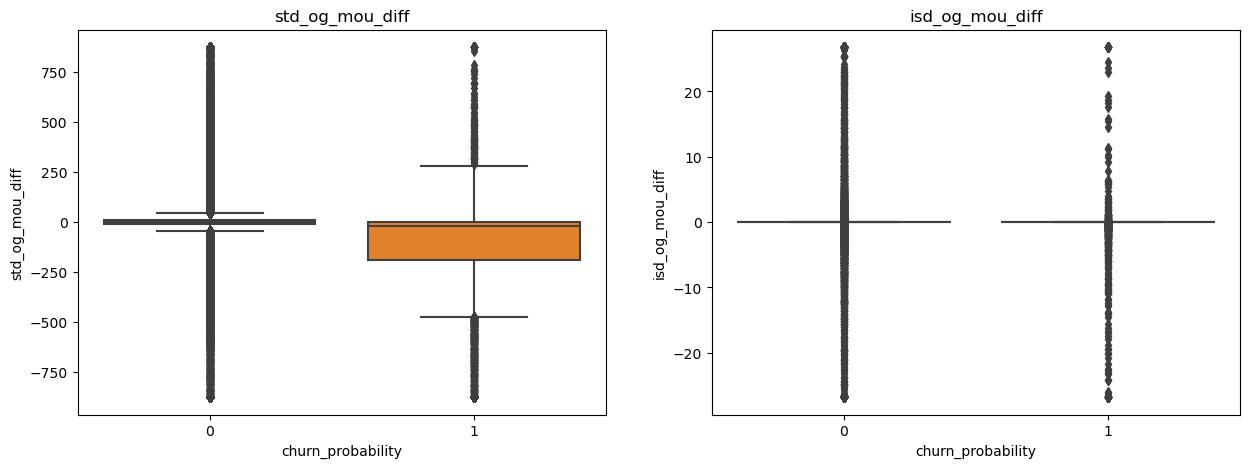

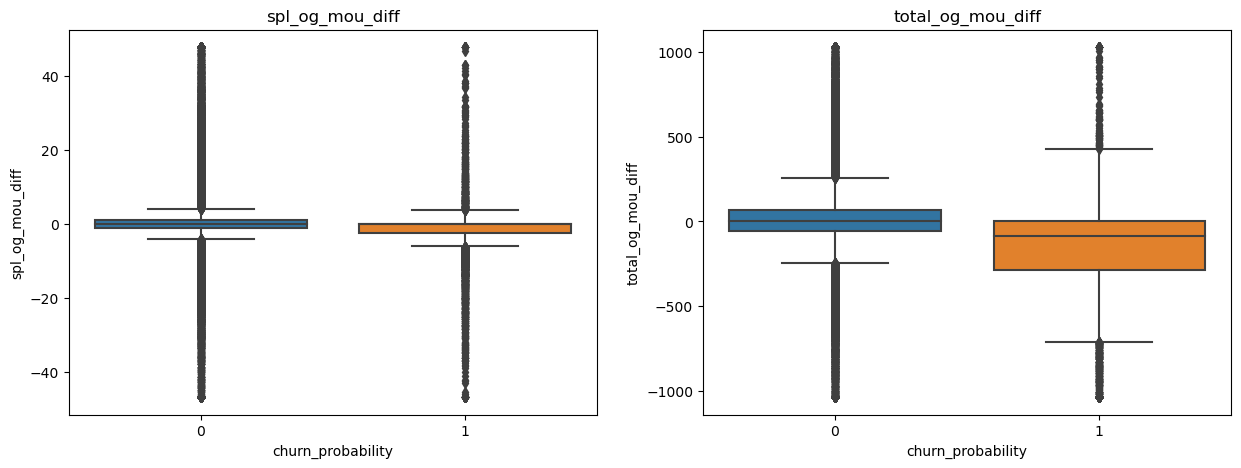

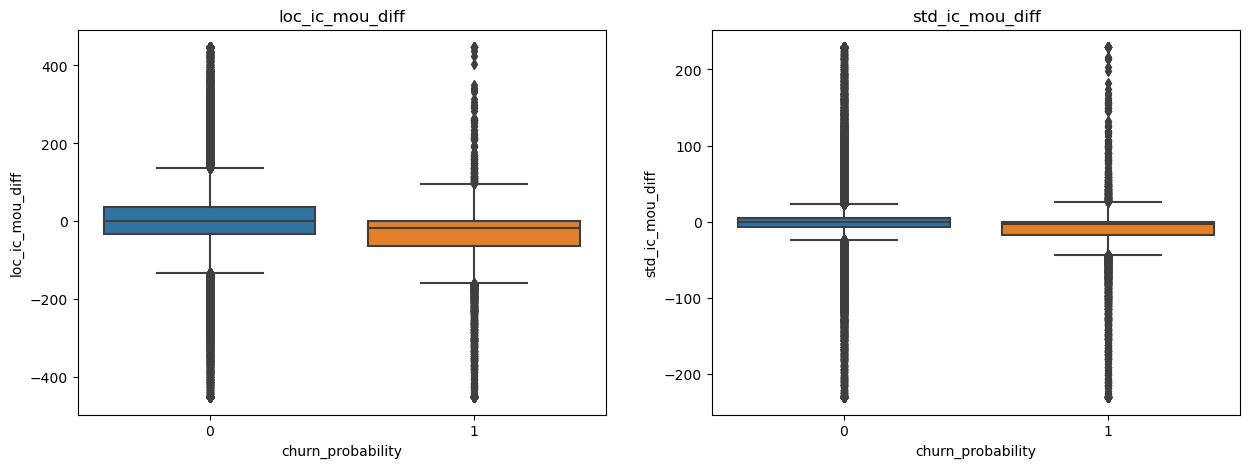

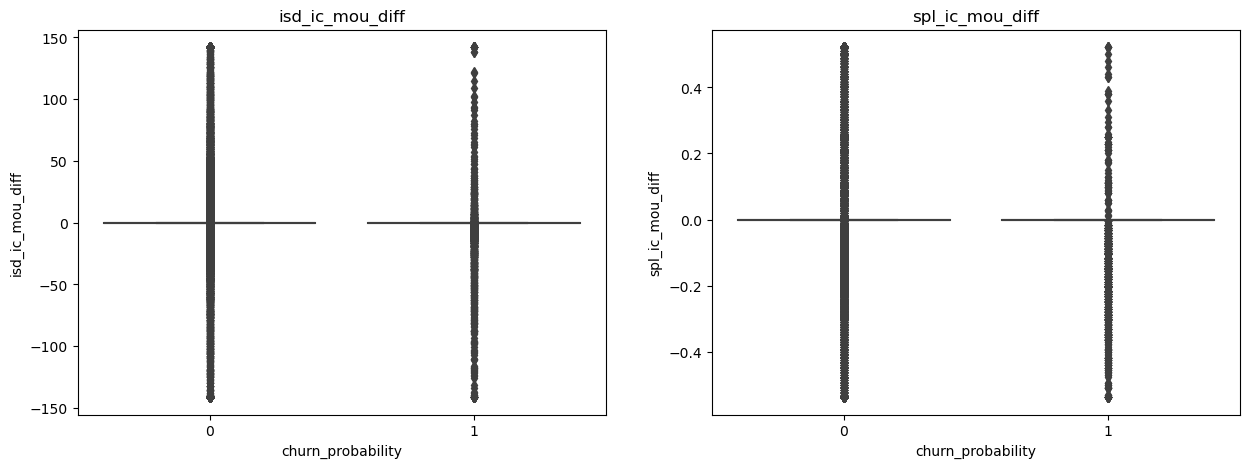

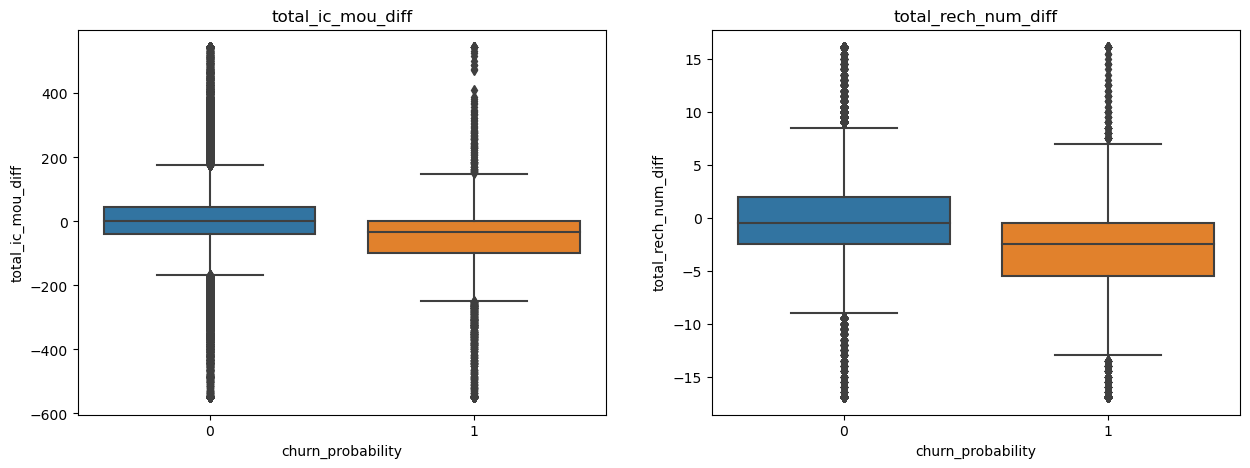

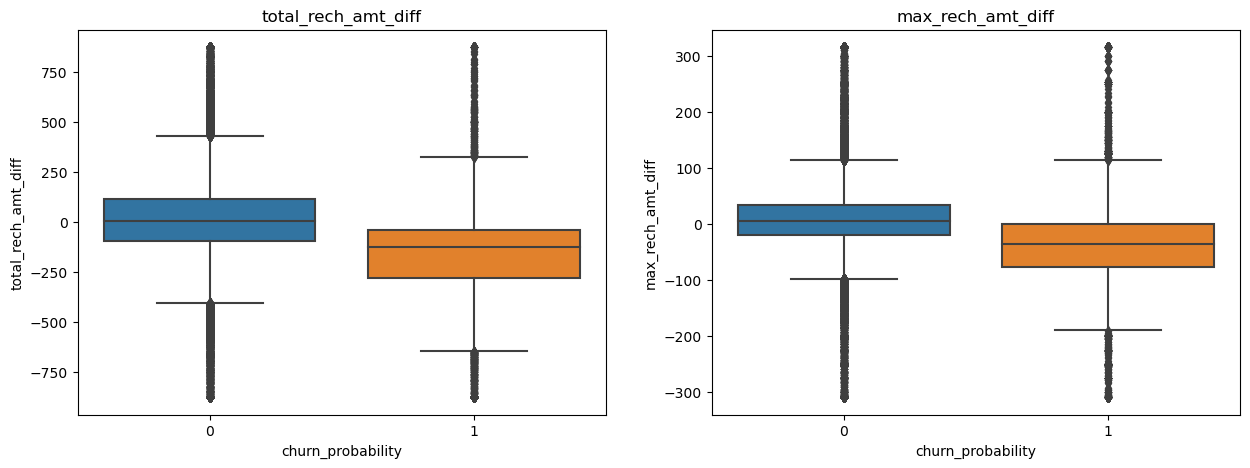

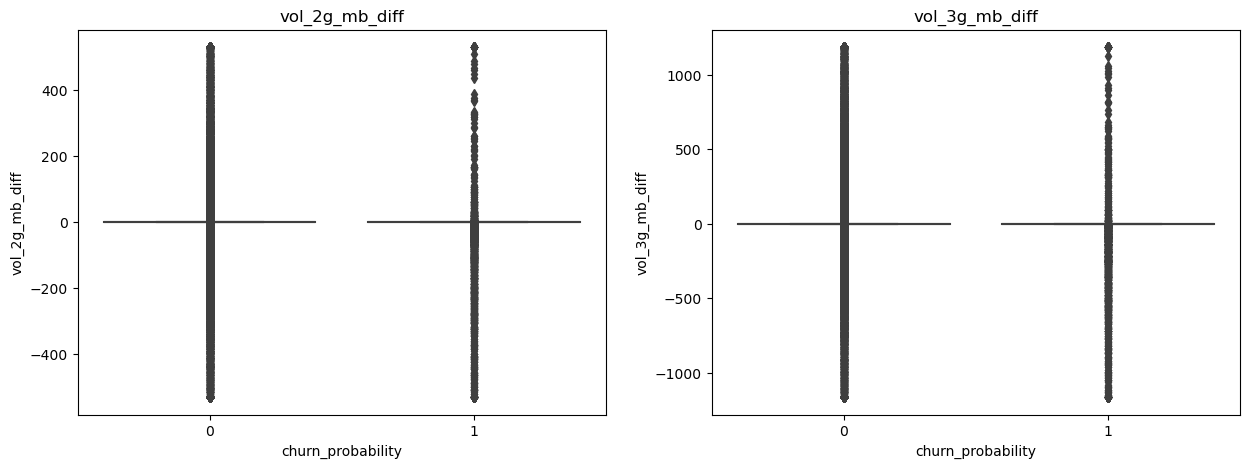

In [38]:
# Draw scatter plot for all the numeric columns vs Sale Price in the dataframe
len_num_cols = len(num_cols)
for i in range(0, len_num_cols, 2):
    # Set the figure size to a standard so that it will be easy for viewing
    plt.figure(figsize=(15,5))
    # Set the subplot index
    plt.subplot(1,2,1)
    # Calling scatter plot
    sns.boxplot(churn_data, y=num_cols[i], x="churn_probability")
    # Set the title of subplot
    plt.title(num_cols[i])
    # Set the subplot index
    plt.subplot(1,2,2)
    # Calling scatter plot
    sns.boxplot(churn_data, y=num_cols[i+1], x="churn_probability")
    # Set the title of subplot
    plt.title(num_cols[i+1])
    plt.show()

**Inference:**

Some of the behaviours of Churn customers are
> - Significant drop in total outgoing calls
> - Signifcant drop in total amount recharge, last day recharged amount and maximum amount recharged
> - Signifcant drop in AON
> - Signifcant drop in ARPU
> - STD outgoing calls are high for churn customers

---

<Axes: >

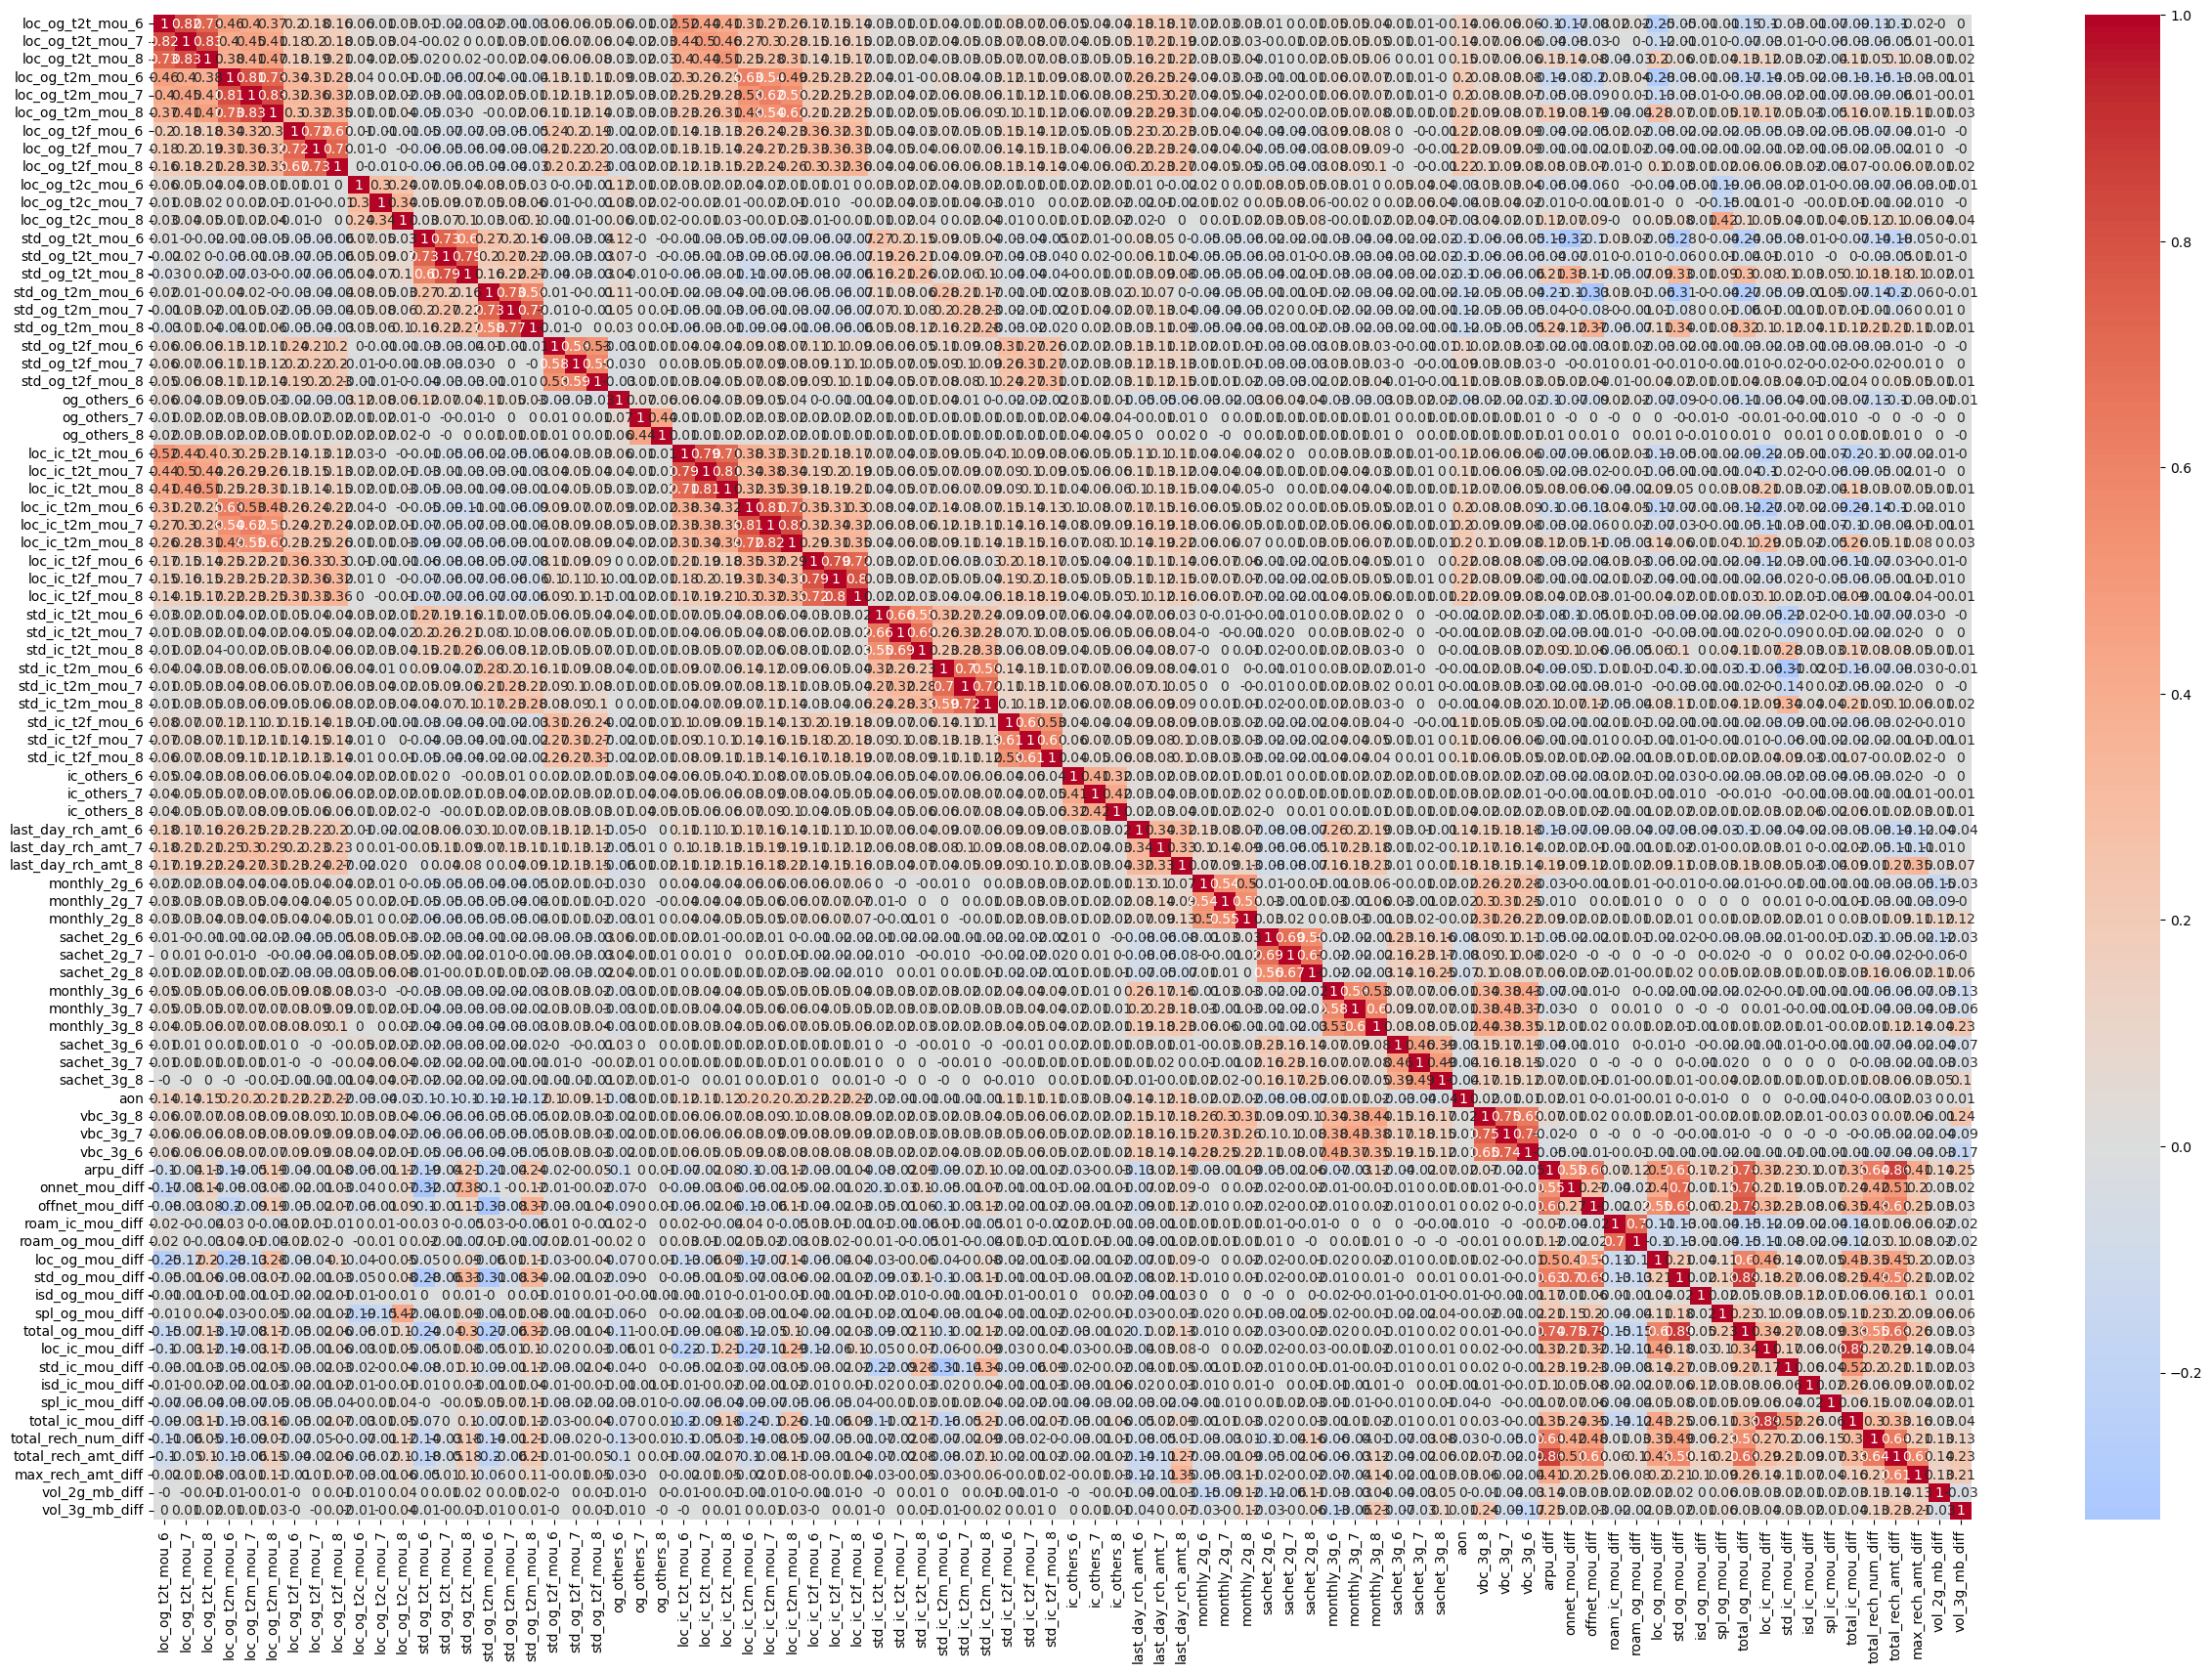

In [39]:
# Let's create heatmap to understand the correlation value between these variables
plt.figure(figsize=(30,20))
sns.heatmap(round(churn_data.corr(),2), cmap='coolwarm' , annot=True, center = 0)

> From the above heat map, we could see some relationship between variables. Let's find the top correlated variables.

In [40]:
# Create correlation matrix
corr_matrix = churn_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("Highly Correlated features in data set with more than 0.8 absolute : {}\n\n{}".format(len(high_corr_features), high_corr_features))

Highly Correlated features in data set with more than 0.8 absolute : 10

['loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_og_mou_diff', 'total_ic_mou_diff', 'total_rech_amt_diff']


> - Let's not drop these columns as it will be handled by PCA.

---
---

<a id='prepare'></a>
## Step 4: Data Preparation

> There are no categoric columns to be prepared for encoding and also the data is cleaned already.

- We need to split the given dataset into dependent and independent variable.

In [41]:
# Split into X and Y data
y = churn_data['churn_probability'].apply(lambda x: 0 if x==0 else 1)
X = churn_data.drop('churn_probability', axis=1)

In [42]:
# Update the column classification based on types
classify_cols(X)

Numeric columns:  ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8

---
<a id='prepare_split'></a>
### 4.1 Data split into train and test

In [43]:
# We specify random_state so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

---
<a id='prepare_scaler'></a>
### 4.2 Standard Scaler

In [44]:
# Create a Standard scaler object
scaler = StandardScaler()
# Since we need to learn and apply the learning on train data, we use fit_transform()
X_train_scaled = scaler.fit_transform(X_train)
# Apply the scale learning on test data
X_test_scaled = scaler.transform(X_test)
# Apply the scale learning on unseen test data
unseen_test_data_scaled = scaler.transform(unseen_test_data)

---
<a id='prepare_imbalance'></a>
### 4.3 Data Imbalance

In [45]:
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))

Imbalance in Train Data: 0.1130571078097315


> - We could see only **11%** of customers churn. This is highly imbalanced data. Let's use SMOTE techique to create a balanced data.

In [46]:
#Balance using SMOTE technique
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=100)
X_train_balance,y_train_balance = sm.fit_resample(X_train_scaled,y_train)

In [47]:
y_train_imb = (y_train_balance != 0).sum()/(y_train_balance == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))

Imbalance in Train Data: 1.0


---
---
<a id='feature_engineering'></a>
## Step 5: Feature Engineering

- Before creating model, let's reduce the dimensionality

### PCA

<Axes: >

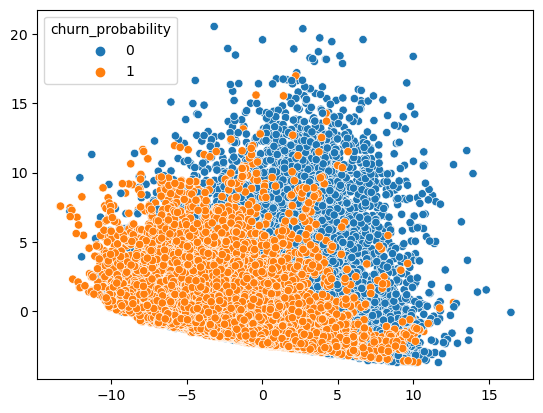

In [48]:
# PCA object with default settings
pca = PCA()
# Perform dimensionality reduction on the balanced train dataframe
pca_components = pca.fit_transform(X_train_balance)
# Plot the first two components against churn probability for understanding the clusters
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train_balance)

> - **Inference:** We could see somewhat separable two clusters being formed.

##### Scree Plot

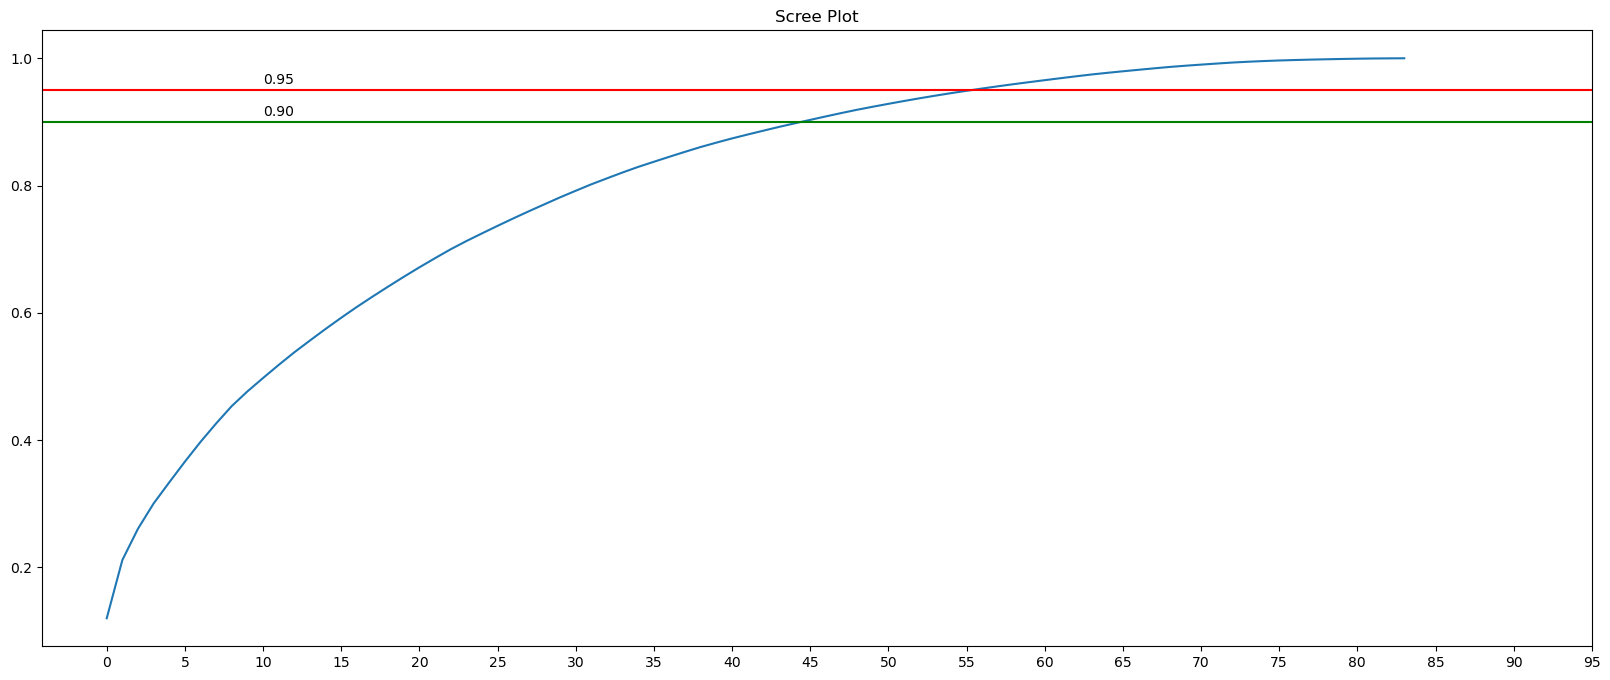

In [49]:
# Scree Plot to pick the number of components
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.lineplot(var_cum)
plt.xticks(np.arange(0,100,5))
plt.axhline(0.90,color='g')
plt.text(10,0.91,'0.90')
plt.axhline(0.95,color='r')
plt.text(10,0.96,'0.95')
plt.title('Scree Plot')
plt.show()

**Inference:**
> - Around **55** components explain *95%* of data variation and **45** components explain *90%* of data variation.
> - Let's use **60** components which explains atleast 95% of data variation.

In [50]:
# Final PCA object with 60 components
pca_final = PCA(n_components=60, random_state=42)
# Perform dimensionality reduction on balanced train data
transformed_data = pca_final.fit_transform(X_train_balance)

# Create a train dataframe with PCA components
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,61)])

# Apply the PCA learning on test data and create a test dataframe with PCA components
X_test_pca = pd.DataFrame(pca_final.transform(X_test_scaled),columns=["PC_"+str(x) for x in range(1,61)])

# Apply the PCA learning on unseen test data and create a unseen test dataframe with PCA components
unseen_pca = pd.DataFrame(pca_final.transform(unseen_test_data_scaled),columns=["PC_"+str(x) for x in range(1,61)])

---
---

<a id='build'></a>
## Step 6: Building model

In [51]:
# Create a method to print performance statistics
def stats_on_data(model, X, y):
    # predict churn on test data
    y_pred = model.predict(X)

    # print the score of prediction
    print("\nScore : ", model.score(X,y))

    # create confusion matrix
    cm = confusion_matrix(y, y_pred)
    print("\nConfusion Matrix: \n",cm)

    # print classification report
    print("\nClassification report:")
    print(classification_report(y, y_pred))
    
    # check sensitivity and specificity
    sensitivity, specificity, _ = sensitivity_specificity_support(y, y_pred, average='binary')
    print("\nSensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
    
def performance_stats(model, X_train, y_train, X_test, y_test):
    print("\n---------------------")    
    print("Train data Statistics")
    print("---------------------")
    stats_on_data(model, X_train, y_train)
    print("\n---------------------")    
    print("Test data Statistics")
    print("---------------------")
    stats_on_data(model, X_test, y_test)
    print("---------------------")
    # Plot ROC curve on train data
    RocCurveDisplay.from_estimator(model, X_train, y_train, name="Train Data")
    # Plot ROC curve on test data
    RocCurveDisplay.from_estimator(model, X_test, y_test, name="Test Data")

---
<a id='datamodel_log_reg'></a>
### 6.1 Logistic Regression

#### 6.1.1 Default parameters with PCA

In [52]:
%%time
# Create logistic regression object with default setting
log_reg_pca = LogisticRegression(random_state=42, n_jobs=-1)
# Create logisitc regression model with pca components
log_reg_pca.fit(X_train_pca, y_train_balance)

CPU times: total: 203 ms
Wall time: 10.6 s


LogisticRegression(n_jobs=-1, random_state=42)


---------------------
Train data Statistics
---------------------

Score :  0.826325473626823

Confusion Matrix: 
 [[34450  9572]
 [ 5719 38303]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     44022
           1       0.80      0.87      0.83     44022

    accuracy                           0.83     88044
   macro avg       0.83      0.83      0.83     88044
weighted avg       0.83      0.83      0.83     88044


Sensitivity: 	0.87
Specificity: 	0.78

---------------------
Test data Statistics
---------------------

Score :  0.7893333333333333

Confusion Matrix: 
 [[14736  4109]
 [  315  1840]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     18845
           1       0.31      0.85      0.45      2155

    accuracy                           0.79     21000
   macro avg       0.64      0.82      0.66     21000
weighted avg       0

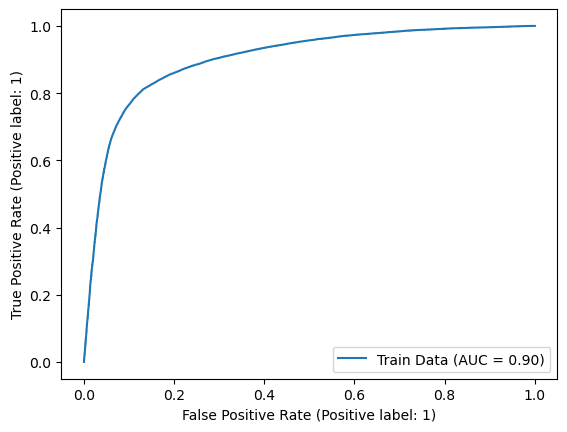

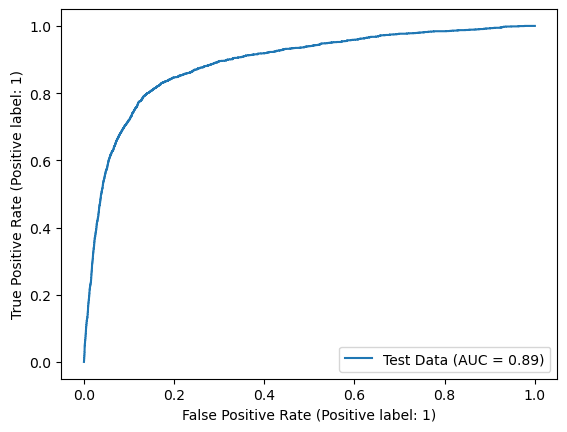

In [53]:
# Display performance statistics
performance_stats(log_reg_pca, \
                  X_train_pca, y_train_balance, \
                  X_test_pca, y_test)

---

#### 6.1.2 Hyper parameter tuning with PCA

In [54]:
# Logistic regression object
log_reg_pca_hpt = LogisticRegression(random_state=42, n_jobs=-1)
# Hyperparameter space
log_reg_pca_params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}
# folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [55]:
%%time
# cross validation
log_reg_pca_cv = GridSearchCV(estimator = log_reg_pca_hpt,
                        param_grid = log_reg_pca_params, 
                        scoring= 'precision',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)

log_reg_pca_cv.fit(X_train_pca, y_train_balance)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: total: 1.11 s
Wall time: 25.6 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='precision', verbose=1)

In [56]:
print("Best parameters : ", log_reg_pca_cv.best_params_)
print("Best Precision score : ", log_reg_pca_cv.best_score_)

Best parameters :  {'C': 0.5, 'penalty': 'l2'}
Best Precision score :  0.7994765828432693



---------------------
Train data Statistics
---------------------

Score :  0.826314115669438

Confusion Matrix: 
 [[34449  9573]
 [ 5719 38303]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     44022
           1       0.80      0.87      0.83     44022

    accuracy                           0.83     88044
   macro avg       0.83      0.83      0.83     88044
weighted avg       0.83      0.83      0.83     88044


Sensitivity: 	0.87
Specificity: 	0.78

---------------------
Test data Statistics
---------------------

Score :  0.7893809523809524

Confusion Matrix: 
 [[14737  4108]
 [  315  1840]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     18845
           1       0.31      0.85      0.45      2155

    accuracy                           0.79     21000
   macro avg       0.64      0.82      0.66     21000
weighted avg       0

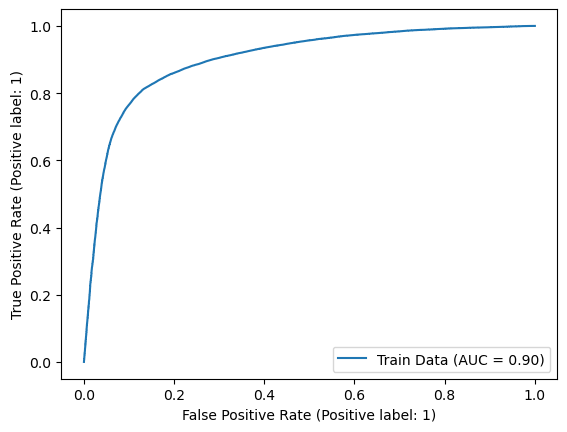

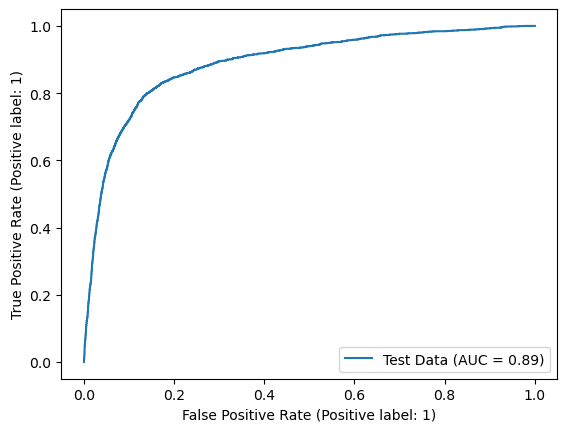

In [57]:
# Display performance statistics
performance_stats(log_reg_pca_cv.best_estimator_, \
                  X_train_pca, y_train_balance, \
                  X_test_pca, y_test)

---

#### 6.1.3 Default parameters without PCA

In [58]:
%%time
# Create logistic regression object with default setting
log_reg = LogisticRegression(random_state=42, n_jobs=-1)
# Create logisitc regression model without pca components
log_reg.fit(X_train_balance, y_train_balance)

CPU times: total: 109 ms
Wall time: 20.5 s


LogisticRegression(n_jobs=-1, random_state=42)


---------------------
Train data Statistics
---------------------

Score :  0.8262005360955885

Confusion Matrix: 
 [[34526  9496]
 [ 5806 38216]]

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     44022
           1       0.80      0.87      0.83     44022

    accuracy                           0.83     88044
   macro avg       0.83      0.83      0.83     88044
weighted avg       0.83      0.83      0.83     88044


Sensitivity: 	0.87
Specificity: 	0.78

---------------------
Test data Statistics
---------------------

Score :  0.7904761904761904

Confusion Matrix: 
 [[14750  4095]
 [  305  1850]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     18845
           1       0.31      0.86      0.46      2155

    accuracy                           0.79     21000
   macro avg       0.65      0.82      0.66     21000
weighted avg       

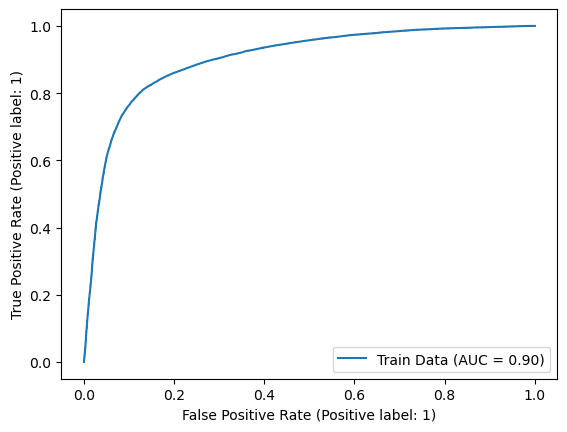

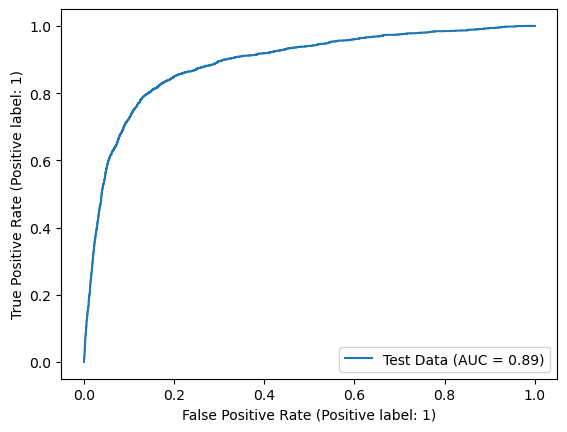

In [59]:
# Display performance statistics
performance_stats(log_reg, \
                  X_train_balance, y_train_balance, \
                  X_test_scaled, y_test)

---
<a id='datamodel_ranf'></a>
### 6.2 Random Forest

#### 6.2.1 Default Parameters with PCA

In [60]:
%%time
# Create random forest classifier object with default setting
ranf_pca = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create random forest classifier model with pca components
ranf_pca.fit(X_train_pca, y_train_balance)

CPU times: total: 5min 9s
Wall time: 1min 19s


RandomForestClassifier(n_jobs=-1, random_state=42)


---------------------
Train data Statistics
---------------------

Score :  1.0

Confusion Matrix: 
 [[44022     0]
 [    0 44022]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     44022

    accuracy                           1.00     88044
   macro avg       1.00      1.00      1.00     88044
weighted avg       1.00      1.00      1.00     88044


Sensitivity: 	1.0
Specificity: 	1.0

---------------------
Test data Statistics
---------------------

Score :  0.9060952380952381

Confusion Matrix: 
 [[17646  1199]
 [  773  1382]]

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     18845
           1       0.54      0.64      0.58      2155

    accuracy                           0.91     21000
   macro avg       0.75      0.79      0.77     21000
weighted avg       0.91      0.91   

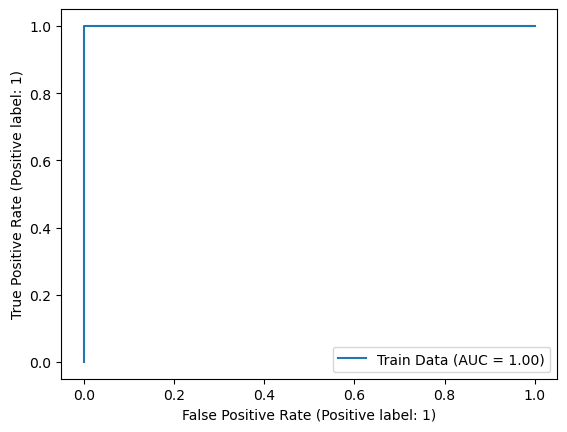

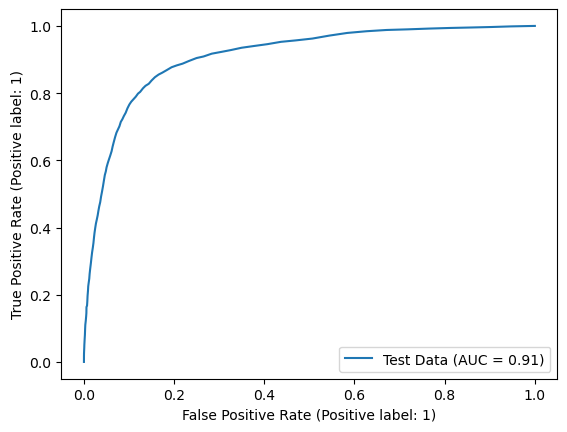

In [61]:
# Display performance statistics
performance_stats(ranf_pca, \
                  X_train_pca, y_train_balance, \
                  X_test_pca, y_test)

---
#### 6.2.2 Hyper Parameter tuning with PCA

In [62]:
# Random forest object
ranf_pca_hpt = RandomForestClassifier(random_state=42, n_jobs=-1)
# Hyperparameter space
ranf_pca_hpt_params = {
    'n_estimators'  : [100],
    'max_depth' : [8,10,12],
    'min_samples_leaf' : [5,10,15,20],
}
# folds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
%%time
# cross validation
ranf_pca_cv = GridSearchCV(estimator = ranf_pca_hpt,
                        param_grid = ranf_pca_hpt_params,
                        scoring= 'precision',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1)

ranf_pca_cv.fit(X_train_pca, y_train_balance)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 3min 16s
Wall time: 34min 50s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'n_estimators': [100]},
             return_train_score=True, scoring='precision', verbose=1)

In [64]:
print("Best parameters : ", ranf_pca_cv.best_params_)
print("Best Precision score : ", ranf_pca_cv.best_score_)

Best parameters :  {'max_depth': 12, 'min_samples_leaf': 5, 'n_estimators': 100}
Best Precision score :  0.8821538253207641



---------------------
Train data Statistics
---------------------

Score :  0.9215505883421925

Confusion Matrix: 
 [[39784  4238]
 [ 2669 41353]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     44022
           1       0.91      0.94      0.92     44022

    accuracy                           0.92     88044
   macro avg       0.92      0.92      0.92     88044
weighted avg       0.92      0.92      0.92     88044


Sensitivity: 	0.94
Specificity: 	0.9

---------------------
Test data Statistics
---------------------

Score :  0.8697619047619047

Confusion Matrix: 
 [[16585  2260]
 [  475  1680]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     18845
           1       0.43      0.78      0.55      2155

    accuracy                           0.87     21000
   macro avg       0.70      0.83      0.74     21000
weighted avg       0

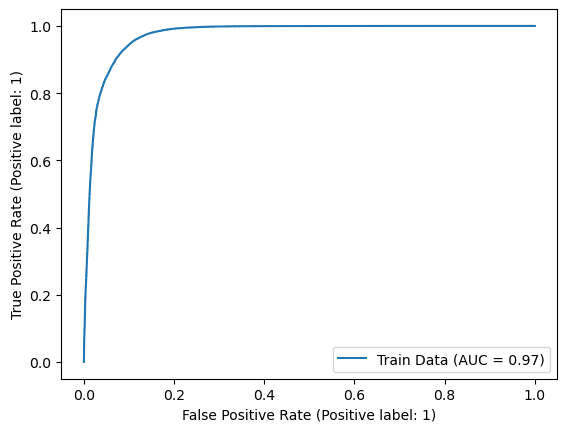

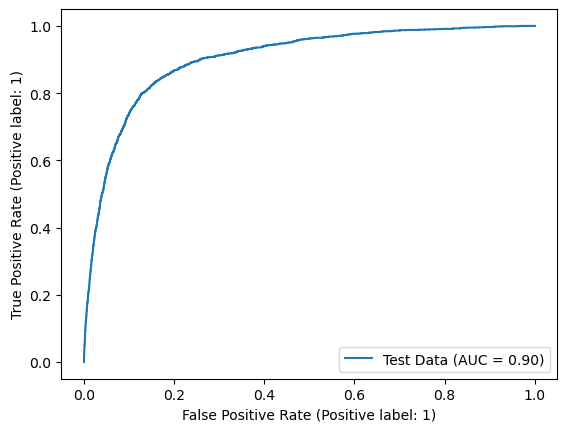

In [65]:
# Display performance statistics
performance_stats(ranf_pca_cv.best_estimator_, \
                  X_train_pca, y_train_balance, \
                  X_test_pca, y_test)

---

#### 6.2.3 Default Parameters without PCA

In [66]:
%%time
# Create random forest classifier object with default setting
ranf = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create random forest classifier model without pca components
ranf.fit(X_train_balance, y_train_balance)

CPU times: total: 3min 33s
Wall time: 1min 1s


RandomForestClassifier(n_jobs=-1, random_state=42)


---------------------
Train data Statistics
---------------------

Score :  1.0

Confusion Matrix: 
 [[44022     0]
 [    0 44022]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44022
           1       1.00      1.00      1.00     44022

    accuracy                           1.00     88044
   macro avg       1.00      1.00      1.00     88044
weighted avg       1.00      1.00      1.00     88044


Sensitivity: 	1.0
Specificity: 	1.0

---------------------
Test data Statistics
---------------------

Score :  0.9297619047619048

Confusion Matrix: 
 [[17922   923]
 [  552  1603]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18845
           1       0.63      0.74      0.68      2155

    accuracy                           0.93     21000
   macro avg       0.80      0.85      0.82     21000
weighted avg       0.94      0.93   

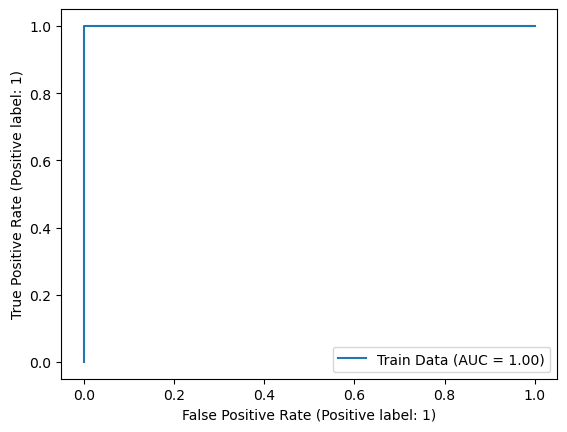

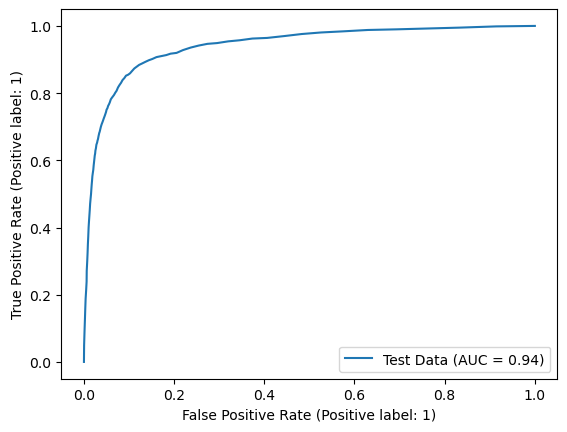

In [67]:
# Display performance statistics
performance_stats(ranf, \
                  X_train_balance, y_train_balance, \
                  X_test_scaled, y_test)

---
<a id='datamodel_xgb'></a>
### 6.3 XG Boost

#### 6.3.1 Default Parameters with PCA

In [68]:
%%time
# Create random forest classifier object with default setting
xgb_pca = XGBClassifier(random_state=42, n_jobs=-1)
# Create random forest classifier model with pca components
xgb_pca.fit(X_train_pca, y_train_balance)

CPU times: total: 18.2 s
Wall time: 7.06 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


---------------------
Train data Statistics
---------------------

Score :  0.9588160465221934

Confusion Matrix: 
 [[41475  2547]
 [ 1079 42943]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     44022
           1       0.94      0.98      0.96     44022

    accuracy                           0.96     88044
   macro avg       0.96      0.96      0.96     88044
weighted avg       0.96      0.96      0.96     88044


Sensitivity: 	0.98
Specificity: 	0.94

---------------------
Test data Statistics
---------------------

Score :  0.8888571428571429

Confusion Matrix: 
 [[17053  1792]
 [  542  1613]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     18845
           1       0.47      0.75      0.58      2155

    accuracy                           0.89     21000
   macro avg       0.72      0.83      0.76     21000
weighted avg       

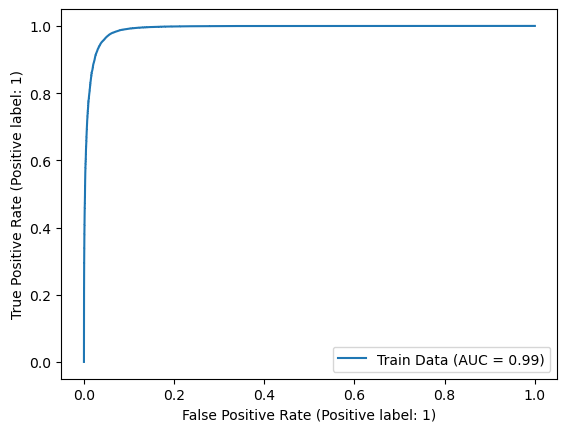

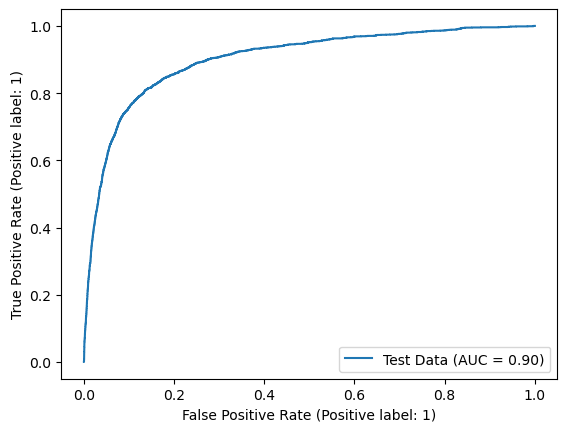

In [69]:
# Display performance statistics
performance_stats(xgb_pca, \
                  X_train_pca, y_train_balance, \
                  X_test_pca, y_test)

---

#### 6.3.2 Default Parameters without PCA

In [70]:
%%time
# Create random forest classifier object with default setting
xgb = XGBClassifier(random_state=42, n_jobs=-1)
# Create random forest classifier model without pca components
xgb.fit(X_train_balance, y_train_balance)

CPU times: total: 17.3 s
Wall time: 7.11 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


---------------------
Train data Statistics
---------------------

Score :  0.9789196310935442

Confusion Matrix: 
 [[42951  1071]
 [  785 43237]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     44022
           1       0.98      0.98      0.98     44022

    accuracy                           0.98     88044
   macro avg       0.98      0.98      0.98     88044
weighted avg       0.98      0.98      0.98     88044


Sensitivity: 	0.98
Specificity: 	0.98

---------------------
Test data Statistics
---------------------

Score :  0.9322857142857143

Confusion Matrix: 
 [[18044   801]
 [  621  1534]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     18845
           1       0.66      0.71      0.68      2155

    accuracy                           0.93     21000
   macro avg       0.81      0.83      0.82     21000
weighted avg       

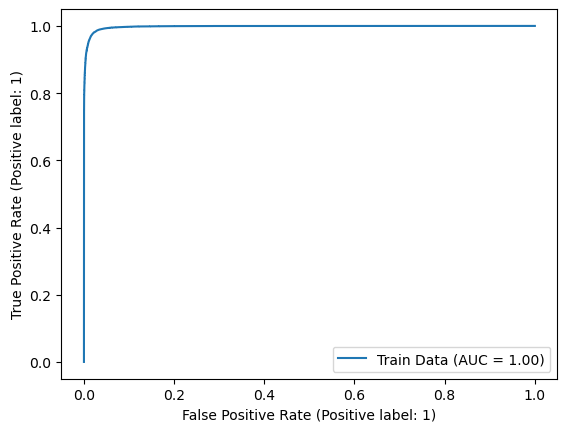

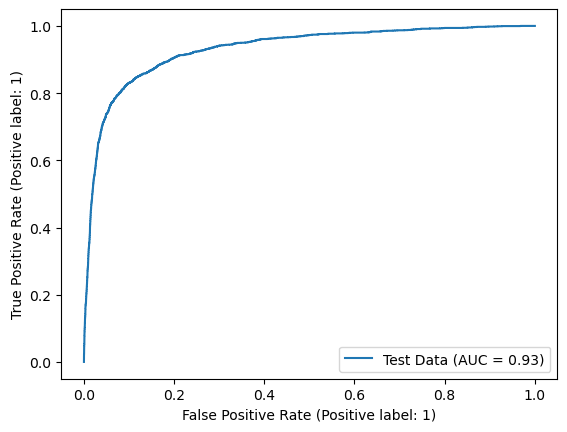

In [71]:
# Display performance statistics
performance_stats(xgb, \
                  X_train_balance, y_train_balance, \
                  X_test_scaled, y_test)

---
---
<a id='conclusion'></a>
# Conclusion
<a id='conclusion_best_model'></a>
## 1) Choosing the best model

We have built the following models

1) Logistic Regression 
    - Default parameters with PCA
    - Hyper parameter tuning (HPT) with PCA
    - Default parameters without PCA
2) Random Forest Classifier
    - Default parameters with PCA
    - Hyper parameter tuning (HPT) with PCA
    - Default parameters without PCA
3) XG Boost
    - Default parameters with PCA
    - Default parameters without PCA
    
> Here we are more interested in finding the churn customers. Hence, along with **accuracy**, we also need to focus on **precision** metrics of each model for selection.

| Model | Parameters | Train Accuracy | Train Precision | Train AUC | Test Accuracy | Test Precision | Test AUC | Comment |
|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|:-------|
| Logistic Regression | Default ; PCA | 0.83 | 0.83 | 0.90 | 0.79 | 0.91 | 0.89 | Metrics seem to be low |
| Logistic Regression | HPT ; PCA | 0.83 | 0.83 | 0.90 | 0.79 | 0.91 | 0.89 | Metrics seem to be low. HPT did not add any value |
| Logistic Regression | Default ; No PCA | 0.83 |  0.83 | 0.90 | 0.79 |  0.91 | 0.89 | Metrics seem to be low |
| Random Forest | Default ; PCA | 1 | 1 | 1 | 0.91 | 0.92 | 0.91 | Metrics are perfect in train and significanlty good in test. This might be overfitting due to perfect fit |
| Random Forest | HPT ; PCA | 0.92 | 0.92 | 0.97 | 0.87 | 0.92 | 0.90 | Metrics are good |
| Random Forest | Default ; No PCA | 1 | 1 | 1 | 0.93 | 0.94 | 0.94 | Metrics are perfect in train and significanlty good in test. This might be overfitting due to perfect fit  |
| XG Boost | Default ; PCA | 0.96 | 0.96 | 0.99 | 0.89 | 0.92 | 0.90 | Metrics are good |
| **XG Boost** | **Default ; No PCA** | **0.98** | **0.98** | **1** | **0.93** | **0.93** | **0.93** | **Overall Metrics are good with train AUC 1 and test AUC 0.93** |

> - From the above comparison table, we could see that though random forest classifier with default parameters have very good metrics, it might be overfitting due to perfect fit on train data. 
> - But, we have **XG Boost classifier with default parameters and without PCA** model having *overall good metrics* and train AUC value of **1** and test AUC value of **0.93**. Hence, we declare this model as the best among these and use it to predict on the unseen test data.

In [72]:
# Selecting best model based on above comments
final_model = xgb

---
<a id='conclusion_predict'></a>
## 2) Prediction on unseen test data

In [73]:
# Create a output dataframe from sample.csv file
output = pd.read_csv("sample.csv")
# Predict on unseen without pca data with the final model
output["churn_probability"] = final_model.predict(unseen_test_data_scaled)
# Sample the dataset
output.head()

id  churn_probability
0  69999                  0
1  70000                  0
2  70001                  1
3  70002                  0
4  70003                  0

In [74]:
output.to_csv("TelecomChurnCaseStudy_ShruthipVenkatesh_Submission.csv", index=False)

Below is the score on the unseen test data evaluated on Kaggle platform:
![image](Final_Score.png)

---
<a id='conclusion_strong_predict'></a>
## 3) Strong predictors of churn

- For extracting strong predictors, let's use the already built *random forest classifier with default parameters without PCA data*.

In [75]:
# Create feature importance dataframe
feature_importance_df = pd.DataFrame({'Features':X_train.columns, 'Importance':ranf.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract top 20 features for better understanding
top_20_features = feature_importance_df.head(20)
top_20_features

Features  Importance
29     loc_ic_t2m_mou_8    0.102551
26     loc_ic_t2t_mou_8    0.088708
47   last_day_rch_amt_8    0.058432
5      loc_og_t2m_mou_8    0.051194
2      loc_og_t2t_mou_8    0.046461
68     roam_og_mou_diff    0.040064
32     loc_ic_t2f_mou_8    0.033318
67     roam_ic_mou_diff    0.032471
64            arpu_diff    0.029135
81    max_rech_amt_diff    0.028041
78    total_ic_mou_diff    0.024188
73    total_og_mou_diff    0.024039
74      loc_ic_mou_diff    0.021549
80  total_rech_amt_diff    0.018934
69      loc_og_mou_diff    0.017732
38     std_ic_t2m_mou_8    0.017570
28     loc_ic_t2m_mou_7    0.016186
60                  aon    0.013291
79  total_rech_num_diff    0.012111
70      std_og_mou_diff    0.011747

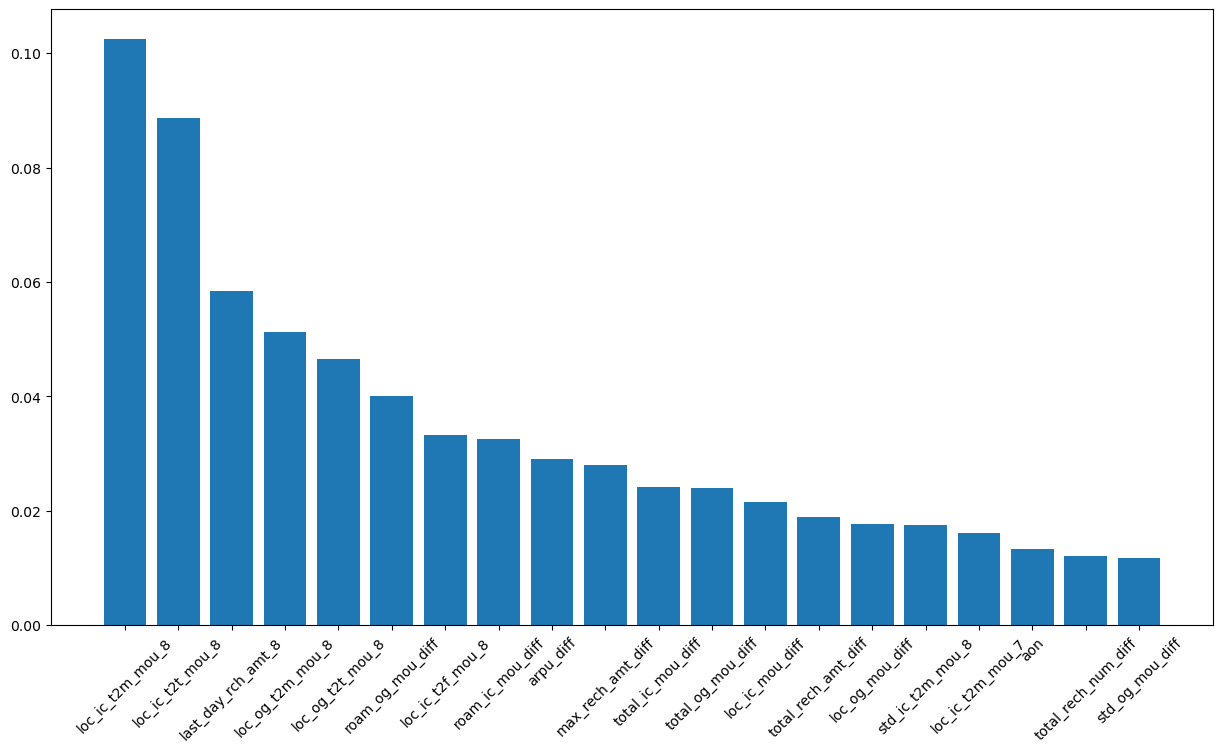

In [76]:
# Plot the importance vs feature graph
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
plt.bar(top_20_features['Features'], top_20_features['Importance'])
plt.show()

**Inference:**

From EDA and the feature importance analysis, we can derive the following important predictors for churn detection:
> 1) Local incoming calls minutes in month 8 
2) Local outgoing calls minutes in month 8
3) Last day recharge amount in month 8
4) Roaming outgoing calls
5) Roaming incoming calls
6) Average revenue per user
7) Maximum recharge amount
8) Total incoming call minutes
9) Total outgoing call minutes
10) Total recharge amount
11) STD incoming calls
12) STD Outgoing calls
13) Age on Network
14) Total number of recharges

---
<a id='conclusion_strategies'></a>
## 4) Strategies to manage customer churn

Below are few strategies to avoid people churn based on the above predictors,

| Observation | Action |
|:----------|:-------|
| Increase in incoming calls, decrease in outgoing calls | Customer might be facing issues to make calls due to poor network coverage, hence might churn. Connect with the customer to get a feedback of the service and resolve the queries  |
| Decrease in average revenue per user | Connect with the customer to get a feedback of the service to understand if they are happy about the service else provide promotion gifts |
| Increase in roaming services | Due to the high roaming rates, customers might churn when they have more roaming usage. Provide attractive offers on roaming rates |
| Decrease in total and maximum recharge amount and number of recharges | Due to high recharge amount, customers might churn. Provide attractive offers along with recharge like caller tune service, OTT subscription etc. |
| Increase in STD calls | Due to the high STD rates, customers might churn when they have more STD usage. Provide attractive offers for STD calls |
| New customers | New customers tend to churn, hence provide them with additional benefits |

---
---
